In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_path = './../tmp_simulation/tmp_data/one_hole_data.csv'
four_holes_path = './../tmp_simulation/tmp_data/four_holes_data.csv'
nine_holes_path = './../tmp_simulation/tmp_data/nine_holes_data.csv'
sixteen_holes_path = './../tmp_simulation/tmp_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../tmp_simulation/tmp_data/twentyfive_holes_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_data = []
size_y_data = []
position_x_data = []
position_one_data = []
position_two_data = []
position_three_data = []
position_four_data = []
position_five_data = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_data.append(data_array[3:-1])
    position_one_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
with open(four_holes_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_data.append(data_array[3:-1])
    position_two_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
with open(nine_holes_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_data.append(data_array[3:-1])
    position_three_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
with open(sixteen_holes_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_data.append(data_array[3:-1])
    position_four_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
with open(twentyfive_holes_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_data.append(data_array[3:-1])
    position_five_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_data = np.array(size_x_data, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data = np.array(position_x_data, dtype=float)
position_one_data = np.array(position_one_data, dtype=float)
position_two_data = np.array(position_two_data, dtype=float)
position_three_data = np.array(position_three_data, dtype=float)
position_four_data = np.array(position_four_data, dtype=float)
position_five_data = np.array(position_five_data, dtype=float)
position_y_data = np.array(position_y_data, dtype=float)

### データの加工
size_x_data = (size_x_data-no_hole_data)
position_x_data = (position_x_data-no_hole_data)
position_one_data = (position_one_data-no_hole_data)
position_two_data = (position_two_data-no_hole_data)
position_three_data = (position_three_data-no_hole_data)
position_four_data = (position_four_data-no_hole_data)
position_five_data = (position_five_data-no_hole_data)
# size_y_data = keras.utils.to_categorical(size_y_data, 6)
position_y_data = position_y_data/50
# position_y_data = keras.utils.to_categorical(position_y_data, 25)
print(size_y_data.shape)
print(size_x_data.shape)
print(size_y_data)
print(size_x_data)
print(position_y_data.shape)

### train用とtest用に分割(4:1)
size_x_train, size_x_test, size_y_train, size_y_test = train_test_split(size_x_data, size_y_data, test_size=0.20)
position_x_train, position_x_test, position_y_train, position_y_test = train_test_split(position_x_data, position_y_data, test_size=0.20)


### reshape
size_x_train = size_x_train.reshape(8108, 50, 1)
size_x_test = size_x_test.reshape(2027, 50, 1)
position_x_train = position_x_train.reshape(8108, 50, 1)
position_x_test = position_x_test.reshape(2027, 50, 1)

(10135,)
(10135, 50)
[1 1 1 ... 5 5 5]
[[ 2.557784  2.543381  2.538138 ... -3.468686 -3.537617 -3.560005]
 [ 2.544622  2.527179  2.525716 ... -3.468703 -3.537634 -3.560022]
 [ 2.510082  2.489366  2.468944 ... -3.468758 -3.537691 -3.560078]
 ...
 [ 2.861055  2.839368  2.812215 ... -2.791348 -2.856525 -2.87767 ]
 [ 2.869751  2.848063  2.820905 ... -2.764584 -2.829577 -2.850659]
 [ 2.863524  2.841838  2.814688 ... -2.774301 -2.839327 -2.86042 ]]
(10135, 2)


In [3]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(1, activation='linear'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

In [4]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Epoch 1/1000
64/64 [==============================] - 0s 5ms/step - loss: 2.7354 - accuracy: 0.2099 - val_loss: 2.0296 - val_accuracy: 0.2250
Epoch 2/1000
64/64 [==============================] - 0s 3ms/step - loss: 2.0627 - accuracy: 0.2162 - val_loss: 1.9103 - val_accuracy: 0.2250
Epoch 3/1000
64/64 [==============================] - 0s 4ms/step - loss: 1.9302 - accuracy: 0.2162 - val_loss: 1.7982 - val_accuracy: 0.2250
Epoch 4/1000
64/64 [==============================] - 0s 3ms/step - loss: 1.7789 - accuracy: 0.2162 - val_loss: 1.6027 - val_accuracy: 0.2250
Epoch 5/1000
64/64 [==============================] - 0s 3ms/step - loss: 1.6133 - accuracy: 0.2162 - val_loss: 1.4403 - val_accuracy: 0.2250
Epoch 6/1000
64/64 [==============================] - 0s 3ms/step - loss: 1.4471 - accuracy: 0.2162 - val_loss: 1.2845 - val_accuracy: 0.2250
Epoch 7/1000
64/64 [==============================] - 0s 3ms/step - loss: 1.2981 - accuracy: 0.2160 - val_loss: 1.1503 - val_accuracy: 0.2250
Epoch 

64/64 [==============================] - 0s 3ms/step - loss: 0.2206 - accuracy: 0.2151 - val_loss: 0.2278 - val_accuracy: 0.2235
Epoch 59/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2207 - accuracy: 0.2147 - val_loss: 0.2206 - val_accuracy: 0.2235
Epoch 60/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2210 - accuracy: 0.2148 - val_loss: 0.2231 - val_accuracy: 0.2235
Epoch 61/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2201 - accuracy: 0.2148 - val_loss: 0.2184 - val_accuracy: 0.2235
Epoch 62/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.2148 - val_loss: 0.2452 - val_accuracy: 0.2245
Epoch 63/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2174 - accuracy: 0.2148 - val_loss: 0.2151 - val_accuracy: 0.2235
Epoch 64/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2143 - accuracy: 0.2147 - val_loss: 0.2123 - val_accuracy: 0.2235
Epoch 65/1000

64/64 [==============================] - 0s 3ms/step - loss: 0.1812 - accuracy: 0.2148 - val_loss: 0.1720 - val_accuracy: 0.2240
Epoch 116/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1695 - accuracy: 0.2148 - val_loss: 0.1690 - val_accuracy: 0.2240
Epoch 117/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1702 - accuracy: 0.2148 - val_loss: 0.1719 - val_accuracy: 0.2240
Epoch 118/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 0.2151 - val_loss: 0.1717 - val_accuracy: 0.2240
Epoch 119/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1672 - accuracy: 0.2150 - val_loss: 0.1741 - val_accuracy: 0.2240
Epoch 120/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1701 - accuracy: 0.2150 - val_loss: 0.1688 - val_accuracy: 0.2240
Epoch 121/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1637 - accuracy: 0.2150 - val_loss: 0.1671 - val_accuracy: 0.2240
Epoch 1

Epoch 172/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1485 - accuracy: 0.2150 - val_loss: 0.1546 - val_accuracy: 0.2240
Epoch 173/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1492 - accuracy: 0.2148 - val_loss: 0.1770 - val_accuracy: 0.2235
Epoch 174/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1477 - accuracy: 0.2150 - val_loss: 0.1485 - val_accuracy: 0.2240
Epoch 175/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1478 - accuracy: 0.2152 - val_loss: 0.1491 - val_accuracy: 0.2240
Epoch 176/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.2150 - val_loss: 0.1499 - val_accuracy: 0.2240
Epoch 177/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1458 - accuracy: 0.2150 - val_loss: 0.1480 - val_accuracy: 0.2240
Epoch 178/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1490 - accuracy: 0.2152 - val_loss: 0.1488 - val_accuracy:

Epoch 229/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1381 - accuracy: 0.2153 - val_loss: 0.1496 - val_accuracy: 0.2240
Epoch 230/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1359 - accuracy: 0.2152 - val_loss: 0.1476 - val_accuracy: 0.2240
Epoch 231/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.1360 - accuracy: 0.2153 - val_loss: 0.1552 - val_accuracy: 0.2240
Epoch 232/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1362 - accuracy: 0.2152 - val_loss: 0.1436 - val_accuracy: 0.2240
Epoch 233/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1375 - accuracy: 0.2155 - val_loss: 0.1407 - val_accuracy: 0.2240
Epoch 234/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.2152 - val_loss: 0.1432 - val_accuracy: 0.2240
Epoch 235/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1361 - accuracy: 0.2152 - val_loss: 0.1393 - val_accuracy:

Epoch 286/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1348 - accuracy: 0.2153 - val_loss: 0.1649 - val_accuracy: 0.2240
Epoch 287/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1312 - accuracy: 0.2152 - val_loss: 0.1425 - val_accuracy: 0.2240
Epoch 288/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1289 - accuracy: 0.2152 - val_loss: 0.1329 - val_accuracy: 0.2240
Epoch 289/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1319 - accuracy: 0.2155 - val_loss: 0.1325 - val_accuracy: 0.2240
Epoch 290/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1387 - accuracy: 0.2152 - val_loss: 0.1338 - val_accuracy: 0.2240
Epoch 291/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1329 - accuracy: 0.2152 - val_loss: 0.1373 - val_accuracy: 0.2240
Epoch 292/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1299 - accuracy: 0.2153 - val_loss: 0.1343 - val_accuracy:

Epoch 343/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1249 - accuracy: 0.2153 - val_loss: 0.1425 - val_accuracy: 0.2245
Epoch 344/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1249 - accuracy: 0.2153 - val_loss: 0.1365 - val_accuracy: 0.2245
Epoch 345/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.2152 - val_loss: 0.1292 - val_accuracy: 0.2240
Epoch 346/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1249 - accuracy: 0.2155 - val_loss: 0.1281 - val_accuracy: 0.2240
Epoch 347/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1301 - accuracy: 0.2151 - val_loss: 0.1557 - val_accuracy: 0.2245
Epoch 348/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.2153 - val_loss: 0.1347 - val_accuracy: 0.2240
Epoch 349/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1272 - accuracy: 0.2153 - val_loss: 0.1289 - val_accuracy:

Epoch 400/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1194 - accuracy: 0.2153 - val_loss: 0.1239 - val_accuracy: 0.2240
Epoch 401/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1221 - accuracy: 0.2156 - val_loss: 0.1267 - val_accuracy: 0.2240
Epoch 402/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.2152 - val_loss: 0.1314 - val_accuracy: 0.2240
Epoch 403/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.2155 - val_loss: 0.1319 - val_accuracy: 0.2245
Epoch 404/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1195 - accuracy: 0.2153 - val_loss: 0.1286 - val_accuracy: 0.2240
Epoch 405/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.2155 - val_loss: 0.1314 - val_accuracy: 0.2245
Epoch 406/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.2155 - val_loss: 0.1258 - val_accuracy:

Epoch 457/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.1147 - accuracy: 0.2153 - val_loss: 0.1232 - val_accuracy: 0.2240
Epoch 458/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.2153 - val_loss: 0.1191 - val_accuracy: 0.2240
Epoch 459/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1124 - accuracy: 0.2152 - val_loss: 0.1187 - val_accuracy: 0.2240
Epoch 460/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1121 - accuracy: 0.2152 - val_loss: 0.1199 - val_accuracy: 0.2240
Epoch 461/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.2153 - val_loss: 0.1196 - val_accuracy: 0.2240
Epoch 462/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.1146 - accuracy: 0.2155 - val_loss: 0.1198 - val_accuracy: 0.2240
Epoch 463/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.2153 - val_loss: 0.1363 - val_accuracy:

Epoch 514/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1086 - accuracy: 0.2151 - val_loss: 0.1138 - val_accuracy: 0.2240
Epoch 515/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1258 - accuracy: 0.2150 - val_loss: 0.1238 - val_accuracy: 0.2235
Epoch 516/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.2153 - val_loss: 0.1138 - val_accuracy: 0.2240
Epoch 517/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.1073 - accuracy: 0.2153 - val_loss: 0.1133 - val_accuracy: 0.2240
Epoch 518/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.2151 - val_loss: 0.1136 - val_accuracy: 0.2240
Epoch 519/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1060 - accuracy: 0.2151 - val_loss: 0.1140 - val_accuracy: 0.2240
Epoch 520/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.2152 - val_loss: 0.1297 - val_accuracy:

Epoch 571/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1043 - accuracy: 0.2153 - val_loss: 0.1192 - val_accuracy: 0.2245
Epoch 572/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.2153 - val_loss: 0.1087 - val_accuracy: 0.2240
Epoch 573/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1026 - accuracy: 0.2151 - val_loss: 0.1226 - val_accuracy: 0.2245
Epoch 574/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.2150 - val_loss: 0.1156 - val_accuracy: 0.2245
Epoch 575/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.2151 - val_loss: 0.1233 - val_accuracy: 0.2245
Epoch 576/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.2152 - val_loss: 0.1183 - val_accuracy: 0.2235
Epoch 577/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.2151 - val_loss: 0.1137 - val_accuracy:

Epoch 628/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.2148 - val_loss: 0.1200 - val_accuracy: 0.2245
Epoch 629/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.2151 - val_loss: 0.1087 - val_accuracy: 0.2245
Epoch 630/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.2150 - val_loss: 0.1027 - val_accuracy: 0.2240
Epoch 631/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.2152 - val_loss: 0.1162 - val_accuracy: 0.2245
Epoch 632/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.2151 - val_loss: 0.1034 - val_accuracy: 0.2240
Epoch 633/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.2151 - val_loss: 0.1019 - val_accuracy: 0.2240
Epoch 634/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0954 - accuracy: 0.2152 - val_loss: 0.1018 - val_accuracy:

Epoch 685/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.2150 - val_loss: 0.1020 - val_accuracy: 0.2240
Epoch 686/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.2151 - val_loss: 0.0968 - val_accuracy: 0.2240
Epoch 687/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0903 - accuracy: 0.2150 - val_loss: 0.0976 - val_accuracy: 0.2240
Epoch 688/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0890 - accuracy: 0.2151 - val_loss: 0.0961 - val_accuracy: 0.2240
Epoch 689/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0913 - accuracy: 0.2150 - val_loss: 0.1025 - val_accuracy: 0.2240
Epoch 690/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0927 - accuracy: 0.2150 - val_loss: 0.0987 - val_accuracy: 0.2240
Epoch 691/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.2151 - val_loss: 0.1027 - val_accuracy:

Epoch 742/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0853 - accuracy: 0.2147 - val_loss: 0.0931 - val_accuracy: 0.2240
Epoch 743/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.0852 - accuracy: 0.2147 - val_loss: 0.0914 - val_accuracy: 0.2240
Epoch 744/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 0.2148 - val_loss: 0.0927 - val_accuracy: 0.2240
Epoch 745/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.2148 - val_loss: 0.1000 - val_accuracy: 0.2245
Epoch 746/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0863 - accuracy: 0.2148 - val_loss: 0.0912 - val_accuracy: 0.2240
Epoch 747/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0854 - accuracy: 0.2148 - val_loss: 0.0908 - val_accuracy: 0.2240
Epoch 748/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.2147 - val_loss: 0.0923 - val_accuracy:

Epoch 799/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.2146 - val_loss: 0.0872 - val_accuracy: 0.2240
Epoch 800/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.2148 - val_loss: 0.0887 - val_accuracy: 0.2240
Epoch 801/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0841 - accuracy: 0.2147 - val_loss: 0.0875 - val_accuracy: 0.2240
Epoch 802/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0823 - accuracy: 0.2148 - val_loss: 0.0907 - val_accuracy: 0.2240
Epoch 803/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0810 - accuracy: 0.2150 - val_loss: 0.0871 - val_accuracy: 0.2240
Epoch 804/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.2147 - val_loss: 0.0998 - val_accuracy: 0.2245
Epoch 805/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0838 - accuracy: 0.2150 - val_loss: 0.0904 - val_accuracy:

64/64 [==============================] - 0s 3ms/step - loss: 0.0831 - accuracy: 0.2148 - val_loss: 0.0848 - val_accuracy: 0.2240
Epoch 856/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.2148 - val_loss: 0.0862 - val_accuracy: 0.2240
Epoch 857/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0806 - accuracy: 0.2148 - val_loss: 0.0942 - val_accuracy: 0.2245
Epoch 858/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0812 - accuracy: 0.2148 - val_loss: 0.0865 - val_accuracy: 0.2240
Epoch 859/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0794 - accuracy: 0.2146 - val_loss: 0.0835 - val_accuracy: 0.2240
Epoch 860/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0792 - accuracy: 0.2148 - val_loss: 0.0839 - val_accuracy: 0.2240
Epoch 861/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0799 - accuracy: 0.2147 - val_loss: 0.0885 - val_accuracy: 0.2245
Epoch 8

Epoch 912/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.2147 - val_loss: 0.0841 - val_accuracy: 0.2240
Epoch 913/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.2150 - val_loss: 0.0827 - val_accuracy: 0.2240
Epoch 914/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0798 - accuracy: 0.2147 - val_loss: 0.0863 - val_accuracy: 0.2240
Epoch 915/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.0772 - accuracy: 0.2147 - val_loss: 0.0819 - val_accuracy: 0.2240
Epoch 916/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0756 - accuracy: 0.2148 - val_loss: 0.0835 - val_accuracy: 0.2240
Epoch 917/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.2145 - val_loss: 0.0812 - val_accuracy: 0.2240
Epoch 918/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.2148 - val_loss: 0.1024 - val_accuracy:

Epoch 969/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.2148 - val_loss: 0.0785 - val_accuracy: 0.2240
Epoch 970/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.2147 - val_loss: 0.0781 - val_accuracy: 0.2240
Epoch 971/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0755 - accuracy: 0.2147 - val_loss: 0.0793 - val_accuracy: 0.2240
Epoch 972/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.2148 - val_loss: 0.0840 - val_accuracy: 0.2240
Epoch 973/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0761 - accuracy: 0.2147 - val_loss: 0.0781 - val_accuracy: 0.2240
Epoch 974/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0758 - accuracy: 0.2147 - val_loss: 0.0788 - val_accuracy: 0.2240
Epoch 975/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.2147 - val_loss: 0.0794 - val_accuracy:

In [6]:
predict = size_model.predict(size_x_test)
all_count = 0
correct = 0
for i in range(len(predict)):
    all_count = all_count + 1
    if (abs(predict[i]-size_y_test[i])<0.5):
        correct = correct + 1
print(correct/all_count)
print(predict)

0.9422792303897385
[[3.2483191]
 [3.9094415]
 [4.7800884]
 ...
 [4.066801 ]
 [3.788269 ]
 [4.6797132]]


In [7]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

64/64 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.2245
Test loss: 0.09394301474094391
Test accuracy: 0.22446966171264648


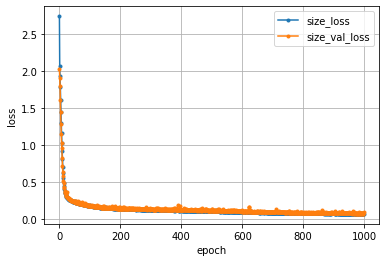

In [8]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
size_loss[-10:-1]

[0.07300983369350433,
 0.07423969358205795,
 0.07456602156162262,
 0.07601585239171982,
 0.07391491532325745,
 0.07530950754880905,
 0.07517252117395401,
 0.07431121170520782,
 0.0752926915884018]

In [10]:
print(size_y_test[0:3])
size_predict = size_model.predict(size_x_test)
print(size_predict[0:3])

[3 4 5]
[[3.2483191]
 [3.9094415]
 [4.7800884]]


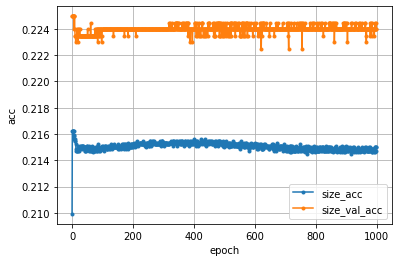

In [11]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [12]:
#大きさごとの推定精度の確認
size_predict = size_model.predict(size_x_test)
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.2):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.4):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.6):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.8):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 1):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.039473684210526314
大きさ2の正答率：0.8301886792452831
大きさ3の正答率：0.9637681159420289
大きさ4の正答率：0.9923857868020305
大きさ5の正答率：0.9823008849557522


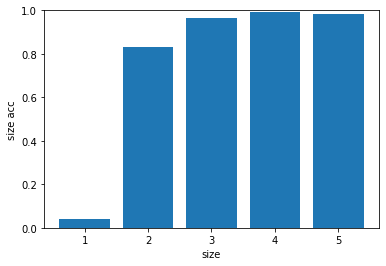

In [13]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [14]:
#大きさごとの推定精度の確認
size_predict = size_model.predict(size_x_test)
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.9671052631578947
大きさ2の正答率：0.9504716981132075
大きさ3の正答率：0.9420289855072463
大きさ4の正答率：0.9467005076142132
大きさ5の正答率：0.8938053097345132


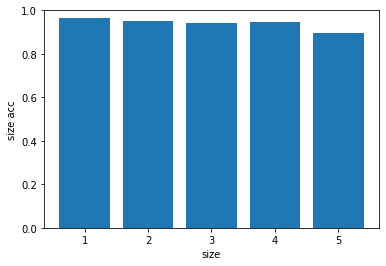

In [15]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

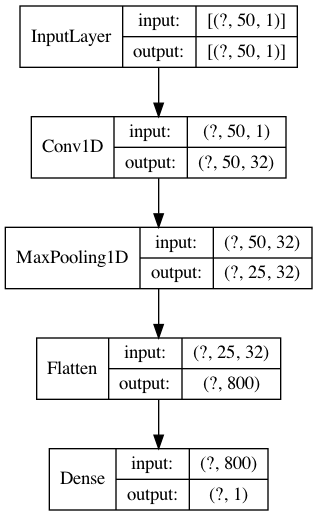

In [16]:
from keras.utils import plot_model
plot_model(size_model, show_shapes=True, show_layer_names=False)

In [16]:
## CNN(大きさ)

### modelの作成
size_model2 = Sequential()
### 畳み込み層
size_model2.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
size_model2.add(MaxPooling1D(2, padding='same'))
### 畳み込み層
size_model2.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
size_model2.add(MaxPooling1D(2, padding='same'))
### 畳み込み層
size_model2.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
size_model2.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model2.add(Flatten())
### 全結合層
size_model2.add(Dense(1, activation='linear'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model2.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

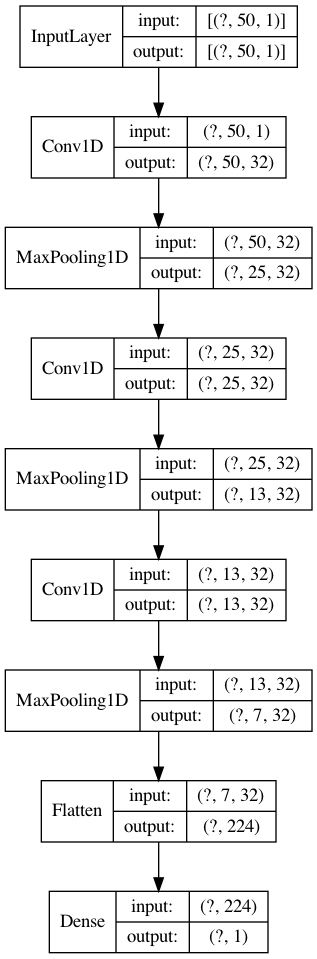

In [17]:
from keras.utils import plot_model
plot_model(size_model2, show_shapes=True, show_layer_names=False)

In [13]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history2 = size_model2.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Epoch 1/1000
64/64 [==============================] - 1s 10ms/step - loss: 2.5414 - accuracy: 0.2104 - val_loss: 1.7668 - val_accuracy: 0.2225
Epoch 2/1000
64/64 [==============================] - 1s 8ms/step - loss: 1.6366 - accuracy: 0.2168 - val_loss: 1.3381 - val_accuracy: 0.2225
Epoch 3/1000
64/64 [==============================] - 1s 8ms/step - loss: 1.1017 - accuracy: 0.2168 - val_loss: 0.8136 - val_accuracy: 0.2225
Epoch 4/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.7299 - accuracy: 0.2168 - val_loss: 0.5707 - val_accuracy: 0.2225
Epoch 5/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.5383 - accuracy: 0.2167 - val_loss: 0.4215 - val_accuracy: 0.2225
Epoch 6/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.3994 - accuracy: 0.2167 - val_loss: 0.3029 - val_accuracy: 0.2225
Epoch 7/1000
64/64 [==============================] - 0s 8ms/step - loss: 0.3097 - accuracy: 0.2163 - val_loss: 0.2418 - val_accuracy: 0.2225
Epoc

64/64 [==============================] - 1s 8ms/step - loss: 0.0369 - accuracy: 0.2165 - val_loss: 0.0310 - val_accuracy: 0.2225
Epoch 116/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.0370 - accuracy: 0.2165 - val_loss: 0.0532 - val_accuracy: 0.2225
Epoch 117/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.0388 - accuracy: 0.2165 - val_loss: 0.0303 - val_accuracy: 0.2225
Epoch 118/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0377 - accuracy: 0.2163 - val_loss: 0.0400 - val_accuracy: 0.2225
Epoch 119/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0390 - accuracy: 0.2165 - val_loss: 0.0359 - val_accuracy: 0.2225
Epoch 120/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0368 - accuracy: 0.2165 - val_loss: 0.0298 - val_accuracy: 0.2225
Epoch 121/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0385 - accuracy: 0.2163 - val_loss: 0.0345 - val_accuracy: 0.2225
Epoch

Epoch 172/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0271 - accuracy: 0.2165 - val_loss: 0.0302 - val_accuracy: 0.2225
Epoch 173/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0267 - accuracy: 0.2165 - val_loss: 0.0266 - val_accuracy: 0.2225
Epoch 174/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0283 - accuracy: 0.2165 - val_loss: 0.0238 - val_accuracy: 0.2225
Epoch 175/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0273 - accuracy: 0.2165 - val_loss: 0.0245 - val_accuracy: 0.2225
Epoch 176/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0328 - accuracy: 0.2165 - val_loss: 0.0290 - val_accuracy: 0.2225
Epoch 177/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0258 - accuracy: 0.2165 - val_loss: 0.0234 - val_accuracy: 0.2225
Epoch 178/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0298 - accuracy: 0.2165 - val_loss: 0.0255 - val_accuracy:

Epoch 229/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0260 - accuracy: 0.2166 - val_loss: 0.0221 - val_accuracy: 0.2225
Epoch 230/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0224 - accuracy: 0.2166 - val_loss: 0.0308 - val_accuracy: 0.2225
Epoch 231/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0239 - accuracy: 0.2166 - val_loss: 0.0229 - val_accuracy: 0.2225
Epoch 232/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0234 - accuracy: 0.2166 - val_loss: 0.0225 - val_accuracy: 0.2225
Epoch 233/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.0221 - accuracy: 0.2165 - val_loss: 0.0262 - val_accuracy: 0.2225
Epoch 234/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0223 - accuracy: 0.2167 - val_loss: 0.0212 - val_accuracy: 0.2225
Epoch 235/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0230 - accuracy: 0.2167 - val_loss: 0.0304 - val_accuracy

Epoch 286/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0219 - accuracy: 0.2167 - val_loss: 0.0214 - val_accuracy: 0.2225
Epoch 287/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.0196 - accuracy: 0.2166 - val_loss: 0.0238 - val_accuracy: 0.2225
Epoch 288/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0226 - accuracy: 0.2167 - val_loss: 0.0198 - val_accuracy: 0.2225
Epoch 289/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0186 - accuracy: 0.2167 - val_loss: 0.0172 - val_accuracy: 0.2225
Epoch 290/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0186 - accuracy: 0.2167 - val_loss: 0.0200 - val_accuracy: 0.2225
Epoch 291/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0230 - accuracy: 0.2167 - val_loss: 0.0183 - val_accuracy: 0.2225
Epoch 292/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0191 - accuracy: 0.2167 - val_loss: 0.0198 - val_accuracy

Epoch 343/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0188 - accuracy: 0.2167 - val_loss: 0.0208 - val_accuracy: 0.2225
Epoch 344/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0195 - accuracy: 0.2167 - val_loss: 0.0180 - val_accuracy: 0.2225
Epoch 345/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0193 - accuracy: 0.2167 - val_loss: 0.0163 - val_accuracy: 0.2225
Epoch 346/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.0192 - accuracy: 0.2167 - val_loss: 0.0175 - val_accuracy: 0.2225
Epoch 347/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0183 - accuracy: 0.2167 - val_loss: 0.0178 - val_accuracy: 0.2225
Epoch 348/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0173 - accuracy: 0.2167 - val_loss: 0.0160 - val_accuracy: 0.2225
Epoch 349/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0165 - accuracy: 0.2168 - val_loss: 0.0162 - val_accuracy

Epoch 400/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0153 - accuracy: 0.2167 - val_loss: 0.0168 - val_accuracy: 0.2225
Epoch 401/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0156 - accuracy: 0.2167 - val_loss: 0.0191 - val_accuracy: 0.2225
Epoch 402/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0175 - accuracy: 0.2167 - val_loss: 0.0228 - val_accuracy: 0.2225
Epoch 403/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0167 - accuracy: 0.2167 - val_loss: 0.0218 - val_accuracy: 0.2225
Epoch 404/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0160 - accuracy: 0.2167 - val_loss: 0.0146 - val_accuracy: 0.2225
Epoch 405/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0158 - accuracy: 0.2167 - val_loss: 0.0240 - val_accuracy: 0.2225
Epoch 406/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0165 - accuracy: 0.2167 - val_loss: 0.0195 - val_accuracy:

Epoch 457/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0170 - accuracy: 0.2167 - val_loss: 0.0155 - val_accuracy: 0.2225
Epoch 458/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0146 - accuracy: 0.2168 - val_loss: 0.0175 - val_accuracy: 0.2225
Epoch 459/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0143 - accuracy: 0.2167 - val_loss: 0.0185 - val_accuracy: 0.2225
Epoch 460/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0137 - accuracy: 0.2167 - val_loss: 0.0181 - val_accuracy: 0.2225
Epoch 461/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0164 - accuracy: 0.2168 - val_loss: 0.0142 - val_accuracy: 0.2225
Epoch 462/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.0138 - accuracy: 0.2167 - val_loss: 0.0157 - val_accuracy: 0.2225
Epoch 463/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0149 - accuracy: 0.2167 - val_loss: 0.0164 - val_accuracy

Epoch 514/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0166 - accuracy: 0.2168 - val_loss: 0.0192 - val_accuracy: 0.2225
Epoch 515/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.0153 - accuracy: 0.2168 - val_loss: 0.0245 - val_accuracy: 0.2220
Epoch 516/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0154 - accuracy: 0.2168 - val_loss: 0.0192 - val_accuracy: 0.2225
Epoch 517/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0132 - accuracy: 0.2168 - val_loss: 0.0138 - val_accuracy: 0.2225
Epoch 518/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0137 - accuracy: 0.2168 - val_loss: 0.0154 - val_accuracy: 0.2225
Epoch 519/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0149 - accuracy: 0.2168 - val_loss: 0.0181 - val_accuracy: 0.2225
Epoch 520/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0149 - accuracy: 0.2167 - val_loss: 0.0169 - val_accuracy

Epoch 571/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0141 - accuracy: 0.2168 - val_loss: 0.0151 - val_accuracy: 0.2225
Epoch 572/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0139 - accuracy: 0.2168 - val_loss: 0.0144 - val_accuracy: 0.2220
Epoch 573/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0141 - accuracy: 0.2168 - val_loss: 0.0160 - val_accuracy: 0.2220
Epoch 574/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0168 - accuracy: 0.2168 - val_loss: 0.0146 - val_accuracy: 0.2225
Epoch 575/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0142 - accuracy: 0.2168 - val_loss: 0.0189 - val_accuracy: 0.2220
Epoch 576/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0133 - accuracy: 0.2168 - val_loss: 0.0158 - val_accuracy: 0.2225
Epoch 577/1000
64/64 [==============================] - 1s 13ms/step - loss: 0.0126 - accuracy: 0.2168 - val_loss: 0.0137 - val_accuracy

Epoch 628/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0144 - accuracy: 0.2168 - val_loss: 0.0160 - val_accuracy: 0.2225
Epoch 629/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0138 - accuracy: 0.2168 - val_loss: 0.0168 - val_accuracy: 0.2220
Epoch 630/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0130 - accuracy: 0.2168 - val_loss: 0.0174 - val_accuracy: 0.2225
Epoch 631/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0122 - accuracy: 0.2168 - val_loss: 0.0154 - val_accuracy: 0.2225
Epoch 632/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0118 - accuracy: 0.2168 - val_loss: 0.0153 - val_accuracy: 0.2220
Epoch 633/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0127 - accuracy: 0.2168 - val_loss: 0.0175 - val_accuracy: 0.2225
Epoch 634/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0127 - accuracy: 0.2168 - val_loss: 0.0140 - val_accuracy:

Epoch 685/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0143 - accuracy: 0.2168 - val_loss: 0.0136 - val_accuracy: 0.2220
Epoch 686/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0138 - accuracy: 0.2168 - val_loss: 0.0141 - val_accuracy: 0.2220
Epoch 687/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0121 - accuracy: 0.2168 - val_loss: 0.0140 - val_accuracy: 0.2220
Epoch 688/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0129 - accuracy: 0.2168 - val_loss: 0.0129 - val_accuracy: 0.2220
Epoch 689/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0131 - accuracy: 0.2168 - val_loss: 0.0199 - val_accuracy: 0.2225
Epoch 690/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0127 - accuracy: 0.2168 - val_loss: 0.0159 - val_accuracy: 0.2220
Epoch 691/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0125 - accuracy: 0.2168 - val_loss: 0.0141 - val_accuracy:

Epoch 742/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0165 - accuracy: 0.2168 - val_loss: 0.0149 - val_accuracy: 0.2220
Epoch 743/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0119 - accuracy: 0.2168 - val_loss: 0.0138 - val_accuracy: 0.2220
Epoch 744/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0122 - accuracy: 0.2168 - val_loss: 0.0148 - val_accuracy: 0.2220
Epoch 745/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0128 - accuracy: 0.2168 - val_loss: 0.0132 - val_accuracy: 0.2220
Epoch 746/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0118 - accuracy: 0.2168 - val_loss: 0.0139 - val_accuracy: 0.2220
Epoch 747/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0117 - accuracy: 0.2168 - val_loss: 0.0124 - val_accuracy: 0.2220
Epoch 748/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0118 - accuracy: 0.2168 - val_loss: 0.0184 - val_accuracy:

Epoch 799/1000
64/64 [==============================] - 1s 14ms/step - loss: 0.0120 - accuracy: 0.2168 - val_loss: 0.0164 - val_accuracy: 0.2220
Epoch 800/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.0117 - accuracy: 0.2168 - val_loss: 0.0122 - val_accuracy: 0.2220
Epoch 801/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0121 - accuracy: 0.2168 - val_loss: 0.0142 - val_accuracy: 0.2220
Epoch 802/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0126 - accuracy: 0.2168 - val_loss: 0.0129 - val_accuracy: 0.2220
Epoch 803/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0123 - accuracy: 0.2168 - val_loss: 0.0185 - val_accuracy: 0.2225
Epoch 804/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0122 - accuracy: 0.2168 - val_loss: 0.0126 - val_accuracy: 0.2220
Epoch 805/1000
64/64 [==============================] - 1s 9ms/step - loss: 0.0114 - accuracy: 0.2168 - val_loss: 0.0141 - val_accurac

Epoch 856/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0124 - accuracy: 0.2168 - val_loss: 0.0120 - val_accuracy: 0.2220
Epoch 857/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0105 - accuracy: 0.2168 - val_loss: 0.0118 - val_accuracy: 0.2220
Epoch 858/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0108 - accuracy: 0.2168 - val_loss: 0.0131 - val_accuracy: 0.2220
Epoch 859/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0109 - accuracy: 0.2168 - val_loss: 0.0130 - val_accuracy: 0.2220
Epoch 860/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0107 - accuracy: 0.2168 - val_loss: 0.0173 - val_accuracy: 0.2220
Epoch 861/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0152 - accuracy: 0.2168 - val_loss: 0.0125 - val_accuracy: 0.2220
Epoch 862/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0124 - accuracy: 0.2168 - val_loss: 0.0144 - val_accuracy:

Epoch 913/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0108 - accuracy: 0.2168 - val_loss: 0.0152 - val_accuracy: 0.2220
Epoch 914/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0117 - accuracy: 0.2168 - val_loss: 0.0116 - val_accuracy: 0.2220
Epoch 915/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0108 - accuracy: 0.2168 - val_loss: 0.0123 - val_accuracy: 0.2220
Epoch 916/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0106 - accuracy: 0.2168 - val_loss: 0.0122 - val_accuracy: 0.2220
Epoch 917/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0104 - accuracy: 0.2168 - val_loss: 0.0160 - val_accuracy: 0.2220
Epoch 918/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0106 - accuracy: 0.2168 - val_loss: 0.0125 - val_accuracy: 0.2220
Epoch 919/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0101 - accuracy: 0.2168 - val_loss: 0.0131 - val_accuracy:

Epoch 970/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0108 - accuracy: 0.2168 - val_loss: 0.0122 - val_accuracy: 0.2220
Epoch 971/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0102 - accuracy: 0.2168 - val_loss: 0.0121 - val_accuracy: 0.2220
Epoch 972/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0106 - accuracy: 0.2168 - val_loss: 0.0159 - val_accuracy: 0.2220
Epoch 973/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0101 - accuracy: 0.2168 - val_loss: 0.0157 - val_accuracy: 0.2220
Epoch 974/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0108 - accuracy: 0.2168 - val_loss: 0.0133 - val_accuracy: 0.2220
Epoch 975/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0102 - accuracy: 0.2168 - val_loss: 0.0127 - val_accuracy: 0.2220
Epoch 976/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.0103 - accuracy: 0.2168 - val_loss: 0.0120 - val_accuracy:

In [5]:
predict = size_model2.predict(size_x_test)
all_count = 0
correct = 0
for i in range(len(predict)):
    all_count = all_count + 1
    if (abs(predict[i]-size_y_test[i])<0.5):
        correct = correct + 1
print(correct/all_count)
print(predict)

NameError: name 'size_model2' is not defined

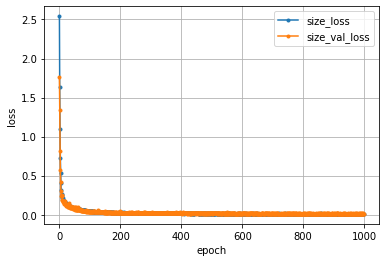

In [16]:
# 学習経過の可視化(大きさ)
size_loss     = size_history2.history['loss']
size_val_loss = size_history2.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [20]:
#大きさごとの推定精度の確認
size_predict = size_model2.predict(size_x_test)
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.2):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.4):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.6):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.8):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 1):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.9778270509977827
大きさ2の正答率：0.9884259259259259
大きさ3の正答率：0.9975609756097561
大きさ4の正答率：1.0
大きさ5の正答率：1.0


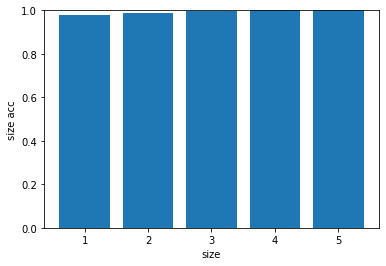

In [22]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [18]:
#大きさごとの推定精度の確認
size_predict = size_model2.predict(size_x_test)
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 5):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.9977827050997783
大きさ2の正答率：0.9976851851851852
大きさ3の正答率：0.9975609756097561
大きさ4の正答率：0.9974025974025974
大きさ5の正答率：1.0


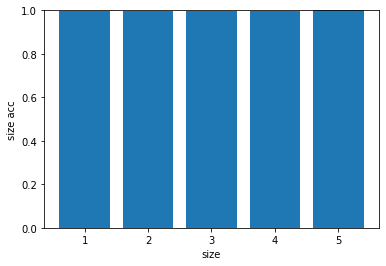

In [19]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [8]:
# モデルの評価(位置)
position_score =position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

64/64 [==============================] - 0s 1ms/step - loss: 0.0355 - accuracy: 0.7992
Test loss: 0.03546751290559769
Test accuracy: 0.7992106676101685


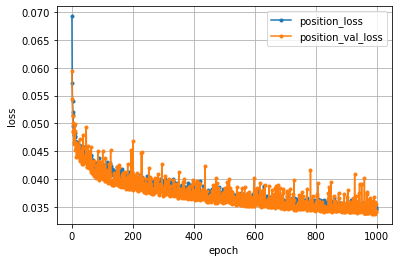

In [9]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
print(position_y_test[0:3])
position_predict = position_model.predict(position_x_test)
print(position_predict[0:3])

[[0.43 0.49]
 [0.14 0.22]
 [0.48 0.7 ]]
[[0.38335758 0.6380064 ]
 [0.19607621 0.57694036]
 [0.45988497 0.5885707 ]]


In [27]:
## CNN(位置)

### modelの作成
position_model2 = Sequential()
### 畳み込み層
position_model2.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
position_model2.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model2.add(Flatten())
### 全結合層
position_model2.add(Dense(2, activation='linear'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model2.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

In [28]:
# 学習(位置)
epochs = 10000
batch_size = 128
position_history2 = position_model2.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Epoch 1/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0972 - accuracy: 0.5677 - val_loss: 0.0593 - val_accuracy: 0.6769
Epoch 2/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.6755 - val_loss: 0.0562 - val_accuracy: 0.6611
Epoch 3/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.7108 - val_loss: 0.0528 - val_accuracy: 0.7287
Epoch 4/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0531 - accuracy: 0.7002 - val_loss: 0.0512 - val_accuracy: 0.7296
Epoch 5/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.7061 - val_loss: 0.0500 - val_accuracy: 0.7889
Epoch 6/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.7241 - val_loss: 0.0496 - val_accuracy: 0.6907
Epoch 7/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.7468 - val_loss: 0.0491 - val_accuracy: 0.8096

Epoch 58/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.7681 - val_loss: 0.0439 - val_accuracy: 0.7247
Epoch 59/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.7523 - val_loss: 0.0436 - val_accuracy: 0.8081
Epoch 60/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.7628 - val_loss: 0.0436 - val_accuracy: 0.7277
Epoch 61/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.7546 - val_loss: 0.0434 - val_accuracy: 0.7336
Epoch 62/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.7345 - val_loss: 0.0419 - val_accuracy: 0.7824
Epoch 63/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.7824 - val_loss: 0.0427 - val_accuracy: 0.7405
Epoch 64/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.7699 - val_loss: 0.0419 - val_accuracy:

Epoch 115/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.7802 - val_loss: 0.0412 - val_accuracy: 0.7533
Epoch 116/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.7769 - val_loss: 0.0448 - val_accuracy: 0.6556
Epoch 117/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.7679 - val_loss: 0.0403 - val_accuracy: 0.8111
Epoch 118/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.7498 - val_loss: 0.0400 - val_accuracy: 0.7667
Epoch 119/10000
64/64 [==============================] - 0s 8ms/step - loss: 0.0414 - accuracy: 0.7770 - val_loss: 0.0409 - val_accuracy: 0.7815
Epoch 120/10000
64/64 [==============================] - 0s 5ms/step - loss: 0.0420 - accuracy: 0.7593 - val_loss: 0.0422 - val_accuracy: 0.7242
Epoch 121/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.7789 - val_loss: 0.0398 - val_ac

64/64 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.7812 - val_loss: 0.0384 - val_accuracy: 0.7815
Epoch 228/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.7736 - val_loss: 0.0383 - val_accuracy: 0.7819
Epoch 229/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.7754 - val_loss: 0.0410 - val_accuracy: 0.7637
Epoch 230/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.7654 - val_loss: 0.0398 - val_accuracy: 0.7440
Epoch 231/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.7755 - val_loss: 0.0382 - val_accuracy: 0.7844
Epoch 232/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.7773 - val_loss: 0.0388 - val_accuracy: 0.7874
Epoch 233/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 0.7718 - val_loss: 0.0382 - val_accuracy: 0.7859
E

64/64 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.7821 - val_loss: 0.0377 - val_accuracy: 0.7874
Epoch 340/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.7815 - val_loss: 0.0376 - val_accuracy: 0.7874
Epoch 341/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.7810 - val_loss: 0.0402 - val_accuracy: 0.7287
Epoch 342/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.7702 - val_loss: 0.0374 - val_accuracy: 0.7805
Epoch 343/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.7835 - val_loss: 0.0371 - val_accuracy: 0.7879
Epoch 344/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.7604 - val_loss: 0.0390 - val_accuracy: 0.7829
Epoch 345/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.7753 - val_loss: 0.0373 - val_accuracy: 0.7903
E

64/64 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.7606 - val_loss: 0.0369 - val_accuracy: 0.7829
Epoch 452/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.7823 - val_loss: 0.0363 - val_accuracy: 0.7903
Epoch 453/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.7760 - val_loss: 0.0364 - val_accuracy: 0.7889
Epoch 454/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.7822 - val_loss: 0.0362 - val_accuracy: 0.7879
Epoch 455/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.7779 - val_loss: 0.0378 - val_accuracy: 0.7854
Epoch 456/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.7811 - val_loss: 0.0377 - val_accuracy: 0.7854
Epoch 457/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.7670 - val_loss: 0.0370 - val_accuracy: 0.7918
E

64/64 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.7697 - val_loss: 0.0373 - val_accuracy: 0.7607
Epoch 564/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.7840 - val_loss: 0.0362 - val_accuracy: 0.7884
Epoch 565/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.7733 - val_loss: 0.0378 - val_accuracy: 0.7775
Epoch 566/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.7639 - val_loss: 0.0360 - val_accuracy: 0.7834
Epoch 567/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.7855 - val_loss: 0.0369 - val_accuracy: 0.7884
Epoch 568/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.7771 - val_loss: 0.0358 - val_accuracy: 0.7913
Epoch 569/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.7798 - val_loss: 0.0381 - val_accuracy: 0.8012
E

64/64 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.7839 - val_loss: 0.0357 - val_accuracy: 0.7790
Epoch 676/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.7865 - val_loss: 0.0356 - val_accuracy: 0.7874
Epoch 677/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.7832 - val_loss: 0.0353 - val_accuracy: 0.7893
Epoch 678/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.7771 - val_loss: 0.0353 - val_accuracy: 0.7913
Epoch 679/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.7826 - val_loss: 0.0352 - val_accuracy: 0.7963
Epoch 680/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.7859 - val_loss: 0.0354 - val_accuracy: 0.7854
Epoch 681/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.7874 - val_loss: 0.0355 - val_accuracy: 0.7859
E

64/64 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.7849 - val_loss: 0.0351 - val_accuracy: 0.7923
Epoch 788/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.7912 - val_loss: 0.0349 - val_accuracy: 0.8012
Epoch 789/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.7649 - val_loss: 0.0349 - val_accuracy: 0.7923
Epoch 790/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.7881 - val_loss: 0.0351 - val_accuracy: 0.8061
Epoch 791/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.7732 - val_loss: 0.0361 - val_accuracy: 0.8041
Epoch 792/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.7856 - val_loss: 0.0354 - val_accuracy: 0.7933
Epoch 793/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.7657 - val_loss: 0.0372 - val_accuracy: 0.7499
E

64/64 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.7801 - val_loss: 0.0343 - val_accuracy: 0.7972
Epoch 900/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.7860 - val_loss: 0.0372 - val_accuracy: 0.7449
Epoch 901/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.7819 - val_loss: 0.0348 - val_accuracy: 0.7898
Epoch 902/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.7848 - val_loss: 0.0350 - val_accuracy: 0.7854
Epoch 903/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.7797 - val_loss: 0.0372 - val_accuracy: 0.7420
Epoch 904/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.7750 - val_loss: 0.0363 - val_accuracy: 0.7839
Epoch 905/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.7785 - val_loss: 0.0345 - val_accuracy: 0.7953
E

64/64 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.7860 - val_loss: 0.0343 - val_accuracy: 0.7963
Epoch 1012/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.7833 - val_loss: 0.0373 - val_accuracy: 0.7079
Epoch 1013/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.7801 - val_loss: 0.0377 - val_accuracy: 0.8012
Epoch 1014/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.7918 - val_loss: 0.0342 - val_accuracy: 0.7972
Epoch 1015/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.7827 - val_loss: 0.0341 - val_accuracy: 0.7953
Epoch 1016/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.7892 - val_loss: 0.0356 - val_accuracy: 0.8037
Epoch 1017/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.7911 - val_loss: 0.0366 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.7895 - val_loss: 0.0341 - val_accuracy: 0.7982
Epoch 1124/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.7791 - val_loss: 0.0361 - val_accuracy: 0.7701
Epoch 1125/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.7638 - val_loss: 0.0355 - val_accuracy: 0.7731
Epoch 1126/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.7769 - val_loss: 0.0344 - val_accuracy: 0.7967
Epoch 1127/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.7797 - val_loss: 0.0336 - val_accuracy: 0.7943
Epoch 1128/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.7902 - val_loss: 0.0358 - val_accuracy: 0.7612
Epoch 1129/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.7901 - val_loss: 0.0339 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.7902 - val_loss: 0.0334 - val_accuracy: 0.7972
Epoch 1236/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.7896 - val_loss: 0.0340 - val_accuracy: 0.7997
Epoch 1237/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.7868 - val_loss: 0.0342 - val_accuracy: 0.7869
Epoch 1238/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.7940 - val_loss: 0.0337 - val_accuracy: 0.8022
Epoch 1239/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.7789 - val_loss: 0.0341 - val_accuracy: 0.7963
Epoch 1240/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.7812 - val_loss: 0.0348 - val_accuracy: 0.7879
Epoch 1241/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.7842 - val_loss: 0.0333 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.7919 - val_loss: 0.0331 - val_accuracy: 0.7938
Epoch 1348/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.7945 - val_loss: 0.0341 - val_accuracy: 0.8027
Epoch 1349/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.7869 - val_loss: 0.0333 - val_accuracy: 0.7958
Epoch 1350/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.7876 - val_loss: 0.0347 - val_accuracy: 0.7928
Epoch 1351/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.7896 - val_loss: 0.0330 - val_accuracy: 0.7972
Epoch 1352/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.7856 - val_loss: 0.0339 - val_accuracy: 0.7874
Epoch 1353/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.7892 - val_loss: 0.0337 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.7933 - val_loss: 0.0345 - val_accuracy: 0.8091
Epoch 1460/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.7905 - val_loss: 0.0340 - val_accuracy: 0.8032
Epoch 1461/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.7898 - val_loss: 0.0329 - val_accuracy: 0.7972
Epoch 1462/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.7884 - val_loss: 0.0357 - val_accuracy: 0.7967
Epoch 1463/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.7887 - val_loss: 0.0337 - val_accuracy: 0.7928
Epoch 1464/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.7939 - val_loss: 0.0390 - val_accuracy: 0.7958
Epoch 1465/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.7816 - val_loss: 0.0367 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.7871 - val_loss: 0.0327 - val_accuracy: 0.8061
Epoch 1572/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.7849 - val_loss: 0.0348 - val_accuracy: 0.8066
Epoch 1573/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.7879 - val_loss: 0.0327 - val_accuracy: 0.8066
Epoch 1574/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.7926 - val_loss: 0.0329 - val_accuracy: 0.8022
Epoch 1575/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.7922 - val_loss: 0.0342 - val_accuracy: 0.7982
Epoch 1576/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.7955 - val_loss: 0.0329 - val_accuracy: 0.8071
Epoch 1577/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.7902 - val_loss: 0.0336 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.7877 - val_loss: 0.0328 - val_accuracy: 0.7987
Epoch 1684/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.7916 - val_loss: 0.0329 - val_accuracy: 0.8051
Epoch 1685/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.7921 - val_loss: 0.0327 - val_accuracy: 0.7997
Epoch 1686/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.7908 - val_loss: 0.0341 - val_accuracy: 0.7963
Epoch 1687/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.7933 - val_loss: 0.0326 - val_accuracy: 0.8106
Epoch 1688/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.7875 - val_loss: 0.0339 - val_accuracy: 0.7859
Epoch 1689/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.7855 - val_loss: 0.0323 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.7900 - val_loss: 0.0321 - val_accuracy: 0.8061
Epoch 1796/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.7946 - val_loss: 0.0326 - val_accuracy: 0.8111
Epoch 1797/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.7919 - val_loss: 0.0320 - val_accuracy: 0.8066
Epoch 1798/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.7956 - val_loss: 0.0322 - val_accuracy: 0.8086
Epoch 1799/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.7967 - val_loss: 0.0320 - val_accuracy: 0.7977
Epoch 1800/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.7902 - val_loss: 0.0321 - val_accuracy: 0.8081
Epoch 1801/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.7954 - val_loss: 0.0341 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.7938 - val_loss: 0.0324 - val_accuracy: 0.8150
Epoch 1908/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.7906 - val_loss: 0.0380 - val_accuracy: 0.8111
Epoch 1909/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.7986 - val_loss: 0.0326 - val_accuracy: 0.8041
Epoch 1910/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.7974 - val_loss: 0.0336 - val_accuracy: 0.8037
Epoch 1911/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.7960 - val_loss: 0.0348 - val_accuracy: 0.7992
Epoch 1912/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.7983 - val_loss: 0.0346 - val_accuracy: 0.8012
Epoch 1913/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.7983 - val_loss: 0.0331 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.7992 - val_loss: 0.0332 - val_accuracy: 0.8061
Epoch 2020/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.8024 - val_loss: 0.0319 - val_accuracy: 0.8175
Epoch 2021/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.8065 - val_loss: 0.0322 - val_accuracy: 0.8027
Epoch 2022/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.8016 - val_loss: 0.0315 - val_accuracy: 0.8096
Epoch 2023/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8032 - val_loss: 0.0316 - val_accuracy: 0.8096
Epoch 2024/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.8008 - val_loss: 0.0333 - val_accuracy: 0.8180
Epoch 2025/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.8020 - val_loss: 0.0323 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.8006 - val_loss: 0.0325 - val_accuracy: 0.8037
Epoch 2132/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.8022 - val_loss: 0.0330 - val_accuracy: 0.8120
Epoch 2133/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.8066 - val_loss: 0.0322 - val_accuracy: 0.8150
Epoch 2134/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8040 - val_loss: 0.0321 - val_accuracy: 0.8115
Epoch 2135/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.7998 - val_loss: 0.0319 - val_accuracy: 0.8175
Epoch 2136/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.8044 - val_loss: 0.0321 - val_accuracy: 0.8160
Epoch 2137/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.7967 - val_loss: 0.0348 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.8039 - val_loss: 0.0312 - val_accuracy: 0.8096
Epoch 2244/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.8035 - val_loss: 0.0315 - val_accuracy: 0.8199
Epoch 2245/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8070 - val_loss: 0.0327 - val_accuracy: 0.8106
Epoch 2246/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.7979 - val_loss: 0.0317 - val_accuracy: 0.8199
Epoch 2247/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.8064 - val_loss: 0.0344 - val_accuracy: 0.7750
Epoch 2248/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8022 - val_loss: 0.0317 - val_accuracy: 0.8155
Epoch 2249/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8024 - val_loss: 0.0319 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8038 - val_loss: 0.0322 - val_accuracy: 0.8204
Epoch 2356/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.8096 - val_loss: 0.0317 - val_accuracy: 0.8086
Epoch 2357/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.8016 - val_loss: 0.0334 - val_accuracy: 0.8150
Epoch 2358/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.8059 - val_loss: 0.0313 - val_accuracy: 0.8106
Epoch 2359/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8096 - val_loss: 0.0316 - val_accuracy: 0.8115
Epoch 2360/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8062 - val_loss: 0.0316 - val_accuracy: 0.8125
Epoch 2361/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.8009 - val_loss: 0.0317 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.8061 - val_loss: 0.0310 - val_accuracy: 0.8244
Epoch 2468/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.8093 - val_loss: 0.0311 - val_accuracy: 0.8254
Epoch 2469/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8069 - val_loss: 0.0311 - val_accuracy: 0.8086
Epoch 2470/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.8111 - val_loss: 0.0311 - val_accuracy: 0.8259
Epoch 2471/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8029 - val_loss: 0.0318 - val_accuracy: 0.8185
Epoch 2472/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8106 - val_loss: 0.0328 - val_accuracy: 0.8037
Epoch 2473/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.8009 - val_loss: 0.0313 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8072 - val_loss: 0.0311 - val_accuracy: 0.8185
Epoch 2580/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.8091 - val_loss: 0.0309 - val_accuracy: 0.8249
Epoch 2581/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8118 - val_loss: 0.0336 - val_accuracy: 0.8007
Epoch 2582/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.7951 - val_loss: 0.0314 - val_accuracy: 0.8145
Epoch 2583/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8075 - val_loss: 0.0343 - val_accuracy: 0.7538
Epoch 2584/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.8065 - val_loss: 0.0314 - val_accuracy: 0.8263
Epoch 2585/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8162 - val_loss: 0.0325 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8143 - val_loss: 0.0313 - val_accuracy: 0.8155
Epoch 2692/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8102 - val_loss: 0.0331 - val_accuracy: 0.8263
Epoch 2693/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.8078 - val_loss: 0.0329 - val_accuracy: 0.8071
Epoch 2694/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.8048 - val_loss: 0.0318 - val_accuracy: 0.8076
Epoch 2695/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.8098 - val_loss: 0.0315 - val_accuracy: 0.8081
Epoch 2696/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.8111 - val_loss: 0.0310 - val_accuracy: 0.8135
Epoch 2697/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8061 - val_loss: 0.0312 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8162 - val_loss: 0.0353 - val_accuracy: 0.8066
Epoch 2804/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8102 - val_loss: 0.0318 - val_accuracy: 0.8145
Epoch 2805/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.8046 - val_loss: 0.0308 - val_accuracy: 0.8115
Epoch 2806/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8045 - val_loss: 0.0311 - val_accuracy: 0.8051
Epoch 2807/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.8157 - val_loss: 0.0313 - val_accuracy: 0.8214
Epoch 2808/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8129 - val_loss: 0.0318 - val_accuracy: 0.8056
Epoch 2809/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.8093 - val_loss: 0.0316 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8152 - val_loss: 0.0312 - val_accuracy: 0.8175
Epoch 2916/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8107 - val_loss: 0.0318 - val_accuracy: 0.8145
Epoch 2917/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8118 - val_loss: 0.0325 - val_accuracy: 0.7963
Epoch 2918/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8094 - val_loss: 0.0311 - val_accuracy: 0.8318
Epoch 2919/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8109 - val_loss: 0.0308 - val_accuracy: 0.8308
Epoch 2920/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8103 - val_loss: 0.0320 - val_accuracy: 0.8111
Epoch 2921/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8064 - val_loss: 0.0315 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.7988 - val_loss: 0.0325 - val_accuracy: 0.8115
Epoch 3028/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8060 - val_loss: 0.0304 - val_accuracy: 0.8313
Epoch 3029/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8170 - val_loss: 0.0305 - val_accuracy: 0.8313
Epoch 3030/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8157 - val_loss: 0.0314 - val_accuracy: 0.8115
Epoch 3031/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8122 - val_loss: 0.0325 - val_accuracy: 0.8120
Epoch 3032/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8074 - val_loss: 0.0324 - val_accuracy: 0.8071
Epoch 3033/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8090 - val_loss: 0.0306 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8160 - val_loss: 0.0313 - val_accuracy: 0.8096
Epoch 3140/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8103 - val_loss: 0.0321 - val_accuracy: 0.8293
Epoch 3141/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8064 - val_loss: 0.0306 - val_accuracy: 0.8283
Epoch 3142/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8136 - val_loss: 0.0312 - val_accuracy: 0.8111
Epoch 3143/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8189 - val_loss: 0.0313 - val_accuracy: 0.8239
Epoch 3144/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8109 - val_loss: 0.0304 - val_accuracy: 0.8367
Epoch 3145/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8035 - val_loss: 0.0306 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8098 - val_loss: 0.0306 - val_accuracy: 0.8234
Epoch 3252/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8056 - val_loss: 0.0308 - val_accuracy: 0.8323
Epoch 3253/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8117 - val_loss: 0.0310 - val_accuracy: 0.8145
Epoch 3254/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8114 - val_loss: 0.0318 - val_accuracy: 0.8224
Epoch 3255/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8133 - val_loss: 0.0309 - val_accuracy: 0.8219
Epoch 3256/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8161 - val_loss: 0.0311 - val_accuracy: 0.8165
Epoch 3257/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8144 - val_loss: 0.0312 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8151 - val_loss: 0.0357 - val_accuracy: 0.8189
Epoch 3364/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8114 - val_loss: 0.0316 - val_accuracy: 0.8170
Epoch 3365/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8139 - val_loss: 0.0304 - val_accuracy: 0.8372
Epoch 3366/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8167 - val_loss: 0.0310 - val_accuracy: 0.8135
Epoch 3367/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.8193 - val_loss: 0.0308 - val_accuracy: 0.8140
Epoch 3368/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8128 - val_loss: 0.0306 - val_accuracy: 0.8180
Epoch 3369/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8210 - val_loss: 0.0315 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8133 - val_loss: 0.0307 - val_accuracy: 0.8155
Epoch 3476/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8134 - val_loss: 0.0312 - val_accuracy: 0.8111
Epoch 3477/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8099 - val_loss: 0.0318 - val_accuracy: 0.8046
Epoch 3478/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8128 - val_loss: 0.0311 - val_accuracy: 0.8175
Epoch 3479/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8080 - val_loss: 0.0325 - val_accuracy: 0.8259
Epoch 3480/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8118 - val_loss: 0.0329 - val_accuracy: 0.8288
Epoch 3481/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8160 - val_loss: 0.0302 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8155 - val_loss: 0.0314 - val_accuracy: 0.8421
Epoch 3588/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8161 - val_loss: 0.0303 - val_accuracy: 0.8337
Epoch 3589/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8134 - val_loss: 0.0320 - val_accuracy: 0.8101
Epoch 3590/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8130 - val_loss: 0.0299 - val_accuracy: 0.8357
Epoch 3591/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.8124 - val_loss: 0.0307 - val_accuracy: 0.8303
Epoch 3592/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8161 - val_loss: 0.0325 - val_accuracy: 0.7982
Epoch 3593/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8159 - val_loss: 0.0338 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8173 - val_loss: 0.0302 - val_accuracy: 0.8283
Epoch 3700/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8159 - val_loss: 0.0300 - val_accuracy: 0.8426
Epoch 3701/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8156 - val_loss: 0.0311 - val_accuracy: 0.8091
Epoch 3702/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.8180 - val_loss: 0.0300 - val_accuracy: 0.8411
Epoch 3703/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8143 - val_loss: 0.0330 - val_accuracy: 0.8367
Epoch 3704/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.7971 - val_loss: 0.0306 - val_accuracy: 0.8372
Epoch 3705/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.8182 - val_loss: 0.0316 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8172 - val_loss: 0.0307 - val_accuracy: 0.8308
Epoch 3812/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.8161 - val_loss: 0.0299 - val_accuracy: 0.8416
Epoch 3813/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8204 - val_loss: 0.0301 - val_accuracy: 0.8298
Epoch 3814/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.8207 - val_loss: 0.0304 - val_accuracy: 0.8402
Epoch 3815/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.8157 - val_loss: 0.0300 - val_accuracy: 0.8318
Epoch 3816/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8155 - val_loss: 0.0328 - val_accuracy: 0.7893
Epoch 3817/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8176 - val_loss: 0.0309 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8234 - val_loss: 0.0313 - val_accuracy: 0.8111
Epoch 3924/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.8155 - val_loss: 0.0337 - val_accuracy: 0.8259
Epoch 3925/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8117 - val_loss: 0.0302 - val_accuracy: 0.8303
Epoch 3926/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8199 - val_loss: 0.0301 - val_accuracy: 0.8397
Epoch 3927/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8202 - val_loss: 0.0333 - val_accuracy: 0.8268
Epoch 3928/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8205 - val_loss: 0.0302 - val_accuracy: 0.8372
Epoch 3929/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8193 - val_loss: 0.0328 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.8236 - val_loss: 0.0309 - val_accuracy: 0.8189
Epoch 4036/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8233 - val_loss: 0.0306 - val_accuracy: 0.8259
Epoch 4037/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8198 - val_loss: 0.0304 - val_accuracy: 0.8224
Epoch 4038/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.8207 - val_loss: 0.0305 - val_accuracy: 0.8416
Epoch 4039/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8117 - val_loss: 0.0320 - val_accuracy: 0.8150
Epoch 4040/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8109 - val_loss: 0.0308 - val_accuracy: 0.8259
Epoch 4041/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8157 - val_loss: 0.0341 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8236 - val_loss: 0.0312 - val_accuracy: 0.8224
Epoch 4148/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.8196 - val_loss: 0.0299 - val_accuracy: 0.8471
Epoch 4149/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.8203 - val_loss: 0.0296 - val_accuracy: 0.8476
Epoch 4150/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8218 - val_loss: 0.0333 - val_accuracy: 0.7913
Epoch 4151/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8197 - val_loss: 0.0303 - val_accuracy: 0.8165
Epoch 4152/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8219 - val_loss: 0.0304 - val_accuracy: 0.8313
Epoch 4153/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8170 - val_loss: 0.0315 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8144 - val_loss: 0.0300 - val_accuracy: 0.8426
Epoch 4260/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8160 - val_loss: 0.0341 - val_accuracy: 0.7430
Epoch 4261/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8151 - val_loss: 0.0302 - val_accuracy: 0.8446
Epoch 4262/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8281 - val_loss: 0.0309 - val_accuracy: 0.8471
Epoch 4263/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8224 - val_loss: 0.0321 - val_accuracy: 0.7992
Epoch 4264/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8181 - val_loss: 0.0310 - val_accuracy: 0.8204
Epoch 4265/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.8265 - val_loss: 0.0307 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8205 - val_loss: 0.0296 - val_accuracy: 0.8293
Epoch 4372/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8245 - val_loss: 0.0297 - val_accuracy: 0.8367
Epoch 4373/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8286 - val_loss: 0.0296 - val_accuracy: 0.8471
Epoch 4374/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8234 - val_loss: 0.0300 - val_accuracy: 0.8268
Epoch 4375/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8081 - val_loss: 0.0304 - val_accuracy: 0.8160
Epoch 4376/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.8207 - val_loss: 0.0303 - val_accuracy: 0.8476
Epoch 4377/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8281 - val_loss: 0.0294 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.8256 - val_loss: 0.0302 - val_accuracy: 0.8155
Epoch 4484/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8212 - val_loss: 0.0296 - val_accuracy: 0.8481
Epoch 4485/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8234 - val_loss: 0.0303 - val_accuracy: 0.8180
Epoch 4486/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.8094 - val_loss: 0.0295 - val_accuracy: 0.8490
Epoch 4487/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8188 - val_loss: 0.0305 - val_accuracy: 0.8490
Epoch 4488/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8250 - val_loss: 0.0315 - val_accuracy: 0.8451
Epoch 4489/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.8259 - val_loss: 0.0307 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.8220 - val_loss: 0.0292 - val_accuracy: 0.8436
Epoch 4596/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8234 - val_loss: 0.0297 - val_accuracy: 0.8199
Epoch 4597/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8270 - val_loss: 0.0308 - val_accuracy: 0.8333
Epoch 4598/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8129 - val_loss: 0.0316 - val_accuracy: 0.8140
Epoch 4599/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8229 - val_loss: 0.0311 - val_accuracy: 0.8120
Epoch 4600/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8252 - val_loss: 0.0293 - val_accuracy: 0.8337
Epoch 4601/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.8244 - val_loss: 0.0293 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8314 - val_loss: 0.0292 - val_accuracy: 0.8485
Epoch 4708/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8223 - val_loss: 0.0315 - val_accuracy: 0.8244
Epoch 4709/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8242 - val_loss: 0.0357 - val_accuracy: 0.7686
Epoch 4710/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8193 - val_loss: 0.0296 - val_accuracy: 0.8293
Epoch 4711/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.8196 - val_loss: 0.0300 - val_accuracy: 0.8337
Epoch 4712/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8275 - val_loss: 0.0344 - val_accuracy: 0.7790
Epoch 4713/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8220 - val_loss: 0.0308 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8309 - val_loss: 0.0323 - val_accuracy: 0.8046
Epoch 4820/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8252 - val_loss: 0.0294 - val_accuracy: 0.8397
Epoch 4821/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8225 - val_loss: 0.0296 - val_accuracy: 0.8352
Epoch 4822/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.8229 - val_loss: 0.0295 - val_accuracy: 0.8293
Epoch 4823/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8278 - val_loss: 0.0295 - val_accuracy: 0.8500
Epoch 4824/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8261 - val_loss: 0.0309 - val_accuracy: 0.8234
Epoch 4825/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8213 - val_loss: 0.0311 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8271 - val_loss: 0.0294 - val_accuracy: 0.8323
Epoch 4932/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8229 - val_loss: 0.0305 - val_accuracy: 0.8165
Epoch 4933/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8304 - val_loss: 0.0293 - val_accuracy: 0.8426
Epoch 4934/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8275 - val_loss: 0.0290 - val_accuracy: 0.8377
Epoch 4935/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8313 - val_loss: 0.0311 - val_accuracy: 0.8318
Epoch 4936/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8238 - val_loss: 0.0294 - val_accuracy: 0.8347
Epoch 4937/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.8186 - val_loss: 0.0297 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.8300 - val_loss: 0.0294 - val_accuracy: 0.8313
Epoch 5044/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.8239 - val_loss: 0.0290 - val_accuracy: 0.8510
Epoch 5045/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8263 - val_loss: 0.0303 - val_accuracy: 0.8145
Epoch 5046/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8240 - val_loss: 0.0299 - val_accuracy: 0.8500
Epoch 5047/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8262 - val_loss: 0.0300 - val_accuracy: 0.8352
Epoch 5048/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.8247 - val_loss: 0.0296 - val_accuracy: 0.8254
Epoch 5049/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.8292 - val_loss: 0.0290 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0292 - accuracy: 0.8259 - val_loss: 0.0304 - val_accuracy: 0.8451
Epoch 5156/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8289 - val_loss: 0.0342 - val_accuracy: 0.8402
Epoch 5157/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8218 - val_loss: 0.0300 - val_accuracy: 0.8402
Epoch 5158/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8234 - val_loss: 0.0290 - val_accuracy: 0.8525
Epoch 5159/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.8299 - val_loss: 0.0293 - val_accuracy: 0.8244
Epoch 5160/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.8310 - val_loss: 0.0300 - val_accuracy: 0.8436
Epoch 5161/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8260 - val_loss: 0.0300 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8336 - val_loss: 0.0296 - val_accuracy: 0.8234
Epoch 5268/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8308 - val_loss: 0.0312 - val_accuracy: 0.8175
Epoch 5269/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8228 - val_loss: 0.0308 - val_accuracy: 0.8199
Epoch 5270/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8247 - val_loss: 0.0290 - val_accuracy: 0.8481
Epoch 5271/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8293 - val_loss: 0.0305 - val_accuracy: 0.8481
Epoch 5272/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8325 - val_loss: 0.0296 - val_accuracy: 0.8461
Epoch 5273/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8219 - val_loss: 0.0301 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.8176 - val_loss: 0.0292 - val_accuracy: 0.8540
Epoch 5380/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8292 - val_loss: 0.0310 - val_accuracy: 0.8140
Epoch 5381/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.8162 - val_loss: 0.0292 - val_accuracy: 0.8337
Epoch 5382/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8181 - val_loss: 0.0326 - val_accuracy: 0.8214
Epoch 5383/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8336 - val_loss: 0.0295 - val_accuracy: 0.8362
Epoch 5384/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8255 - val_loss: 0.0326 - val_accuracy: 0.8101
Epoch 5385/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8222 - val_loss: 0.0301 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.8315 - val_loss: 0.0289 - val_accuracy: 0.8520
Epoch 5492/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.8283 - val_loss: 0.0291 - val_accuracy: 0.8342
Epoch 5493/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.8255 - val_loss: 0.0296 - val_accuracy: 0.8471
Epoch 5494/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8235 - val_loss: 0.0295 - val_accuracy: 0.8392
Epoch 5495/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.8362 - val_loss: 0.0290 - val_accuracy: 0.8495
Epoch 5496/10000
64/64 [==============================] - 0s 8ms/step - loss: 0.0290 - accuracy: 0.8376 - val_loss: 0.0290 - val_accuracy: 0.8362
Epoch 5497/10000
64/64 [==============================] - 0s 8ms/step - loss: 0.0286 - accuracy: 0.8386 - val_loss: 0.0306 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0289 - accuracy: 0.8337 - val_loss: 0.0296 - val_accuracy: 0.8367
Epoch 5604/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.8366 - val_loss: 0.0290 - val_accuracy: 0.8431
Epoch 5605/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.8310 - val_loss: 0.0294 - val_accuracy: 0.8441
Epoch 5606/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.8288 - val_loss: 0.0288 - val_accuracy: 0.8471
Epoch 5607/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.8337 - val_loss: 0.0309 - val_accuracy: 0.8367
Epoch 5608/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.8345 - val_loss: 0.0288 - val_accuracy: 0.8333
Epoch 5609/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0292 - accuracy: 0.8316 - val_loss: 0.0290 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8141 - val_loss: 0.0330 - val_accuracy: 0.7933
Epoch 5716/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8331 - val_loss: 0.0305 - val_accuracy: 0.8155
Epoch 5717/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8314 - val_loss: 0.0290 - val_accuracy: 0.8278
Epoch 5718/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8303 - val_loss: 0.0300 - val_accuracy: 0.8259
Epoch 5719/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8304 - val_loss: 0.0295 - val_accuracy: 0.8328
Epoch 5720/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8365 - val_loss: 0.0331 - val_accuracy: 0.7898
Epoch 5721/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8277 - val_loss: 0.0312 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.8296 - val_loss: 0.0292 - val_accuracy: 0.8313
Epoch 5828/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8329 - val_loss: 0.0285 - val_accuracy: 0.8569
Epoch 5829/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8379 - val_loss: 0.0291 - val_accuracy: 0.8495
Epoch 5830/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.8363 - val_loss: 0.0322 - val_accuracy: 0.8076
Epoch 5831/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8313 - val_loss: 0.0290 - val_accuracy: 0.8402
Epoch 5832/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8331 - val_loss: 0.0299 - val_accuracy: 0.8234
Epoch 5833/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8277 - val_loss: 0.0290 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8334 - val_loss: 0.0307 - val_accuracy: 0.8594
Epoch 5940/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8292 - val_loss: 0.0287 - val_accuracy: 0.8564
Epoch 5941/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8366 - val_loss: 0.0314 - val_accuracy: 0.8204
Epoch 5942/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8266 - val_loss: 0.0290 - val_accuracy: 0.8342
Epoch 5943/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8266 - val_loss: 0.0300 - val_accuracy: 0.8323
Epoch 5944/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8312 - val_loss: 0.0291 - val_accuracy: 0.8263
Epoch 5945/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8367 - val_loss: 0.0296 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8404 - val_loss: 0.0313 - val_accuracy: 0.8303
Epoch 6052/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.8339 - val_loss: 0.0285 - val_accuracy: 0.8564
Epoch 6053/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8399 - val_loss: 0.0286 - val_accuracy: 0.8481
Epoch 6054/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8407 - val_loss: 0.0285 - val_accuracy: 0.8599
Epoch 6055/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.8381 - val_loss: 0.0290 - val_accuracy: 0.8574
Epoch 6056/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8355 - val_loss: 0.0301 - val_accuracy: 0.8446
Epoch 6057/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.8329 - val_loss: 0.0302 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8288 - val_loss: 0.0296 - val_accuracy: 0.8204
Epoch 6164/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.8345 - val_loss: 0.0300 - val_accuracy: 0.8239
Epoch 6165/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8342 - val_loss: 0.0305 - val_accuracy: 0.8209
Epoch 6166/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8312 - val_loss: 0.0292 - val_accuracy: 0.8234
Epoch 6167/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.8298 - val_loss: 0.0287 - val_accuracy: 0.8505
Epoch 6168/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8303 - val_loss: 0.0301 - val_accuracy: 0.8150
Epoch 6169/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.8298 - val_loss: 0.0291 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.8297 - val_loss: 0.0286 - val_accuracy: 0.8545
Epoch 6276/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8305 - val_loss: 0.0302 - val_accuracy: 0.8387
Epoch 6277/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.8263 - val_loss: 0.0304 - val_accuracy: 0.8397
Epoch 6278/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8353 - val_loss: 0.0289 - val_accuracy: 0.8510
Epoch 6279/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8419 - val_loss: 0.0316 - val_accuracy: 0.8490
Epoch 6280/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8292 - val_loss: 0.0289 - val_accuracy: 0.8372
Epoch 6281/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8323 - val_loss: 0.0306 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.8304 - val_loss: 0.0289 - val_accuracy: 0.8268
Epoch 6388/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.8399 - val_loss: 0.0287 - val_accuracy: 0.8599
Epoch 6389/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8372 - val_loss: 0.0285 - val_accuracy: 0.8416
Epoch 6390/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.8326 - val_loss: 0.0294 - val_accuracy: 0.8347
Epoch 6391/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8355 - val_loss: 0.0287 - val_accuracy: 0.8407
Epoch 6392/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8324 - val_loss: 0.0284 - val_accuracy: 0.8397
Epoch 6393/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8392 - val_loss: 0.0292 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8352 - val_loss: 0.0286 - val_accuracy: 0.8559
Epoch 6500/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.8378 - val_loss: 0.0290 - val_accuracy: 0.8352
Epoch 6501/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8244 - val_loss: 0.0291 - val_accuracy: 0.8199
Epoch 6502/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8349 - val_loss: 0.0292 - val_accuracy: 0.8579
Epoch 6503/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8409 - val_loss: 0.0290 - val_accuracy: 0.8461
Epoch 6504/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8360 - val_loss: 0.0290 - val_accuracy: 0.8392
Epoch 6505/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8394 - val_loss: 0.0304 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8405 - val_loss: 0.0293 - val_accuracy: 0.8239
Epoch 6612/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.8378 - val_loss: 0.0286 - val_accuracy: 0.8441
Epoch 6613/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8344 - val_loss: 0.0288 - val_accuracy: 0.8481
Epoch 6614/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8379 - val_loss: 0.0287 - val_accuracy: 0.8333
Epoch 6615/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8379 - val_loss: 0.0313 - val_accuracy: 0.7943
Epoch 6616/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8414 - val_loss: 0.0283 - val_accuracy: 0.8392
Epoch 6617/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8371 - val_loss: 0.0283 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8363 - val_loss: 0.0295 - val_accuracy: 0.8185
Epoch 6724/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8351 - val_loss: 0.0292 - val_accuracy: 0.8293
Epoch 6725/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.8419 - val_loss: 0.0319 - val_accuracy: 0.8520
Epoch 6726/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8355 - val_loss: 0.0291 - val_accuracy: 0.8584
Epoch 6727/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8383 - val_loss: 0.0282 - val_accuracy: 0.8451
Epoch 6728/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.8325 - val_loss: 0.0286 - val_accuracy: 0.8485
Epoch 6729/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8352 - val_loss: 0.0288 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8340 - val_loss: 0.0289 - val_accuracy: 0.8273
Epoch 6836/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.8382 - val_loss: 0.0285 - val_accuracy: 0.8377
Epoch 6837/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8444 - val_loss: 0.0282 - val_accuracy: 0.8407
Epoch 6838/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8400 - val_loss: 0.0295 - val_accuracy: 0.8229
Epoch 6839/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8363 - val_loss: 0.0283 - val_accuracy: 0.8392
Epoch 6840/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.8344 - val_loss: 0.0293 - val_accuracy: 0.8594
Epoch 6841/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.8436 - val_loss: 0.0289 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8398 - val_loss: 0.0284 - val_accuracy: 0.8451
Epoch 6948/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8427 - val_loss: 0.0292 - val_accuracy: 0.8550
Epoch 6949/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8381 - val_loss: 0.0289 - val_accuracy: 0.8525
Epoch 6950/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8400 - val_loss: 0.0302 - val_accuracy: 0.8199
Epoch 6951/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8358 - val_loss: 0.0284 - val_accuracy: 0.8614
Epoch 6952/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8342 - val_loss: 0.0290 - val_accuracy: 0.8540
Epoch 6953/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8386 - val_loss: 0.0306 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.8345 - val_loss: 0.0284 - val_accuracy: 0.8550
Epoch 7060/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8339 - val_loss: 0.0317 - val_accuracy: 0.8199
Epoch 7061/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8368 - val_loss: 0.0309 - val_accuracy: 0.8293
Epoch 7062/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8330 - val_loss: 0.0284 - val_accuracy: 0.8490
Epoch 7063/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8367 - val_loss: 0.0282 - val_accuracy: 0.8604
Epoch 7064/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8404 - val_loss: 0.0288 - val_accuracy: 0.8490
Epoch 7065/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8377 - val_loss: 0.0286 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8398 - val_loss: 0.0284 - val_accuracy: 0.8569
Epoch 7172/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8409 - val_loss: 0.0283 - val_accuracy: 0.8520
Epoch 7173/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.8442 - val_loss: 0.0290 - val_accuracy: 0.8268
Epoch 7174/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8362 - val_loss: 0.0285 - val_accuracy: 0.8392
Epoch 7175/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8388 - val_loss: 0.0334 - val_accuracy: 0.8377
Epoch 7176/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8399 - val_loss: 0.0284 - val_accuracy: 0.8520
Epoch 7177/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8353 - val_loss: 0.0295 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8384 - val_loss: 0.0285 - val_accuracy: 0.8352
Epoch 7284/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.8425 - val_loss: 0.0293 - val_accuracy: 0.8239
Epoch 7285/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8393 - val_loss: 0.0285 - val_accuracy: 0.8574
Epoch 7286/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8383 - val_loss: 0.0294 - val_accuracy: 0.8214
Epoch 7287/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8357 - val_loss: 0.0299 - val_accuracy: 0.8111
Epoch 7288/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8442 - val_loss: 0.0282 - val_accuracy: 0.8540
Epoch 7289/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8324 - val_loss: 0.0297 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8374 - val_loss: 0.0287 - val_accuracy: 0.8347
Epoch 7396/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8324 - val_loss: 0.0282 - val_accuracy: 0.8466
Epoch 7397/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8373 - val_loss: 0.0284 - val_accuracy: 0.8530
Epoch 7398/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8419 - val_loss: 0.0284 - val_accuracy: 0.8397
Epoch 7399/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8362 - val_loss: 0.0307 - val_accuracy: 0.8505
Epoch 7400/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8381 - val_loss: 0.0290 - val_accuracy: 0.8559
Epoch 7401/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8314 - val_loss: 0.0286 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8339 - val_loss: 0.0314 - val_accuracy: 0.8125
Epoch 7508/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8381 - val_loss: 0.0281 - val_accuracy: 0.8555
Epoch 7509/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8414 - val_loss: 0.0292 - val_accuracy: 0.8224
Epoch 7510/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8386 - val_loss: 0.0307 - val_accuracy: 0.7997
Epoch 7511/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8349 - val_loss: 0.0280 - val_accuracy: 0.8559
Epoch 7512/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8403 - val_loss: 0.0284 - val_accuracy: 0.8520
Epoch 7513/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8341 - val_loss: 0.0290 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.8460 - val_loss: 0.0288 - val_accuracy: 0.8564
Epoch 7620/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.8425 - val_loss: 0.0287 - val_accuracy: 0.8569
Epoch 7621/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8424 - val_loss: 0.0287 - val_accuracy: 0.8283
Epoch 7622/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8378 - val_loss: 0.0319 - val_accuracy: 0.8125
Epoch 7623/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8368 - val_loss: 0.0305 - val_accuracy: 0.8313
Epoch 7624/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.8356 - val_loss: 0.0308 - val_accuracy: 0.8397
Epoch 7625/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8399 - val_loss: 0.0294 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8424 - val_loss: 0.0281 - val_accuracy: 0.8555
Epoch 7732/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8437 - val_loss: 0.0288 - val_accuracy: 0.8441
Epoch 7733/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.8390 - val_loss: 0.0284 - val_accuracy: 0.8337
Epoch 7734/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.8436 - val_loss: 0.0280 - val_accuracy: 0.8559
Epoch 7735/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8349 - val_loss: 0.0288 - val_accuracy: 0.8392
Epoch 7736/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8419 - val_loss: 0.0291 - val_accuracy: 0.8535
Epoch 7737/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8372 - val_loss: 0.0298 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.8448 - val_loss: 0.0280 - val_accuracy: 0.8471
Epoch 7844/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8356 - val_loss: 0.0279 - val_accuracy: 0.8550
Epoch 7845/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8373 - val_loss: 0.0286 - val_accuracy: 0.8436
Epoch 7846/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8337 - val_loss: 0.0292 - val_accuracy: 0.8564
Epoch 7847/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.8362 - val_loss: 0.0286 - val_accuracy: 0.8421
Epoch 7848/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.8458 - val_loss: 0.0279 - val_accuracy: 0.8535
Epoch 7849/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8487 - val_loss: 0.0291 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8427 - val_loss: 0.0281 - val_accuracy: 0.8535
Epoch 7956/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8477 - val_loss: 0.0287 - val_accuracy: 0.8244
Epoch 7957/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8458 - val_loss: 0.0283 - val_accuracy: 0.8476
Epoch 7958/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8389 - val_loss: 0.0327 - val_accuracy: 0.8564
Epoch 7959/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.8463 - val_loss: 0.0281 - val_accuracy: 0.8559
Epoch 7960/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8447 - val_loss: 0.0290 - val_accuracy: 0.8456
Epoch 7961/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8386 - val_loss: 0.0287 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8460 - val_loss: 0.0292 - val_accuracy: 0.8431
Epoch 8068/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.8404 - val_loss: 0.0291 - val_accuracy: 0.8594
Epoch 8069/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8393 - val_loss: 0.0281 - val_accuracy: 0.8377
Epoch 8070/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8367 - val_loss: 0.0301 - val_accuracy: 0.8091
Epoch 8071/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8394 - val_loss: 0.0331 - val_accuracy: 0.8555
Epoch 8072/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8469 - val_loss: 0.0280 - val_accuracy: 0.8579
Epoch 8073/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8387 - val_loss: 0.0292 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.8497 - val_loss: 0.0296 - val_accuracy: 0.8342
Epoch 8180/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.8399 - val_loss: 0.0280 - val_accuracy: 0.8407
Epoch 8181/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8430 - val_loss: 0.0279 - val_accuracy: 0.8589
Epoch 8182/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8420 - val_loss: 0.0285 - val_accuracy: 0.8352
Epoch 8183/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8487 - val_loss: 0.0279 - val_accuracy: 0.8540
Epoch 8184/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8482 - val_loss: 0.0281 - val_accuracy: 0.8313
Epoch 8185/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8415 - val_loss: 0.0281 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.8402 - val_loss: 0.0293 - val_accuracy: 0.8219
Epoch 8292/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.8416 - val_loss: 0.0283 - val_accuracy: 0.8599
Epoch 8293/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.8420 - val_loss: 0.0279 - val_accuracy: 0.8431
Epoch 8294/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8419 - val_loss: 0.0279 - val_accuracy: 0.8569
Epoch 8295/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8431 - val_loss: 0.0280 - val_accuracy: 0.8584
Epoch 8296/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8450 - val_loss: 0.0278 - val_accuracy: 0.8569
Epoch 8297/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.8460 - val_loss: 0.0299 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8431 - val_loss: 0.0294 - val_accuracy: 0.8589
Epoch 8404/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8272 - val_loss: 0.0303 - val_accuracy: 0.8002
Epoch 8405/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8328 - val_loss: 0.0298 - val_accuracy: 0.8303
Epoch 8406/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8393 - val_loss: 0.0287 - val_accuracy: 0.8209
Epoch 8407/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8347 - val_loss: 0.0287 - val_accuracy: 0.8604
Epoch 8408/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8426 - val_loss: 0.0292 - val_accuracy: 0.8293
Epoch 8409/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8434 - val_loss: 0.0282 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8409 - val_loss: 0.0291 - val_accuracy: 0.8584
Epoch 8516/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8479 - val_loss: 0.0277 - val_accuracy: 0.8530
Epoch 8517/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8389 - val_loss: 0.0290 - val_accuracy: 0.8525
Epoch 8518/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8515 - val_loss: 0.0305 - val_accuracy: 0.7987
Epoch 8519/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8397 - val_loss: 0.0286 - val_accuracy: 0.8515
Epoch 8520/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.8360 - val_loss: 0.0282 - val_accuracy: 0.8362
Epoch 8521/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8432 - val_loss: 0.0279 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8455 - val_loss: 0.0299 - val_accuracy: 0.8061
Epoch 8628/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8389 - val_loss: 0.0277 - val_accuracy: 0.8495
Epoch 8629/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.8405 - val_loss: 0.0278 - val_accuracy: 0.8564
Epoch 8630/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.8444 - val_loss: 0.0291 - val_accuracy: 0.8594
Epoch 8631/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.8479 - val_loss: 0.0279 - val_accuracy: 0.8426
Epoch 8632/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.8455 - val_loss: 0.0284 - val_accuracy: 0.8559
Epoch 8633/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8425 - val_loss: 0.0300 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.8399 - val_loss: 0.0292 - val_accuracy: 0.8619
Epoch 8740/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8455 - val_loss: 0.0285 - val_accuracy: 0.8594
Epoch 8741/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.8379 - val_loss: 0.0278 - val_accuracy: 0.8564
Epoch 8742/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.8501 - val_loss: 0.0284 - val_accuracy: 0.8555
Epoch 8743/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8504 - val_loss: 0.0289 - val_accuracy: 0.8495
Epoch 8744/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8392 - val_loss: 0.0327 - val_accuracy: 0.7948
Epoch 8745/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8381 - val_loss: 0.0281 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8405 - val_loss: 0.0283 - val_accuracy: 0.8594
Epoch 8852/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8393 - val_loss: 0.0278 - val_accuracy: 0.8402
Epoch 8853/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8464 - val_loss: 0.0291 - val_accuracy: 0.8219
Epoch 8854/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8378 - val_loss: 0.0295 - val_accuracy: 0.8584
Epoch 8855/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8453 - val_loss: 0.0278 - val_accuracy: 0.8530
Epoch 8856/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8492 - val_loss: 0.0287 - val_accuracy: 0.8347
Epoch 8857/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8447 - val_loss: 0.0278 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8399 - val_loss: 0.0299 - val_accuracy: 0.8471
Epoch 8964/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8379 - val_loss: 0.0316 - val_accuracy: 0.8115
Epoch 8965/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8479 - val_loss: 0.0341 - val_accuracy: 0.8214
Epoch 8966/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8356 - val_loss: 0.0283 - val_accuracy: 0.8328
Epoch 8967/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8384 - val_loss: 0.0276 - val_accuracy: 0.8545
Epoch 8968/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.8440 - val_loss: 0.0306 - val_accuracy: 0.8545
Epoch 8969/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8446 - val_loss: 0.0285 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.8400 - val_loss: 0.0299 - val_accuracy: 0.8559
Epoch 9076/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8445 - val_loss: 0.0280 - val_accuracy: 0.8318
Epoch 9077/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8427 - val_loss: 0.0286 - val_accuracy: 0.8614
Epoch 9078/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8384 - val_loss: 0.0275 - val_accuracy: 0.8515
Epoch 9079/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8473 - val_loss: 0.0277 - val_accuracy: 0.8555
Epoch 9080/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8420 - val_loss: 0.0292 - val_accuracy: 0.8421
Epoch 9081/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8383 - val_loss: 0.0277 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8397 - val_loss: 0.0275 - val_accuracy: 0.8535
Epoch 9188/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8451 - val_loss: 0.0280 - val_accuracy: 0.8461
Epoch 9189/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.8500 - val_loss: 0.0279 - val_accuracy: 0.8589
Epoch 9190/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.8505 - val_loss: 0.0275 - val_accuracy: 0.8555
Epoch 9191/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.8489 - val_loss: 0.0280 - val_accuracy: 0.8357
Epoch 9192/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.8389 - val_loss: 0.0284 - val_accuracy: 0.8604
Epoch 9193/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8437 - val_loss: 0.0280 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8441 - val_loss: 0.0308 - val_accuracy: 0.8658
Epoch 9300/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8478 - val_loss: 0.0276 - val_accuracy: 0.8574
Epoch 9301/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8328 - val_loss: 0.0275 - val_accuracy: 0.8579
Epoch 9302/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.8441 - val_loss: 0.0290 - val_accuracy: 0.8505
Epoch 9303/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8416 - val_loss: 0.0288 - val_accuracy: 0.8224
Epoch 9304/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8456 - val_loss: 0.0274 - val_accuracy: 0.8574
Epoch 9305/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8511 - val_loss: 0.0305 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8432 - val_loss: 0.0300 - val_accuracy: 0.8540
Epoch 9412/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.8501 - val_loss: 0.0300 - val_accuracy: 0.8061
Epoch 9413/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8460 - val_loss: 0.0276 - val_accuracy: 0.8555
Epoch 9414/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8477 - val_loss: 0.0279 - val_accuracy: 0.8559
Epoch 9415/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8432 - val_loss: 0.0279 - val_accuracy: 0.8446
Epoch 9416/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8527 - val_loss: 0.0312 - val_accuracy: 0.8525
Epoch 9417/10000
64/64 [==============================] - 0s 5ms/step - loss: 0.0268 - accuracy: 0.8437 - val_loss: 0.0274 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8399 - val_loss: 0.0278 - val_accuracy: 0.8619
Epoch 9524/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8436 - val_loss: 0.0285 - val_accuracy: 0.8273
Epoch 9525/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.8482 - val_loss: 0.0279 - val_accuracy: 0.8352
Epoch 9526/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.8479 - val_loss: 0.0276 - val_accuracy: 0.8540
Epoch 9527/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.8424 - val_loss: 0.0272 - val_accuracy: 0.8589
Epoch 9528/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8378 - val_loss: 0.0361 - val_accuracy: 0.8041
Epoch 9529/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8271 - val_loss: 0.0294 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.8481 - val_loss: 0.0289 - val_accuracy: 0.8624
Epoch 9636/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8463 - val_loss: 0.0283 - val_accuracy: 0.8535
Epoch 9637/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.8483 - val_loss: 0.0286 - val_accuracy: 0.8604
Epoch 9638/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8476 - val_loss: 0.0287 - val_accuracy: 0.8599
Epoch 9639/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8461 - val_loss: 0.0280 - val_accuracy: 0.8545
Epoch 9640/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8424 - val_loss: 0.0295 - val_accuracy: 0.8106
Epoch 9641/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8429 - val_loss: 0.0310 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8457 - val_loss: 0.0287 - val_accuracy: 0.8194
Epoch 9748/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8442 - val_loss: 0.0295 - val_accuracy: 0.8091
Epoch 9749/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8440 - val_loss: 0.0285 - val_accuracy: 0.8594
Epoch 9750/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8511 - val_loss: 0.0273 - val_accuracy: 0.8555
Epoch 9751/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.8481 - val_loss: 0.0277 - val_accuracy: 0.8633
Epoch 9752/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8397 - val_loss: 0.0317 - val_accuracy: 0.8155
Epoch 9753/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8405 - val_loss: 0.0279 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8405 - val_loss: 0.0277 - val_accuracy: 0.8352
Epoch 9860/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.8488 - val_loss: 0.0280 - val_accuracy: 0.8624
Epoch 9861/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8450 - val_loss: 0.0284 - val_accuracy: 0.8352
Epoch 9862/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.8466 - val_loss: 0.0274 - val_accuracy: 0.8545
Epoch 9863/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.8474 - val_loss: 0.0276 - val_accuracy: 0.8629
Epoch 9864/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.8499 - val_loss: 0.0278 - val_accuracy: 0.8564
Epoch 9865/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8330 - val_loss: 0.0277 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.8477 - val_loss: 0.0282 - val_accuracy: 0.8283
Epoch 9972/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.8494 - val_loss: 0.0280 - val_accuracy: 0.8599
Epoch 9973/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.8460 - val_loss: 0.0283 - val_accuracy: 0.8648
Epoch 9974/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.8487 - val_loss: 0.0280 - val_accuracy: 0.8337
Epoch 9975/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.8468 - val_loss: 0.0272 - val_accuracy: 0.8564
Epoch 9976/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.8460 - val_loss: 0.0273 - val_accuracy: 0.8569
Epoch 9977/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.8450 - val_loss: 0.0274 - val_accuracy: 0.

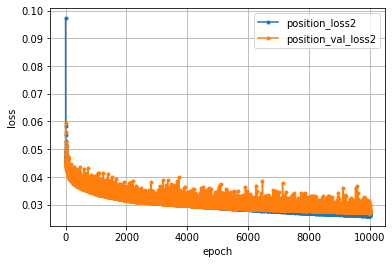

In [29]:
# 学習経過の可視化(大きさ)
position_loss2     = position_history2.history['loss']
position_val_loss2 = position_history2.history['val_loss']

nb_epoch2 = len(position_loss2)
plt.plot(range(nb_epoch2), position_loss2,     marker='.', label='position_loss2')
plt.plot(range(nb_epoch2), position_val_loss2, marker='.', label='position_val_loss2')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [30]:
print(position_y_test[0:3])
position_predict2 = position_model2.predict(position_x_test)
print(position_predict2[0:3])

[[0.43 0.49]
 [0.14 0.22]
 [0.48 0.7 ]]
[[0.46933287 0.62916183]
 [0.14021985 0.55939484]
 [0.46275967 0.61023116]]


In [35]:
position_predict2 = position_model2.predict(position_x_test)
position_ok = 0
for i in range(len(position_predict2)):
    if ((position_predict2[i][0]-position_y_test[i][0])**2+(position_predict2[i][1]-position_y_test[i][1])**2) < 0.25**2:
        position_ok = position_ok + 1
print(position_ok/len(position_predict2))

0.7113961519486927


In [20]:
## CNN(位置)

### modelの作成
position_model3 = Sequential()
### 畳み込み層
position_model3.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
position_model3.add(MaxPooling1D(2, padding='same'))
### 畳み込み層
position_model3.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
position_model3.add(MaxPooling1D(2, padding='same'))
### 畳み込み層
position_model3.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
position_model3.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model3.add(Flatten())
### 全結合層
position_model3.add(Dense(2, activation='linear'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model3.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

In [6]:
# 学習(位置)
epochs = 10000
batch_size = 128
position_history3 = position_model3.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Epoch 1/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0760 - accuracy: 0.6078 - val_loss: 0.0583 - val_accuracy: 0.6078
Epoch 2/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0548 - accuracy: 0.6781 - val_loss: 0.0537 - val_accuracy: 0.6310
Epoch 3/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0513 - accuracy: 0.6867 - val_loss: 0.0501 - val_accuracy: 0.6719
Epoch 4/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0486 - accuracy: 0.7165 - val_loss: 0.0515 - val_accuracy: 0.6315
Epoch 5/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0477 - accuracy: 0.7072 - val_loss: 0.0503 - val_accuracy: 0.5841
Epoch 6/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0462 - accuracy: 0.7215 - val_loss: 0.0458 - val_accuracy: 0.7010
Epoch 7/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0446 - accuracy: 0.7602 - val_loss: 0.0455 - val_accuracy:

64/64 [==============================] - 1s 10ms/step - loss: 0.0219 - accuracy: 0.8585 - val_loss: 0.0239 - val_accuracy: 0.7760
Epoch 114/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0223 - accuracy: 0.8622 - val_loss: 0.0211 - val_accuracy: 0.8372
Epoch 115/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0224 - accuracy: 0.8510 - val_loss: 0.0218 - val_accuracy: 0.8653
Epoch 116/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0210 - accuracy: 0.8727 - val_loss: 0.0212 - val_accuracy: 0.8870
Epoch 117/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0217 - accuracy: 0.8661 - val_loss: 0.0226 - val_accuracy: 0.8342
Epoch 118/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0214 - accuracy: 0.8620 - val_loss: 0.0206 - val_accuracy: 0.8683
Epoch 119/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0216 - accuracy: 0.8657 - val_loss: 0.0220 - val_accuracy: 0

64/64 [==============================] - 1s 8ms/step - loss: 0.0143 - accuracy: 0.8938 - val_loss: 0.0147 - val_accuracy: 0.8535
Epoch 226/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0151 - accuracy: 0.8860 - val_loss: 0.0144 - val_accuracy: 0.9082
Epoch 227/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0150 - accuracy: 0.8874 - val_loss: 0.0143 - val_accuracy: 0.8974
Epoch 228/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0144 - accuracy: 0.8964 - val_loss: 0.0138 - val_accuracy: 0.8969
Epoch 229/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0138 - accuracy: 0.9005 - val_loss: 0.0151 - val_accuracy: 0.9028
Epoch 230/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0138 - accuracy: 0.8976 - val_loss: 0.0148 - val_accuracy: 0.8865
Epoch 231/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0144 - accuracy: 0.8921 - val_loss: 0.0179 - val_accuracy: 0.8772
E

64/64 [==============================] - 1s 10ms/step - loss: 0.0120 - accuracy: 0.9038 - val_loss: 0.0115 - val_accuracy: 0.9082
Epoch 338/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0124 - accuracy: 0.9047 - val_loss: 0.0121 - val_accuracy: 0.9107
Epoch 339/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0111 - accuracy: 0.9082 - val_loss: 0.0118 - val_accuracy: 0.9033
Epoch 340/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0106 - accuracy: 0.9139 - val_loss: 0.0110 - val_accuracy: 0.9013
Epoch 341/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0121 - accuracy: 0.8929 - val_loss: 0.0121 - val_accuracy: 0.8777
Epoch 342/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0117 - accuracy: 0.8994 - val_loss: 0.0125 - val_accuracy: 0.9033
Epoch 343/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0113 - accuracy: 0.9106 - val_loss: 0.0113 - val_accuracy: 0.90

64/64 [==============================] - 1s 11ms/step - loss: 0.0104 - accuracy: 0.9064 - val_loss: 0.0107 - val_accuracy: 0.9038
Epoch 450/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0103 - accuracy: 0.9058 - val_loss: 0.0121 - val_accuracy: 0.9112
Epoch 451/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0100 - accuracy: 0.9068 - val_loss: 0.0102 - val_accuracy: 0.9221
Epoch 452/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0096 - accuracy: 0.9139 - val_loss: 0.0110 - val_accuracy: 0.9038
Epoch 453/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0095 - accuracy: 0.9135 - val_loss: 0.0095 - val_accuracy: 0.9216
Epoch 454/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0098 - accuracy: 0.9138 - val_loss: 0.0101 - val_accuracy: 0.9087
Epoch 455/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0101 - accuracy: 0.9107 - val_loss: 0.0092 - val_accuracy: 0

64/64 [==============================] - 1s 10ms/step - loss: 0.0086 - accuracy: 0.9174 - val_loss: 0.0107 - val_accuracy: 0.9107
Epoch 562/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0095 - accuracy: 0.9139 - val_loss: 0.0138 - val_accuracy: 0.8145
Epoch 563/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0098 - accuracy: 0.9076 - val_loss: 0.0097 - val_accuracy: 0.8900
Epoch 564/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0092 - accuracy: 0.9159 - val_loss: 0.0132 - val_accuracy: 0.9147
Epoch 565/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0091 - accuracy: 0.9170 - val_loss: 0.0108 - val_accuracy: 0.9201
Epoch 566/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0096 - accuracy: 0.9110 - val_loss: 0.0100 - val_accuracy: 0.9216
Epoch 567/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0090 - accuracy: 0.9179 - val_loss: 0.0134 - val_accuracy: 0.9018

64/64 [==============================] - 1s 9ms/step - loss: 0.0083 - accuracy: 0.9224 - val_loss: 0.0088 - val_accuracy: 0.9290
Epoch 674/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0081 - accuracy: 0.9201 - val_loss: 0.0126 - val_accuracy: 0.8337
Epoch 675/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0090 - accuracy: 0.9179 - val_loss: 0.0100 - val_accuracy: 0.9319
Epoch 676/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0084 - accuracy: 0.9163 - val_loss: 0.0090 - val_accuracy: 0.9314
Epoch 677/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0095 - accuracy: 0.9135 - val_loss: 0.0088 - val_accuracy: 0.9324
Epoch 678/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0095 - accuracy: 0.9033 - val_loss: 0.0124 - val_accuracy: 0.9132
Epoch 679/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0090 - accuracy: 0.9193 - val_loss: 0.0095 - val_accuracy: 0.899

64/64 [==============================] - 1s 10ms/step - loss: 0.0078 - accuracy: 0.9179 - val_loss: 0.0097 - val_accuracy: 0.9290
Epoch 786/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0077 - accuracy: 0.9225 - val_loss: 0.0078 - val_accuracy: 0.9161
Epoch 787/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0081 - accuracy: 0.9207 - val_loss: 0.0117 - val_accuracy: 0.9206
Epoch 788/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0093 - accuracy: 0.9070 - val_loss: 0.0094 - val_accuracy: 0.9260
Epoch 789/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0080 - accuracy: 0.9197 - val_loss: 0.0103 - val_accuracy: 0.9107
Epoch 790/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0076 - accuracy: 0.9228 - val_loss: 0.0102 - val_accuracy: 0.9008
Epoch 791/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0077 - accuracy: 0.9211 - val_loss: 0.0089 - val_accuracy: 0.911

64/64 [==============================] - 1s 12ms/step - loss: 0.0072 - accuracy: 0.9296 - val_loss: 0.0098 - val_accuracy: 0.9166
Epoch 898/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0075 - accuracy: 0.9204 - val_loss: 0.0080 - val_accuracy: 0.9216
Epoch 899/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0071 - accuracy: 0.9249 - val_loss: 0.0095 - val_accuracy: 0.8722
Epoch 900/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0077 - accuracy: 0.9191 - val_loss: 0.0089 - val_accuracy: 0.8915
Epoch 901/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0083 - accuracy: 0.9172 - val_loss: 0.0095 - val_accuracy: 0.9171
Epoch 902/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0074 - accuracy: 0.9259 - val_loss: 0.0104 - val_accuracy: 0.9023
Epoch 903/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0074 - accuracy: 0.9245 - val_loss: 0.0097 - val_accuracy: 0.9255

64/64 [==============================] - 1s 9ms/step - loss: 0.0082 - accuracy: 0.9208 - val_loss: 0.0081 - val_accuracy: 0.9250
Epoch 1010/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0066 - accuracy: 0.9264 - val_loss: 0.0081 - val_accuracy: 0.9354
Epoch 1011/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0071 - accuracy: 0.9222 - val_loss: 0.0098 - val_accuracy: 0.8989
Epoch 1012/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0072 - accuracy: 0.9254 - val_loss: 0.0092 - val_accuracy: 0.9156
Epoch 1013/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0069 - accuracy: 0.9259 - val_loss: 0.0078 - val_accuracy: 0.9285
Epoch 1014/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0071 - accuracy: 0.9207 - val_loss: 0.0083 - val_accuracy: 0.9290
Epoch 1015/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0072 - accuracy: 0.9230 - val_loss: 0.0166 - val_accuracy:

64/64 [==============================] - 1s 9ms/step - loss: 0.0070 - accuracy: 0.9281 - val_loss: 0.0081 - val_accuracy: 0.9216
Epoch 1066/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0064 - accuracy: 0.9313 - val_loss: 0.0077 - val_accuracy: 0.9275
Epoch 1067/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0069 - accuracy: 0.9286 - val_loss: 0.0087 - val_accuracy: 0.9191
Epoch 1068/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0068 - accuracy: 0.9295 - val_loss: 0.0090 - val_accuracy: 0.8910
Epoch 1069/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0075 - accuracy: 0.9228 - val_loss: 0.0089 - val_accuracy: 0.8875
Epoch 1070/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0074 - accuracy: 0.9206 - val_loss: 0.0128 - val_accuracy: 0.9063
Epoch 1071/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0089 - accuracy: 0.9095 - val_loss: 0.0080 - val_accuracy

64/64 [==============================] - 1s 10ms/step - loss: 0.0073 - accuracy: 0.9260 - val_loss: 0.0102 - val_accuracy: 0.9280
Epoch 1122/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0067 - accuracy: 0.9248 - val_loss: 0.0076 - val_accuracy: 0.9235
Epoch 1123/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0066 - accuracy: 0.9277 - val_loss: 0.0085 - val_accuracy: 0.8757
Epoch 1124/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0073 - accuracy: 0.9180 - val_loss: 0.0100 - val_accuracy: 0.9235
Epoch 1125/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0069 - accuracy: 0.9261 - val_loss: 0.0096 - val_accuracy: 0.9378
Epoch 1126/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0068 - accuracy: 0.9277 - val_loss: 0.0085 - val_accuracy: 0.8944
Epoch 1127/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0065 - accuracy: 0.9271 - val_loss: 0.0074 - val_accuracy

64/64 [==============================] - 1s 9ms/step - loss: 0.0065 - accuracy: 0.9261 - val_loss: 0.0094 - val_accuracy: 0.8481
Epoch 1178/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0071 - accuracy: 0.9203 - val_loss: 0.0070 - val_accuracy: 0.9339
Epoch 1179/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0068 - accuracy: 0.9251 - val_loss: 0.0076 - val_accuracy: 0.9344
Epoch 1180/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0067 - accuracy: 0.9241 - val_loss: 0.0081 - val_accuracy: 0.9127
Epoch 1181/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0066 - accuracy: 0.9255 - val_loss: 0.0075 - val_accuracy: 0.9290
Epoch 1182/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0066 - accuracy: 0.9235 - val_loss: 0.0075 - val_accuracy: 0.9299
Epoch 1183/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0074 - accuracy: 0.9277 - val_loss: 0.0094 - val_accuracy: 0

64/64 [==============================] - 1s 9ms/step - loss: 0.0066 - accuracy: 0.9317 - val_loss: 0.0082 - val_accuracy: 0.9225
Epoch 1288/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0075 - accuracy: 0.9204 - val_loss: 0.0070 - val_accuracy: 0.9186
Epoch 1289/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0065 - accuracy: 0.9286 - val_loss: 0.0079 - val_accuracy: 0.9329
Epoch 1290/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0071 - accuracy: 0.9240 - val_loss: 0.0095 - val_accuracy: 0.8624
Epoch 1291/10000
64/64 [==============================] - 1s 16ms/step - loss: 0.0066 - accuracy: 0.9275 - val_loss: 0.0073 - val_accuracy: 0.9275
Epoch 1292/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0064 - accuracy: 0.9278 - val_loss: 0.0078 - val_accuracy: 0.9171
Epoch 1293/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0066 - accuracy: 0.9238 - val_loss: 0.0075 - val_accuracy: 

64/64 [==============================] - 1s 9ms/step - loss: 0.0066 - accuracy: 0.9251 - val_loss: 0.0074 - val_accuracy: 0.9280
Epoch 1344/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0058 - accuracy: 0.9319 - val_loss: 0.0081 - val_accuracy: 0.9225
Epoch 1345/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0062 - accuracy: 0.9315 - val_loss: 0.0075 - val_accuracy: 0.9403
Epoch 1346/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0061 - accuracy: 0.9303 - val_loss: 0.0077 - val_accuracy: 0.9383
Epoch 1347/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0063 - accuracy: 0.9336 - val_loss: 0.0092 - val_accuracy: 0.9309
Epoch 1348/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0065 - accuracy: 0.9295 - val_loss: 0.0071 - val_accuracy: 0.9171
Epoch 1349/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0064 - accuracy: 0.9297 - val_loss: 0.0081 - val_accuracy

Epoch 1399/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0061 - accuracy: 0.9307 - val_loss: 0.0070 - val_accuracy: 0.9388
Epoch 1400/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0062 - accuracy: 0.9233 - val_loss: 0.0078 - val_accuracy: 0.9299
Epoch 1401/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0062 - accuracy: 0.9275 - val_loss: 0.0071 - val_accuracy: 0.9314
Epoch 1402/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0062 - accuracy: 0.9299 - val_loss: 0.0076 - val_accuracy: 0.9295
Epoch 1403/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0068 - accuracy: 0.9266 - val_loss: 0.0084 - val_accuracy: 0.9280
Epoch 1404/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0070 - accuracy: 0.9228 - val_loss: 0.0105 - val_accuracy: 0.9107
Epoch 1405/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0065 - accuracy: 0.9299 - val_loss: 0

Epoch 1455/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0061 - accuracy: 0.9317 - val_loss: 0.0090 - val_accuracy: 0.9299
Epoch 1456/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0058 - accuracy: 0.9330 - val_loss: 0.0081 - val_accuracy: 0.9304
Epoch 1457/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0058 - accuracy: 0.9280 - val_loss: 0.0085 - val_accuracy: 0.9265
Epoch 1458/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0063 - accuracy: 0.9248 - val_loss: 0.0102 - val_accuracy: 0.9196
Epoch 1459/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0066 - accuracy: 0.9271 - val_loss: 0.0092 - val_accuracy: 0.8949
Epoch 1460/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0061 - accuracy: 0.9267 - val_loss: 0.0088 - val_accuracy: 0.9290
Epoch 1461/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0077 - accuracy: 0.9180 - val_loss: 0

Epoch 1511/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0062 - accuracy: 0.9260 - val_loss: 0.0091 - val_accuracy: 0.9280
Epoch 1512/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0065 - accuracy: 0.9288 - val_loss: 0.0080 - val_accuracy: 0.9225
Epoch 1513/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0059 - accuracy: 0.9297 - val_loss: 0.0073 - val_accuracy: 0.9369
Epoch 1514/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0056 - accuracy: 0.9329 - val_loss: 0.0091 - val_accuracy: 0.9304
Epoch 1515/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0060 - accuracy: 0.9277 - val_loss: 0.0073 - val_accuracy: 0.9097
Epoch 1516/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0062 - accuracy: 0.9288 - val_loss: 0.0070 - val_accuracy: 0.9309
Epoch 1517/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0054 - accuracy: 0.9355 - val_loss: 0.0082 

Epoch 1567/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0061 - accuracy: 0.9336 - val_loss: 0.0099 - val_accuracy: 0.9048
Epoch 1568/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0061 - accuracy: 0.9325 - val_loss: 0.0089 - val_accuracy: 0.8831
Epoch 1569/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0057 - accuracy: 0.9328 - val_loss: 0.0072 - val_accuracy: 0.9359
Epoch 1570/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0064 - accuracy: 0.9261 - val_loss: 0.0089 - val_accuracy: 0.8821
Epoch 1571/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0079 - accuracy: 0.9139 - val_loss: 0.0097 - val_accuracy: 0.9087
Epoch 1572/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0067 - accuracy: 0.9311 - val_loss: 0.0088 - val_accuracy: 0.9250
Epoch 1573/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0062 - accuracy: 0.9299 - val_loss: 0.0

Epoch 1623/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0062 - accuracy: 0.9303 - val_loss: 0.0099 - val_accuracy: 0.8594
Epoch 1624/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0061 - accuracy: 0.9234 - val_loss: 0.0085 - val_accuracy: 0.9206
Epoch 1625/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0063 - accuracy: 0.9265 - val_loss: 0.0084 - val_accuracy: 0.9250
Epoch 1626/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0059 - accuracy: 0.9309 - val_loss: 0.0081 - val_accuracy: 0.9359
Epoch 1627/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0055 - accuracy: 0.9332 - val_loss: 0.0069 - val_accuracy: 0.9447
Epoch 1628/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0069 - accuracy: 0.9253 - val_loss: 0.0080 - val_accuracy: 0.9413
Epoch 1629/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0056 - accuracy: 0.9360 - val_loss: 0

Epoch 1679/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0063 - accuracy: 0.9281 - val_loss: 0.0078 - val_accuracy: 0.8959
Epoch 1680/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0056 - accuracy: 0.9336 - val_loss: 0.0077 - val_accuracy: 0.9275
Epoch 1681/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0053 - accuracy: 0.9350 - val_loss: 0.0072 - val_accuracy: 0.9275
Epoch 1682/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0059 - accuracy: 0.9314 - val_loss: 0.0089 - val_accuracy: 0.9166
Epoch 1683/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0057 - accuracy: 0.9278 - val_loss: 0.0070 - val_accuracy: 0.9418
Epoch 1684/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0060 - accuracy: 0.9251 - val_loss: 0.0074 - val_accuracy: 0.9299
Epoch 1685/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0062 - accuracy: 0.9271 - val_loss: 0.006

64/64 [==============================] - 1s 9ms/step - loss: 0.0057 - accuracy: 0.9312 - val_loss: 0.0090 - val_accuracy: 0.9181
Epoch 1791/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0059 - accuracy: 0.9282 - val_loss: 0.0085 - val_accuracy: 0.9196
Epoch 1792/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0060 - accuracy: 0.9277 - val_loss: 0.0076 - val_accuracy: 0.9304
Epoch 1793/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0060 - accuracy: 0.9254 - val_loss: 0.0075 - val_accuracy: 0.9324
Epoch 1794/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0056 - accuracy: 0.9318 - val_loss: 0.0070 - val_accuracy: 0.9339
Epoch 1795/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0061 - accuracy: 0.9285 - val_loss: 0.0069 - val_accuracy: 0.9433
Epoch 1796/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0056 - accuracy: 0.9277 - val_loss: 0.0068 - val_accurac

Epoch 1846/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0055 - accuracy: 0.9274 - val_loss: 0.0095 - val_accuracy: 0.9176
Epoch 1847/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0063 - accuracy: 0.9290 - val_loss: 0.0083 - val_accuracy: 0.9013
Epoch 1848/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0065 - accuracy: 0.9278 - val_loss: 0.0086 - val_accuracy: 0.8737
Epoch 1849/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0062 - accuracy: 0.9208 - val_loss: 0.0093 - val_accuracy: 0.9181
Epoch 1850/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0056 - accuracy: 0.9338 - val_loss: 0.0079 - val_accuracy: 0.9304
Epoch 1851/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0055 - accuracy: 0.9307 - val_loss: 0.0069 - val_accuracy: 0.9388
Epoch 1852/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0051 - accuracy: 0.9345 - val_loss: 0.006

Epoch 1902/10000
64/64 [==============================] - 1s 15ms/step - loss: 0.0057 - accuracy: 0.9332 - val_loss: 0.0104 - val_accuracy: 0.9324
Epoch 1903/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0055 - accuracy: 0.9335 - val_loss: 0.0090 - val_accuracy: 0.9023
Epoch 1904/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0053 - accuracy: 0.9348 - val_loss: 0.0076 - val_accuracy: 0.8984
Epoch 1905/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0054 - accuracy: 0.9329 - val_loss: 0.0073 - val_accuracy: 0.9137
Epoch 1906/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0053 - accuracy: 0.9278 - val_loss: 0.0081 - val_accuracy: 0.9147
Epoch 1907/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0062 - accuracy: 0.9258 - val_loss: 0.0087 - val_accuracy: 0.9255
Epoch 1908/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0057 - accuracy: 0.9270 - val_loss: 0.

Epoch 1958/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0065 - accuracy: 0.9281 - val_loss: 0.0072 - val_accuracy: 0.9398
Epoch 1959/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0059 - accuracy: 0.9333 - val_loss: 0.0104 - val_accuracy: 0.8895
Epoch 1960/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0070 - accuracy: 0.9267 - val_loss: 0.0095 - val_accuracy: 0.8905
Epoch 1961/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0051 - accuracy: 0.9361 - val_loss: 0.0072 - val_accuracy: 0.9225
Epoch 1962/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0049 - accuracy: 0.9377 - val_loss: 0.0071 - val_accuracy: 0.9245
Epoch 1963/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0051 - accuracy: 0.9293 - val_loss: 0.0074 - val_accuracy: 0.9354
Epoch 1964/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0057 - accuracy: 0.9248 - val_loss: 0.0094

Epoch 2014/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0058 - accuracy: 0.9260 - val_loss: 0.0074 - val_accuracy: 0.9452
Epoch 2015/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0052 - accuracy: 0.9351 - val_loss: 0.0080 - val_accuracy: 0.9408
Epoch 2016/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0050 - accuracy: 0.9364 - val_loss: 0.0081 - val_accuracy: 0.8944
Epoch 2017/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0056 - accuracy: 0.9329 - val_loss: 0.0081 - val_accuracy: 0.9290
Epoch 2018/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0051 - accuracy: 0.9344 - val_loss: 0.0076 - val_accuracy: 0.9023
Epoch 2019/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0056 - accuracy: 0.9290 - val_loss: 0.0072 - val_accuracy: 0.9378
Epoch 2020/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0060 - accuracy: 0.9283 - val_loss: 0.0

Epoch 2070/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0052 - accuracy: 0.9367 - val_loss: 0.0071 - val_accuracy: 0.9240
Epoch 2071/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0055 - accuracy: 0.9360 - val_loss: 0.0070 - val_accuracy: 0.9245
Epoch 2072/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0054 - accuracy: 0.9295 - val_loss: 0.0099 - val_accuracy: 0.9013
Epoch 2073/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0061 - accuracy: 0.9212 - val_loss: 0.0086 - val_accuracy: 0.8900
Epoch 2074/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0061 - accuracy: 0.9319 - val_loss: 0.0114 - val_accuracy: 0.8944
Epoch 2075/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0060 - accuracy: 0.9262 - val_loss: 0.0069 - val_accuracy: 0.9364
Epoch 2076/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0057 - accuracy: 0.9287 - val_loss: 0.00

Epoch 2126/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0051 - accuracy: 0.9355 - val_loss: 0.0081 - val_accuracy: 0.9003
Epoch 2127/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0059 - accuracy: 0.9285 - val_loss: 0.0097 - val_accuracy: 0.9270
Epoch 2128/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0059 - accuracy: 0.9256 - val_loss: 0.0081 - val_accuracy: 0.9211
Epoch 2129/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.9293 - val_loss: 0.0085 - val_accuracy: 0.9082
Epoch 2130/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0055 - accuracy: 0.9356 - val_loss: 0.0072 - val_accuracy: 0.9285
Epoch 2131/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.9304 - val_loss: 0.0085 - val_accuracy: 0.9221
Epoch 2132/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0053 - accuracy: 0.9285 - val_loss: 0.

Epoch 2182/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0060 - accuracy: 0.9251 - val_loss: 0.0081 - val_accuracy: 0.9290
Epoch 2183/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0054 - accuracy: 0.9291 - val_loss: 0.0070 - val_accuracy: 0.9324
Epoch 2184/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0048 - accuracy: 0.9350 - val_loss: 0.0074 - val_accuracy: 0.9369
Epoch 2185/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0062 - accuracy: 0.9276 - val_loss: 0.0089 - val_accuracy: 0.9132
Epoch 2186/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0059 - accuracy: 0.9238 - val_loss: 0.0091 - val_accuracy: 0.9255
Epoch 2187/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0057 - accuracy: 0.9278 - val_loss: 0.0072 - val_accuracy: 0.9388
Epoch 2188/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0050 - accuracy: 0.9362 - val_loss: 0

Epoch 2238/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0052 - accuracy: 0.9276 - val_loss: 0.0063 - val_accuracy: 0.9349
Epoch 2239/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0062 - accuracy: 0.9297 - val_loss: 0.0110 - val_accuracy: 0.9221
Epoch 2240/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0052 - accuracy: 0.9323 - val_loss: 0.0126 - val_accuracy: 0.9112
Epoch 2241/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0055 - accuracy: 0.9307 - val_loss: 0.0114 - val_accuracy: 0.8984
Epoch 2242/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0055 - accuracy: 0.9264 - val_loss: 0.0067 - val_accuracy: 0.9373
Epoch 2243/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0046 - accuracy: 0.9366 - val_loss: 0.0105 - val_accuracy: 0.9023
Epoch 2244/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0055 - accuracy: 0.9180 - val_loss: 0.007

Epoch 2294/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0047 - accuracy: 0.9366 - val_loss: 0.0074 - val_accuracy: 0.9373
Epoch 2295/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0069 - accuracy: 0.9186 - val_loss: 0.0076 - val_accuracy: 0.9112
Epoch 2296/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0057 - accuracy: 0.9255 - val_loss: 0.0065 - val_accuracy: 0.9265
Epoch 2297/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.9286 - val_loss: 0.0084 - val_accuracy: 0.8757
Epoch 2298/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0053 - accuracy: 0.9373 - val_loss: 0.0087 - val_accuracy: 0.9423
Epoch 2299/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.9341 - val_loss: 0.0079 - val_accuracy: 0.9166
Epoch 2300/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0059 - accuracy: 0.9229 - val_loss: 0

Epoch 2405/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0052 - accuracy: 0.9264 - val_loss: 0.0083 - val_accuracy: 0.9201
Epoch 2406/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.9311 - val_loss: 0.0069 - val_accuracy: 0.9324
Epoch 2407/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0049 - accuracy: 0.9404 - val_loss: 0.0078 - val_accuracy: 0.8979
Epoch 2408/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0049 - accuracy: 0.9362 - val_loss: 0.0069 - val_accuracy: 0.9295
Epoch 2409/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0047 - accuracy: 0.9348 - val_loss: 0.0079 - val_accuracy: 0.8678
Epoch 2410/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0049 - accuracy: 0.9323 - val_loss: 0.0068 - val_accuracy: 0.9447
Epoch 2411/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0049 - accuracy: 0.9375 - val_loss: 0.0

Epoch 2461/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0049 - accuracy: 0.9348 - val_loss: 0.0067 - val_accuracy: 0.9393
Epoch 2462/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0048 - accuracy: 0.9343 - val_loss: 0.0088 - val_accuracy: 0.9314
Epoch 2463/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0059 - accuracy: 0.9253 - val_loss: 0.0076 - val_accuracy: 0.9280
Epoch 2464/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.9336 - val_loss: 0.0074 - val_accuracy: 0.8925
Epoch 2465/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0049 - accuracy: 0.9328 - val_loss: 0.0078 - val_accuracy: 0.8999
Epoch 2466/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0052 - accuracy: 0.9283 - val_loss: 0.0073 - val_accuracy: 0.9280
Epoch 2467/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0055 - accuracy: 0.9253 - val_loss: 0.0

Epoch 2517/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0049 - accuracy: 0.9304 - val_loss: 0.0073 - val_accuracy: 0.9176
Epoch 2518/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0055 - accuracy: 0.9312 - val_loss: 0.0102 - val_accuracy: 0.9216
Epoch 2519/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0053 - accuracy: 0.9302 - val_loss: 0.0094 - val_accuracy: 0.9255
Epoch 2520/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0052 - accuracy: 0.9291 - val_loss: 0.0064 - val_accuracy: 0.9383
Epoch 2521/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0048 - accuracy: 0.9345 - val_loss: 0.0088 - val_accuracy: 0.9147
Epoch 2522/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0053 - accuracy: 0.9295 - val_loss: 0.0073 - val_accuracy: 0.9275
Epoch 2523/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9398 - val_loss: 0

Epoch 2573/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0048 - accuracy: 0.9302 - val_loss: 0.0081 - val_accuracy: 0.8969
Epoch 2574/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0055 - accuracy: 0.9239 - val_loss: 0.0073 - val_accuracy: 0.9087
Epoch 2575/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0052 - accuracy: 0.9296 - val_loss: 0.0078 - val_accuracy: 0.8707
Epoch 2576/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0048 - accuracy: 0.9332 - val_loss: 0.0068 - val_accuracy: 0.9319
Epoch 2577/10000
64/64 [==============================] - 1s 15ms/step - loss: 0.0047 - accuracy: 0.9333 - val_loss: 0.0092 - val_accuracy: 0.9107
Epoch 2578/10000
64/64 [==============================] - 1s 16ms/step - loss: 0.0054 - accuracy: 0.9299 - val_loss: 0.0064 - val_accuracy: 0.9359
Epoch 2579/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0052 - accuracy: 0.9322 - val_loss: 0

Epoch 2629/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0047 - accuracy: 0.9330 - val_loss: 0.0066 - val_accuracy: 0.9221
Epoch 2630/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0045 - accuracy: 0.9361 - val_loss: 0.0081 - val_accuracy: 0.9285
Epoch 2631/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0052 - accuracy: 0.9341 - val_loss: 0.0079 - val_accuracy: 0.9127
Epoch 2632/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0046 - accuracy: 0.9335 - val_loss: 0.0080 - val_accuracy: 0.9043
Epoch 2633/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.9381 - val_loss: 0.0076 - val_accuracy: 0.9304
Epoch 2634/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0047 - accuracy: 0.9278 - val_loss: 0.0085 - val_accuracy: 0.9127
Epoch 2635/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0048 - accuracy: 0.9369 - val_loss: 0.0066 -

Epoch 2685/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0052 - accuracy: 0.9308 - val_loss: 0.0083 - val_accuracy: 0.9250
Epoch 2686/10000
64/64 [==============================] - 1s 20ms/step - loss: 0.0051 - accuracy: 0.9297 - val_loss: 0.0080 - val_accuracy: 0.9398
Epoch 2687/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0050 - accuracy: 0.9341 - val_loss: 0.0084 - val_accuracy: 0.9147
Epoch 2688/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0051 - accuracy: 0.9346 - val_loss: 0.0066 - val_accuracy: 0.9378
Epoch 2689/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0044 - accuracy: 0.9354 - val_loss: 0.0064 - val_accuracy: 0.9408
Epoch 2690/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0043 - accuracy: 0.9402 - val_loss: 0.0069 - val_accuracy: 0.9038
Epoch 2691/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0053 - accuracy: 0.9288 - val_loss: 0

Epoch 2741/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0059 - accuracy: 0.9251 - val_loss: 0.0089 - val_accuracy: 0.8658
Epoch 2742/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0055 - accuracy: 0.9282 - val_loss: 0.0071 - val_accuracy: 0.8836
Epoch 2743/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0044 - accuracy: 0.9396 - val_loss: 0.0083 - val_accuracy: 0.9329
Epoch 2744/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0049 - accuracy: 0.9364 - val_loss: 0.0071 - val_accuracy: 0.9225
Epoch 2745/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0047 - accuracy: 0.9361 - val_loss: 0.0069 - val_accuracy: 0.9299
Epoch 2746/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0051 - accuracy: 0.9276 - val_loss: 0.0094 - val_accuracy: 0.8989
Epoch 2747/10000
64/64 [==============================] - 1s 16ms/step - loss: 0.0057 - accuracy: 0.9249 - val_loss: 0

Epoch 2797/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0050 - accuracy: 0.9274 - val_loss: 0.0096 - val_accuracy: 0.8880
Epoch 2798/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0048 - accuracy: 0.9318 - val_loss: 0.0062 - val_accuracy: 0.9344
Epoch 2799/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0047 - accuracy: 0.9361 - val_loss: 0.0073 - val_accuracy: 0.9102
Epoch 2800/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0043 - accuracy: 0.9381 - val_loss: 0.0065 - val_accuracy: 0.9137
Epoch 2801/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0048 - accuracy: 0.9308 - val_loss: 0.0074 - val_accuracy: 0.9092
Epoch 2802/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0048 - accuracy: 0.9380 - val_loss: 0.0075 - val_accuracy: 0.8959
Epoch 2803/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0054 - accuracy: 0.9288 - val_loss: 0

Epoch 2853/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0057 - accuracy: 0.9266 - val_loss: 0.0077 - val_accuracy: 0.9418
Epoch 2854/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0048 - accuracy: 0.9329 - val_loss: 0.0073 - val_accuracy: 0.9255
Epoch 2855/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0056 - accuracy: 0.9272 - val_loss: 0.0079 - val_accuracy: 0.9186
Epoch 2856/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0047 - accuracy: 0.9372 - val_loss: 0.0069 - val_accuracy: 0.9398
Epoch 2857/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0046 - accuracy: 0.9307 - val_loss: 0.0066 - val_accuracy: 0.9260
Epoch 2858/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0048 - accuracy: 0.9323 - val_loss: 0.0079 - val_accuracy: 0.9403
Epoch 2859/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0048 - accuracy: 0.9381 - val_loss: 0

Epoch 2909/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0049 - accuracy: 0.9309 - val_loss: 0.0093 - val_accuracy: 0.8550
Epoch 2910/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0053 - accuracy: 0.9277 - val_loss: 0.0071 - val_accuracy: 0.9221
Epoch 2911/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0046 - accuracy: 0.9372 - val_loss: 0.0082 - val_accuracy: 0.9176
Epoch 2912/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0049 - accuracy: 0.9267 - val_loss: 0.0106 - val_accuracy: 0.8466
Epoch 2913/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0051 - accuracy: 0.9296 - val_loss: 0.0076 - val_accuracy: 0.9211
Epoch 2914/10000
64/64 [==============================] - 1s 15ms/step - loss: 0.0057 - accuracy: 0.9364 - val_loss: 0.0069 - val_accuracy: 0.9176
Epoch 2915/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0044 - accuracy: 0.9375 - val_loss: 0

Epoch 2965/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0051 - accuracy: 0.9296 - val_loss: 0.0083 - val_accuracy: 0.9364
Epoch 2966/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0051 - accuracy: 0.9375 - val_loss: 0.0067 - val_accuracy: 0.9339
Epoch 2967/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0051 - accuracy: 0.9330 - val_loss: 0.0087 - val_accuracy: 0.8786
Epoch 2968/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9393 - val_loss: 0.0069 - val_accuracy: 0.9314
Epoch 2969/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0045 - accuracy: 0.9348 - val_loss: 0.0112 - val_accuracy: 0.9240
Epoch 2970/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0052 - accuracy: 0.9338 - val_loss: 0.0068 - val_accuracy: 0.9329
Epoch 2971/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0049 - accuracy: 0.9272 - val_loss: 0

Epoch 3021/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0046 - accuracy: 0.9350 - val_loss: 0.0065 - val_accuracy: 0.9329
Epoch 3022/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0047 - accuracy: 0.9371 - val_loss: 0.0068 - val_accuracy: 0.9186
Epoch 3023/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0052 - accuracy: 0.9301 - val_loss: 0.0066 - val_accuracy: 0.9462
Epoch 3024/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0048 - accuracy: 0.9308 - val_loss: 0.0096 - val_accuracy: 0.9225
Epoch 3025/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0053 - accuracy: 0.9267 - val_loss: 0.0073 - val_accuracy: 0.9166
Epoch 3026/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0051 - accuracy: 0.9327 - val_loss: 0.0072 - val_accuracy: 0.9383
Epoch 3027/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0044 - accuracy: 0.9366 - val_loss: 0

Epoch 3132/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9381 - val_loss: 0.0079 - val_accuracy: 0.9063
Epoch 3133/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9355 - val_loss: 0.0072 - val_accuracy: 0.9255
Epoch 3134/10000
64/64 [==============================] - 1s 15ms/step - loss: 0.0044 - accuracy: 0.9324 - val_loss: 0.0064 - val_accuracy: 0.9531
Epoch 3135/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0049 - accuracy: 0.9313 - val_loss: 0.0089 - val_accuracy: 0.8727
Epoch 3136/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0044 - accuracy: 0.9362 - val_loss: 0.0067 - val_accuracy: 0.9260
Epoch 3137/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0047 - accuracy: 0.9340 - val_loss: 0.0083 - val_accuracy: 0.9314
Epoch 3138/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 0.9401 - val_loss: 0

Epoch 3188/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0046 - accuracy: 0.9349 - val_loss: 0.0084 - val_accuracy: 0.8870
Epoch 3189/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0046 - accuracy: 0.9315 - val_loss: 0.0070 - val_accuracy: 0.9161
Epoch 3190/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0050 - accuracy: 0.9346 - val_loss: 0.0085 - val_accuracy: 0.9176
Epoch 3191/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0051 - accuracy: 0.9365 - val_loss: 0.0081 - val_accuracy: 0.9452
Epoch 3192/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0047 - accuracy: 0.9299 - val_loss: 0.0072 - val_accuracy: 0.9418
Epoch 3193/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0049 - accuracy: 0.9324 - val_loss: 0.0083 - val_accuracy: 0.9186
Epoch 3194/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0050 - accuracy: 0.9296 - val_loss: 0

Epoch 3299/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0048 - accuracy: 0.9332 - val_loss: 0.0068 - val_accuracy: 0.9413
Epoch 3300/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 0.9367 - val_loss: 0.0101 - val_accuracy: 0.9230
Epoch 3301/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0050 - accuracy: 0.9313 - val_loss: 0.0070 - val_accuracy: 0.9383
Epoch 3302/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9385 - val_loss: 0.0066 - val_accuracy: 0.9334
Epoch 3303/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9349 - val_loss: 0.0062 - val_accuracy: 0.9354
Epoch 3304/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9369 - val_loss: 0.0074 - val_accuracy: 0.8969
Epoch 3305/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9401 - val_loss: 0

Epoch 3355/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0049 - accuracy: 0.9348 - val_loss: 0.0083 - val_accuracy: 0.9280
Epoch 3356/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.9212 - val_loss: 0.0080 - val_accuracy: 0.9309
Epoch 3357/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9387 - val_loss: 0.0074 - val_accuracy: 0.9398
Epoch 3358/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0045 - accuracy: 0.9351 - val_loss: 0.0063 - val_accuracy: 0.9388
Epoch 3359/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.9286 - val_loss: 0.0081 - val_accuracy: 0.9359
Epoch 3360/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9399 - val_loss: 0.0064 - val_accuracy: 0.9482
Epoch 3361/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0041 - accuracy: 0.9399 - val_loss: 0

Epoch 3411/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0044 - accuracy: 0.9366 - val_loss: 0.0075 - val_accuracy: 0.9443
Epoch 3412/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0041 - accuracy: 0.9375 - val_loss: 0.0067 - val_accuracy: 0.9443
Epoch 3413/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9361 - val_loss: 0.0075 - val_accuracy: 0.9181
Epoch 3414/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9367 - val_loss: 0.0087 - val_accuracy: 0.9285
Epoch 3415/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0046 - accuracy: 0.9367 - val_loss: 0.0069 - val_accuracy: 0.9211
Epoch 3416/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9367 - val_loss: 0.0071 - val_accuracy: 0.9418
Epoch 3417/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0054 - accuracy: 0.9293 - val_loss: 0

Epoch 3467/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9393 - val_loss: 0.0073 - val_accuracy: 0.9329
Epoch 3468/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0041 - accuracy: 0.9369 - val_loss: 0.0060 - val_accuracy: 0.9304
Epoch 3469/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0048 - accuracy: 0.9290 - val_loss: 0.0066 - val_accuracy: 0.9378
Epoch 3470/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0046 - accuracy: 0.9383 - val_loss: 0.0072 - val_accuracy: 0.9403
Epoch 3471/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9283 - val_loss: 0.0073 - val_accuracy: 0.9196
Epoch 3472/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9329 - val_loss: 0.0074 - val_accuracy: 0.9344
Epoch 3473/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0047 - accuracy: 0.9267 - val_loss: 0

Epoch 3523/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0051 - accuracy: 0.9292 - val_loss: 0.0087 - val_accuracy: 0.9299
Epoch 3524/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0045 - accuracy: 0.9372 - val_loss: 0.0091 - val_accuracy: 0.8934
Epoch 3525/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0043 - accuracy: 0.9413 - val_loss: 0.0063 - val_accuracy: 0.9423
Epoch 3526/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0044 - accuracy: 0.9367 - val_loss: 0.0068 - val_accuracy: 0.9378
Epoch 3527/10000
64/64 [==============================] - 1s 16ms/step - loss: 0.0041 - accuracy: 0.9356 - val_loss: 0.0065 - val_accuracy: 0.9418
Epoch 3528/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0043 - accuracy: 0.9381 - val_loss: 0.0064 - val_accuracy: 0.9260
Epoch 3529/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 0.9367 - val_loss: 0

Epoch 3579/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9402 - val_loss: 0.0066 - val_accuracy: 0.9329
Epoch 3580/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9404 - val_loss: 0.0085 - val_accuracy: 0.9073
Epoch 3581/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9367 - val_loss: 0.0074 - val_accuracy: 0.9033
Epoch 3582/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0058 - accuracy: 0.9195 - val_loss: 0.0114 - val_accuracy: 0.9388
Epoch 3583/10000
64/64 [==============================] - 1s 15ms/step - loss: 0.0048 - accuracy: 0.9323 - val_loss: 0.0074 - val_accuracy: 0.9502
Epoch 3584/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0049 - accuracy: 0.9377 - val_loss: 0.0065 - val_accuracy: 0.9423
Epoch 3585/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9354 - val_loss: 0

64/64 [==============================] - 1s 10ms/step - loss: 0.0047 - accuracy: 0.9317 - val_loss: 0.0075 - val_accuracy: 0.9349
Epoch 3690/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9335 - val_loss: 0.0071 - val_accuracy: 0.9423
Epoch 3691/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0045 - accuracy: 0.9345 - val_loss: 0.0079 - val_accuracy: 0.9339
Epoch 3692/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9330 - val_loss: 0.0066 - val_accuracy: 0.9388
Epoch 3693/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9371 - val_loss: 0.0082 - val_accuracy: 0.9265
Epoch 3694/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0049 - accuracy: 0.9367 - val_loss: 0.0065 - val_accuracy: 0.9299
Epoch 3695/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9383 - val_loss: 0.0063 - val_accur

Epoch 3745/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9375 - val_loss: 0.0077 - val_accuracy: 0.9122
Epoch 3746/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9385 - val_loss: 0.0076 - val_accuracy: 0.9408
Epoch 3747/10000
64/64 [==============================] - 1s 16ms/step - loss: 0.0043 - accuracy: 0.9393 - val_loss: 0.0080 - val_accuracy: 0.9117
Epoch 3748/10000
64/64 [==============================] - 1s 17ms/step - loss: 0.0042 - accuracy: 0.9385 - val_loss: 0.0074 - val_accuracy: 0.9225
Epoch 3749/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0041 - accuracy: 0.9332 - val_loss: 0.0063 - val_accuracy: 0.9378
Epoch 3750/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0045 - accuracy: 0.9370 - val_loss: 0.0069 - val_accuracy: 0.9107
Epoch 3751/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9307 - val_loss: 0

Epoch 3801/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0038 - accuracy: 0.9447 - val_loss: 0.0068 - val_accuracy: 0.9275
Epoch 3802/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9406 - val_loss: 0.0070 - val_accuracy: 0.9063
Epoch 3803/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9377 - val_loss: 0.0076 - val_accuracy: 0.9142
Epoch 3804/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9354 - val_loss: 0.0086 - val_accuracy: 0.8791
Epoch 3805/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0046 - accuracy: 0.9298 - val_loss: 0.0071 - val_accuracy: 0.9295
Epoch 3806/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9362 - val_loss: 0.0064 - val_accuracy: 0.9349
Epoch 3807/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0044 - accuracy: 0.9378 - val_loss: 0

Epoch 3912/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9385 - val_loss: 0.0071 - val_accuracy: 0.9457
Epoch 3913/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9414 - val_loss: 0.0066 - val_accuracy: 0.9423
Epoch 3914/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9381 - val_loss: 0.0072 - val_accuracy: 0.9225
Epoch 3915/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9298 - val_loss: 0.0067 - val_accuracy: 0.9265
Epoch 3916/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9334 - val_loss: 0.0068 - val_accuracy: 0.9408
Epoch 3917/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0057 - accuracy: 0.9267 - val_loss: 0.0134 - val_accuracy: 0.8860
Epoch 3918/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.9313 - val_loss: 0

Epoch 3968/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0040 - accuracy: 0.9430 - val_loss: 0.0077 - val_accuracy: 0.9329
Epoch 3969/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0046 - accuracy: 0.9357 - val_loss: 0.0080 - val_accuracy: 0.9359
Epoch 3970/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0039 - accuracy: 0.9381 - val_loss: 0.0074 - val_accuracy: 0.9319
Epoch 3971/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0047 - accuracy: 0.9265 - val_loss: 0.0073 - val_accuracy: 0.9008
Epoch 3972/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0050 - accuracy: 0.9278 - val_loss: 0.0079 - val_accuracy: 0.9428
Epoch 3973/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0047 - accuracy: 0.9307 - val_loss: 0.0067 - val_accuracy: 0.9378
Epoch 3974/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9301 - val_loss: 0

Epoch 4024/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9429 - val_loss: 0.0073 - val_accuracy: 0.9280
Epoch 4025/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.9276 - val_loss: 0.0070 - val_accuracy: 0.9452
Epoch 4026/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0046 - accuracy: 0.9323 - val_loss: 0.0085 - val_accuracy: 0.9472
Epoch 4027/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0048 - accuracy: 0.9350 - val_loss: 0.0068 - val_accuracy: 0.9339
Epoch 4028/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0041 - accuracy: 0.9387 - val_loss: 0.0067 - val_accuracy: 0.9497
Epoch 4029/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9333 - val_loss: 0.0065 - val_accuracy: 0.9373
Epoch 4030/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0038 - accuracy: 0.9410 - val_loss: 0

Epoch 4080/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0043 - accuracy: 0.9376 - val_loss: 0.0074 - val_accuracy: 0.9280
Epoch 4081/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0039 - accuracy: 0.9386 - val_loss: 0.0066 - val_accuracy: 0.9467
Epoch 4082/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9372 - val_loss: 0.0088 - val_accuracy: 0.9295
Epoch 4083/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0051 - accuracy: 0.9355 - val_loss: 0.0073 - val_accuracy: 0.9280
Epoch 4084/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9371 - val_loss: 0.0076 - val_accuracy: 0.9097
Epoch 4085/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9433 - val_loss: 0.0067 - val_accuracy: 0.9299
Epoch 4086/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9431 - val_loss: 0

Epoch 4136/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9366 - val_loss: 0.0067 - val_accuracy: 0.9433
Epoch 4137/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9328 - val_loss: 0.0091 - val_accuracy: 0.9270
Epoch 4138/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9313 - val_loss: 0.0072 - val_accuracy: 0.9230
Epoch 4139/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9313 - val_loss: 0.0079 - val_accuracy: 0.9073
Epoch 4140/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0053 - accuracy: 0.9307 - val_loss: 0.0098 - val_accuracy: 0.9280
Epoch 4141/10000
64/64 [==============================] - 1s 15ms/step - loss: 0.0043 - accuracy: 0.9355 - val_loss: 0.0064 - val_accuracy: 0.9201
Epoch 4142/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0034 - accuracy: 0.9440 - val_loss: 0

Epoch 4247/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9406 - val_loss: 0.0065 - val_accuracy: 0.9467
Epoch 4248/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9407 - val_loss: 0.0068 - val_accuracy: 0.9423
Epoch 4249/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0049 - accuracy: 0.9269 - val_loss: 0.0079 - val_accuracy: 0.9457
Epoch 4250/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9376 - val_loss: 0.0072 - val_accuracy: 0.9364
Epoch 4251/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9351 - val_loss: 0.0065 - val_accuracy: 0.9230
Epoch 4252/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9382 - val_loss: 0.0083 - val_accuracy: 0.9176
Epoch 4253/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9391 - val_loss: 0

Epoch 4358/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9392 - val_loss: 0.0068 - val_accuracy: 0.9423
Epoch 4359/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9403 - val_loss: 0.0080 - val_accuracy: 0.9507
Epoch 4360/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9355 - val_loss: 0.0066 - val_accuracy: 0.9290
Epoch 4361/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0041 - accuracy: 0.9372 - val_loss: 0.0069 - val_accuracy: 0.9137
Epoch 4362/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0045 - accuracy: 0.9296 - val_loss: 0.0085 - val_accuracy: 0.8693
Epoch 4363/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9303 - val_loss: 0.0066 - val_accuracy: 0.9507
Epoch 4364/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9373 - val_loss: 0

Epoch 4414/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9332 - val_loss: 0.0068 - val_accuracy: 0.9393
Epoch 4415/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9375 - val_loss: 0.0063 - val_accuracy: 0.9373
Epoch 4416/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9388 - val_loss: 0.0071 - val_accuracy: 0.9225
Epoch 4417/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9354 - val_loss: 0.0078 - val_accuracy: 0.9176
Epoch 4418/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9334 - val_loss: 0.0069 - val_accuracy: 0.9413
Epoch 4419/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9329 - val_loss: 0.0066 - val_accuracy: 0.9127
Epoch 4420/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9404 - val_loss: 0

Epoch 4470/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9345 - val_loss: 0.0089 - val_accuracy: 0.9373
Epoch 4471/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9376 - val_loss: 0.0075 - val_accuracy: 0.9512
Epoch 4472/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9345 - val_loss: 0.0062 - val_accuracy: 0.9388
Epoch 4473/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9360 - val_loss: 0.0071 - val_accuracy: 0.9235
Epoch 4474/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9398 - val_loss: 0.0072 - val_accuracy: 0.9373
Epoch 4475/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9376 - val_loss: 0.0095 - val_accuracy: 0.9097
Epoch 4476/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9359 - val_loss: 0

Epoch 4526/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9402 - val_loss: 0.0066 - val_accuracy: 0.9472
Epoch 4527/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9466 - val_loss: 0.0071 - val_accuracy: 0.9023
Epoch 4528/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9366 - val_loss: 0.0081 - val_accuracy: 0.9260
Epoch 4529/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9352 - val_loss: 0.0066 - val_accuracy: 0.9127
Epoch 4530/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0043 - accuracy: 0.9336 - val_loss: 0.0080 - val_accuracy: 0.9048
Epoch 4531/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0038 - accuracy: 0.9373 - val_loss: 0.0069 - val_accuracy: 0.9186
Epoch 4532/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9388 - val_loss: 0

64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9462 - val_loss: 0.0060 - val_accuracy: 0.9329
Epoch 4637/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9401 - val_loss: 0.0092 - val_accuracy: 0.8772
Epoch 4638/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 0.9334 - val_loss: 0.0076 - val_accuracy: 0.9008
Epoch 4639/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0038 - accuracy: 0.9399 - val_loss: 0.0091 - val_accuracy: 0.9423
Epoch 4640/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0039 - accuracy: 0.9401 - val_loss: 0.0092 - val_accuracy: 0.9201
Epoch 4641/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9329 - val_loss: 0.0063 - val_accuracy: 0.9285
Epoch 4642/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9446 - val_loss: 0.0071 - val_accura

Epoch 4692/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0049 - accuracy: 0.9313 - val_loss: 0.0108 - val_accuracy: 0.8959
Epoch 4693/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0047 - accuracy: 0.9349 - val_loss: 0.0079 - val_accuracy: 0.9181
Epoch 4694/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9362 - val_loss: 0.0076 - val_accuracy: 0.9304
Epoch 4695/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9392 - val_loss: 0.0078 - val_accuracy: 0.9201
Epoch 4696/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9443 - val_loss: 0.0072 - val_accuracy: 0.9428
Epoch 4697/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9440 - val_loss: 0.0061 - val_accuracy: 0.9472
Epoch 4698/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9408 - val_loss: 0.

Epoch 4748/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9308 - val_loss: 0.0068 - val_accuracy: 0.9467
Epoch 4749/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9327 - val_loss: 0.0062 - val_accuracy: 0.9472
Epoch 4750/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0043 - accuracy: 0.9332 - val_loss: 0.0063 - val_accuracy: 0.9378
Epoch 4751/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0036 - accuracy: 0.9394 - val_loss: 0.0058 - val_accuracy: 0.9482
Epoch 4752/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9478 - val_loss: 0.0086 - val_accuracy: 0.9280
Epoch 4753/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9377 - val_loss: 0.0064 - val_accuracy: 0.8999
Epoch 4754/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9406 - val_loss: 0.

Epoch 4804/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9418 - val_loss: 0.0081 - val_accuracy: 0.8742
Epoch 4805/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0047 - accuracy: 0.9318 - val_loss: 0.0064 - val_accuracy: 0.9369
Epoch 4806/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9339 - val_loss: 0.0063 - val_accuracy: 0.9117
Epoch 4807/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9422 - val_loss: 0.0079 - val_accuracy: 0.9176
Epoch 4808/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0046 - accuracy: 0.9324 - val_loss: 0.0065 - val_accuracy: 0.9285
Epoch 4809/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9396 - val_loss: 0.0067 - val_accuracy: 0.9038
Epoch 4810/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9418 - val_loss: 0.

Epoch 4860/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9443 - val_loss: 0.0068 - val_accuracy: 0.9304
Epoch 4861/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9359 - val_loss: 0.0063 - val_accuracy: 0.9324
Epoch 4862/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9468 - val_loss: 0.0063 - val_accuracy: 0.9354
Epoch 4863/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 0.9341 - val_loss: 0.0097 - val_accuracy: 0.8342
Epoch 4864/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9420 - val_loss: 0.0058 - val_accuracy: 0.9507
Epoch 4865/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 0.9424 - val_loss: 0.0097 - val_accuracy: 0.9230
Epoch 4866/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9385 - val_loss: 0

Epoch 4916/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9325 - val_loss: 0.0080 - val_accuracy: 0.9171
Epoch 4917/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0040 - accuracy: 0.9359 - val_loss: 0.0067 - val_accuracy: 0.9497
Epoch 4918/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9438 - val_loss: 0.0074 - val_accuracy: 0.9383
Epoch 4919/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9344 - val_loss: 0.0071 - val_accuracy: 0.9383
Epoch 4920/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9335 - val_loss: 0.0059 - val_accuracy: 0.9517
Epoch 4921/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0040 - accuracy: 0.9386 - val_loss: 0.0070 - val_accuracy: 0.9364
Epoch 4922/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0041 - accuracy: 0.9364 - val_loss: 0.0

Epoch 4972/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9412 - val_loss: 0.0073 - val_accuracy: 0.9250
Epoch 4973/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0041 - accuracy: 0.9406 - val_loss: 0.0069 - val_accuracy: 0.9290
Epoch 4974/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9285 - val_loss: 0.0072 - val_accuracy: 0.9250
Epoch 4975/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0041 - accuracy: 0.9387 - val_loss: 0.0068 - val_accuracy: 0.9428
Epoch 4976/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0036 - accuracy: 0.9409 - val_loss: 0.0063 - val_accuracy: 0.9344
Epoch 4977/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0049 - accuracy: 0.9329 - val_loss: 0.0086 - val_accuracy: 0.9087
Epoch 4978/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0041 - accuracy: 0.9351 - val_loss: 0

Epoch 5028/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9380 - val_loss: 0.0061 - val_accuracy: 0.9378
Epoch 5029/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0036 - accuracy: 0.9413 - val_loss: 0.0065 - val_accuracy: 0.9250
Epoch 5030/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0038 - accuracy: 0.9359 - val_loss: 0.0069 - val_accuracy: 0.9359
Epoch 5031/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0036 - accuracy: 0.9414 - val_loss: 0.0068 - val_accuracy: 0.9447
Epoch 5032/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9414 - val_loss: 0.0069 - val_accuracy: 0.9339
Epoch 5033/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9430 - val_loss: 0.0068 - val_accuracy: 0.9265
Epoch 5034/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 0.9354 - val_loss: 0.

Epoch 5084/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9402 - val_loss: 0.0076 - val_accuracy: 0.9230
Epoch 5085/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0063 - accuracy: 0.9275 - val_loss: 0.0070 - val_accuracy: 0.9329
Epoch 5086/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0038 - accuracy: 0.9438 - val_loss: 0.0068 - val_accuracy: 0.9290
Epoch 5087/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9470 - val_loss: 0.0091 - val_accuracy: 0.9097
Epoch 5088/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9410 - val_loss: 0.0058 - val_accuracy: 0.9423
Epoch 5089/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9429 - val_loss: 0.0061 - val_accuracy: 0.9304
Epoch 5090/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9424 - val_loss: 0

Epoch 5140/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9329 - val_loss: 0.0057 - val_accuracy: 0.9502
Epoch 5141/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9344 - val_loss: 0.0087 - val_accuracy: 0.9383
Epoch 5142/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9314 - val_loss: 0.0069 - val_accuracy: 0.9403
Epoch 5143/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9410 - val_loss: 0.0065 - val_accuracy: 0.9373
Epoch 5144/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9398 - val_loss: 0.0074 - val_accuracy: 0.9398
Epoch 5145/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9413 - val_loss: 0.0061 - val_accuracy: 0.9147
Epoch 5146/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9450 - val_loss: 0

Epoch 5251/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9389 - val_loss: 0.0082 - val_accuracy: 0.9117
Epoch 5252/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9348 - val_loss: 0.0056 - val_accuracy: 0.9388
Epoch 5253/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9434 - val_loss: 0.0058 - val_accuracy: 0.9447
Epoch 5254/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0040 - accuracy: 0.9403 - val_loss: 0.0063 - val_accuracy: 0.9324
Epoch 5255/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9362 - val_loss: 0.0055 - val_accuracy: 0.9507
Epoch 5256/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9472 - val_loss: 0.0062 - val_accuracy: 0.9467
Epoch 5257/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9404 - val_loss: 0.

Epoch 5307/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9364 - val_loss: 0.0061 - val_accuracy: 0.9176
Epoch 5308/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0036 - accuracy: 0.9436 - val_loss: 0.0072 - val_accuracy: 0.9171
Epoch 5309/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9410 - val_loss: 0.0095 - val_accuracy: 0.9132
Epoch 5310/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0050 - accuracy: 0.9270 - val_loss: 0.0067 - val_accuracy: 0.9280
Epoch 5311/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9375 - val_loss: 0.0072 - val_accuracy: 0.9467
Epoch 5312/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9343 - val_loss: 0.0081 - val_accuracy: 0.9077
Epoch 5313/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9359 - val_loss: 0

Epoch 5363/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9397 - val_loss: 0.0110 - val_accuracy: 0.9225
Epoch 5364/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9399 - val_loss: 0.0062 - val_accuracy: 0.9472
Epoch 5365/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9449 - val_loss: 0.0074 - val_accuracy: 0.8870
Epoch 5366/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9281 - val_loss: 0.0085 - val_accuracy: 0.9225
Epoch 5367/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0041 - accuracy: 0.9404 - val_loss: 0.0064 - val_accuracy: 0.9354
Epoch 5368/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0040 - accuracy: 0.9404 - val_loss: 0.0061 - val_accuracy: 0.9295
Epoch 5369/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0038 - accuracy: 0.9412 - val_loss: 0.0

Epoch 5419/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9425 - val_loss: 0.0072 - val_accuracy: 0.9265
Epoch 5420/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0047 - accuracy: 0.9253 - val_loss: 0.0064 - val_accuracy: 0.9275
Epoch 5421/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0034 - accuracy: 0.9468 - val_loss: 0.0055 - val_accuracy: 0.9403
Epoch 5422/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9417 - val_loss: 0.0076 - val_accuracy: 0.9270
Epoch 5423/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9336 - val_loss: 0.0059 - val_accuracy: 0.9314
Epoch 5424/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9445 - val_loss: 0.0072 - val_accuracy: 0.9487
Epoch 5425/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0055 - accuracy: 0.9276 - val_loss: 0

Epoch 5475/10000
64/64 [==============================] - 1s 15ms/step - loss: 0.0037 - accuracy: 0.9378 - val_loss: 0.0073 - val_accuracy: 0.9492
Epoch 5476/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0044 - accuracy: 0.9339 - val_loss: 0.0056 - val_accuracy: 0.9344
Epoch 5477/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0038 - accuracy: 0.9376 - val_loss: 0.0071 - val_accuracy: 0.9383
Epoch 5478/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9373 - val_loss: 0.0073 - val_accuracy: 0.9309
Epoch 5479/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9372 - val_loss: 0.0076 - val_accuracy: 0.9028
Epoch 5480/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9323 - val_loss: 0.0067 - val_accuracy: 0.9334
Epoch 5481/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.9338 - val_loss: 0.

Epoch 5531/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9365 - val_loss: 0.0058 - val_accuracy: 0.9285
Epoch 5532/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0036 - accuracy: 0.9439 - val_loss: 0.0077 - val_accuracy: 0.9181
Epoch 5533/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9369 - val_loss: 0.0078 - val_accuracy: 0.8934
Epoch 5534/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0043 - accuracy: 0.9367 - val_loss: 0.0061 - val_accuracy: 0.9388
Epoch 5535/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9422 - val_loss: 0.0073 - val_accuracy: 0.9211
Epoch 5536/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9378 - val_loss: 0.0064 - val_accuracy: 0.9309
Epoch 5537/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9349 - val_loss: 0.

Epoch 5642/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9357 - val_loss: 0.0060 - val_accuracy: 0.9408
Epoch 5643/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9436 - val_loss: 0.0060 - val_accuracy: 0.9413
Epoch 5644/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9377 - val_loss: 0.0055 - val_accuracy: 0.9492
Epoch 5645/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0051 - accuracy: 0.9298 - val_loss: 0.0068 - val_accuracy: 0.9364
Epoch 5646/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0061 - accuracy: 0.9258 - val_loss: 0.0071 - val_accuracy: 0.9260
Epoch 5647/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9425 - val_loss: 0.0069 - val_accuracy: 0.9290
Epoch 5648/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9364 - val_loss: 0

Epoch 5698/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9431 - val_loss: 0.0067 - val_accuracy: 0.9413
Epoch 5699/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0037 - accuracy: 0.9376 - val_loss: 0.0060 - val_accuracy: 0.9270
Epoch 5700/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9372 - val_loss: 0.0061 - val_accuracy: 0.9428
Epoch 5701/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9446 - val_loss: 0.0068 - val_accuracy: 0.9290
Epoch 5702/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9333 - val_loss: 0.0057 - val_accuracy: 0.9428
Epoch 5703/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9373 - val_loss: 0.0065 - val_accuracy: 0.9423
Epoch 5704/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9417 - val_loss: 0

Epoch 5754/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0037 - accuracy: 0.9418 - val_loss: 0.0085 - val_accuracy: 0.8777
Epoch 5755/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9339 - val_loss: 0.0057 - val_accuracy: 0.9319
Epoch 5756/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9373 - val_loss: 0.0076 - val_accuracy: 0.8851
Epoch 5757/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9386 - val_loss: 0.0074 - val_accuracy: 0.9255
Epoch 5758/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0036 - accuracy: 0.9396 - val_loss: 0.0059 - val_accuracy: 0.9161
Epoch 5759/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9380 - val_loss: 0.0059 - val_accuracy: 0.9517
Epoch 5760/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9457 - val_loss: 0

Epoch 5810/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9439 - val_loss: 0.0062 - val_accuracy: 0.9413
Epoch 5811/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9325 - val_loss: 0.0053 - val_accuracy: 0.9492
Epoch 5812/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0039 - accuracy: 0.9394 - val_loss: 0.0072 - val_accuracy: 0.8885
Epoch 5813/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9396 - val_loss: 0.0054 - val_accuracy: 0.9497
Epoch 5814/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9401 - val_loss: 0.0067 - val_accuracy: 0.9443
Epoch 5815/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9415 - val_loss: 0.0060 - val_accuracy: 0.9428
Epoch 5816/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0038 - accuracy: 0.9349 - val_loss: 0

64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9423 - val_loss: 0.0061 - val_accuracy: 0.9359
Epoch 5921/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0035 - accuracy: 0.9422 - val_loss: 0.0056 - val_accuracy: 0.9571
Epoch 5922/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9422 - val_loss: 0.0075 - val_accuracy: 0.9240
Epoch 5923/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9388 - val_loss: 0.0059 - val_accuracy: 0.9280
Epoch 5924/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9472 - val_loss: 0.0064 - val_accuracy: 0.9423
Epoch 5925/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9456 - val_loss: 0.0085 - val_accuracy: 0.9068
Epoch 5926/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9364 - val_loss: 0.0060 - val_accur

Epoch 6031/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9425 - val_loss: 0.0074 - val_accuracy: 0.9295
Epoch 6032/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 0.9317 - val_loss: 0.0059 - val_accuracy: 0.9428
Epoch 6033/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9438 - val_loss: 0.0060 - val_accuracy: 0.9161
Epoch 6034/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9414 - val_loss: 0.0068 - val_accuracy: 0.9250
Epoch 6035/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9404 - val_loss: 0.0055 - val_accuracy: 0.9398
Epoch 6036/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9328 - val_loss: 0.0071 - val_accuracy: 0.9275
Epoch 6037/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9401 - val_loss: 0

Epoch 6087/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0034 - accuracy: 0.9415 - val_loss: 0.0062 - val_accuracy: 0.9393
Epoch 6088/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9449 - val_loss: 0.0059 - val_accuracy: 0.9433
Epoch 6089/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0034 - accuracy: 0.9476 - val_loss: 0.0054 - val_accuracy: 0.9462
Epoch 6090/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9364 - val_loss: 0.0065 - val_accuracy: 0.9502
Epoch 6091/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9423 - val_loss: 0.0091 - val_accuracy: 0.9482
Epoch 6092/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9430 - val_loss: 0.0063 - val_accuracy: 0.9507
Epoch 6093/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9413 - val_loss: 0.

Epoch 6143/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0038 - accuracy: 0.9371 - val_loss: 0.0078 - val_accuracy: 0.9240
Epoch 6144/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.9354 - val_loss: 0.0101 - val_accuracy: 0.8821
Epoch 6145/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0041 - accuracy: 0.9343 - val_loss: 0.0085 - val_accuracy: 0.9142
Epoch 6146/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0039 - accuracy: 0.9318 - val_loss: 0.0063 - val_accuracy: 0.9250
Epoch 6147/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0033 - accuracy: 0.9462 - val_loss: 0.0065 - val_accuracy: 0.9018
Epoch 6148/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9413 - val_loss: 0.0059 - val_accuracy: 0.9477
Epoch 6149/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0034 - accuracy: 0.9414 - val_loss: 0

Epoch 6199/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9366 - val_loss: 0.0064 - val_accuracy: 0.9073
Epoch 6200/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 0.9317 - val_loss: 0.0059 - val_accuracy: 0.9314
Epoch 6201/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9381 - val_loss: 0.0065 - val_accuracy: 0.9255
Epoch 6202/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9396 - val_loss: 0.0059 - val_accuracy: 0.9526
Epoch 6203/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9494 - val_loss: 0.0089 - val_accuracy: 0.8959
Epoch 6204/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9387 - val_loss: 0.0063 - val_accuracy: 0.9285
Epoch 6205/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9394 - val_loss: 0.0

Epoch 6255/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9420 - val_loss: 0.0058 - val_accuracy: 0.9462
Epoch 6256/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9428 - val_loss: 0.0068 - val_accuracy: 0.9171
Epoch 6257/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.9376 - val_loss: 0.0060 - val_accuracy: 0.9418
Epoch 6258/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9488 - val_loss: 0.0067 - val_accuracy: 0.9275
Epoch 6259/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9447 - val_loss: 0.0054 - val_accuracy: 0.9398
Epoch 6260/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9415 - val_loss: 0.0083 - val_accuracy: 0.8944
Epoch 6261/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 0.9378 - val_loss: 0.00

Epoch 6311/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0049 - accuracy: 0.9278 - val_loss: 0.0063 - val_accuracy: 0.9235
Epoch 6312/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0036 - accuracy: 0.9419 - val_loss: 0.0060 - val_accuracy: 0.9507
Epoch 6313/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0034 - accuracy: 0.9450 - val_loss: 0.0055 - val_accuracy: 0.9482
Epoch 6314/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9447 - val_loss: 0.0062 - val_accuracy: 0.9373
Epoch 6315/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9459 - val_loss: 0.0066 - val_accuracy: 0.9339
Epoch 6316/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0040 - accuracy: 0.9312 - val_loss: 0.0059 - val_accuracy: 0.9285
Epoch 6317/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9344 - val_loss: 0

Epoch 6367/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0038 - accuracy: 0.9417 - val_loss: 0.0055 - val_accuracy: 0.9364
Epoch 6368/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0036 - accuracy: 0.9403 - val_loss: 0.0059 - val_accuracy: 0.9161
Epoch 6369/10000
64/64 [==============================] - 1s 16ms/step - loss: 0.0042 - accuracy: 0.9314 - val_loss: 0.0056 - val_accuracy: 0.9176
Epoch 6370/10000
64/64 [==============================] - 1s 13ms/step - loss: 0.0039 - accuracy: 0.9355 - val_loss: 0.0060 - val_accuracy: 0.9349
Epoch 6371/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9428 - val_loss: 0.0080 - val_accuracy: 0.9151
Epoch 6372/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0039 - accuracy: 0.9344 - val_loss: 0.0061 - val_accuracy: 0.9438
Epoch 6373/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0036 - accuracy: 0.9452 - val_loss: 0

Epoch 6423/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0042 - accuracy: 0.9348 - val_loss: 0.0063 - val_accuracy: 0.9161
Epoch 6424/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9386 - val_loss: 0.0056 - val_accuracy: 0.9216
Epoch 6425/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9470 - val_loss: 0.0069 - val_accuracy: 0.9433
Epoch 6426/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9434 - val_loss: 0.0087 - val_accuracy: 0.8954
Epoch 6427/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9352 - val_loss: 0.0071 - val_accuracy: 0.9536
Epoch 6428/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9367 - val_loss: 0.0066 - val_accuracy: 0.9147
Epoch 6429/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9455 - val_loss: 0.005

Epoch 6479/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0043 - accuracy: 0.9387 - val_loss: 0.0056 - val_accuracy: 0.9433
Epoch 6480/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9512 - val_loss: 0.0057 - val_accuracy: 0.9403
Epoch 6481/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 0.9354 - val_loss: 0.0067 - val_accuracy: 0.9369
Epoch 6482/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.9393 - val_loss: 0.0057 - val_accuracy: 0.9556
Epoch 6483/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9423 - val_loss: 0.0057 - val_accuracy: 0.9112
Epoch 6484/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.9410 - val_loss: 0.0062 - val_accuracy: 0.9433
Epoch 6485/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9434 - val_loss: 0.0075 

Epoch 6535/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9433 - val_loss: 0.0081 - val_accuracy: 0.9551
Epoch 6536/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9420 - val_loss: 0.0090 - val_accuracy: 0.9073
Epoch 6537/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9343 - val_loss: 0.0058 - val_accuracy: 0.9373
Epoch 6538/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.9407 - val_loss: 0.0068 - val_accuracy: 0.9309
Epoch 6539/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0033 - accuracy: 0.9429 - val_loss: 0.0063 - val_accuracy: 0.8890
Epoch 6540/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0032 - accuracy: 0.9450 - val_loss: 0.0055 - val_accuracy: 0.9462
Epoch 6541/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9391 - val_loss: 0

Epoch 6591/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9440 - val_loss: 0.0052 - val_accuracy: 0.9452
Epoch 6592/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9429 - val_loss: 0.0064 - val_accuracy: 0.9206
Epoch 6593/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9504 - val_loss: 0.0058 - val_accuracy: 0.9166
Epoch 6594/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.9475 - val_loss: 0.0069 - val_accuracy: 0.9349
Epoch 6595/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9445 - val_loss: 0.0056 - val_accuracy: 0.9467
Epoch 6596/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9401 - val_loss: 0.0063 - val_accuracy: 0.9290
Epoch 6597/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9295 - val_loss: 0

Epoch 6647/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9413 - val_loss: 0.0074 - val_accuracy: 0.9329
Epoch 6648/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.9365 - val_loss: 0.0060 - val_accuracy: 0.9364
Epoch 6649/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9345 - val_loss: 0.0066 - val_accuracy: 0.9063
Epoch 6650/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0040 - accuracy: 0.9367 - val_loss: 0.0059 - val_accuracy: 0.9354
Epoch 6651/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9441 - val_loss: 0.0069 - val_accuracy: 0.9452
Epoch 6652/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9438 - val_loss: 0.0064 - val_accuracy: 0.9299
Epoch 6653/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9403 - val_loss: 0.0064 

Epoch 6703/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9412 - val_loss: 0.0097 - val_accuracy: 0.9048
Epoch 6704/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9386 - val_loss: 0.0056 - val_accuracy: 0.9398
Epoch 6705/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9436 - val_loss: 0.0072 - val_accuracy: 0.8944
Epoch 6706/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0037 - accuracy: 0.9461 - val_loss: 0.0061 - val_accuracy: 0.9334
Epoch 6707/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0037 - accuracy: 0.9438 - val_loss: 0.0069 - val_accuracy: 0.9073
Epoch 6708/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9418 - val_loss: 0.0059 - val_accuracy: 0.9235
Epoch 6709/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9312 - val_loss: 0.0

Epoch 6759/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0035 - accuracy: 0.9470 - val_loss: 0.0065 - val_accuracy: 0.9354
Epoch 6760/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9398 - val_loss: 0.0067 - val_accuracy: 0.9255
Epoch 6761/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0032 - accuracy: 0.9423 - val_loss: 0.0056 - val_accuracy: 0.9487
Epoch 6762/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0034 - accuracy: 0.9418 - val_loss: 0.0069 - val_accuracy: 0.9447
Epoch 6763/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9322 - val_loss: 0.0062 - val_accuracy: 0.9260
Epoch 6764/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0042 - accuracy: 0.9419 - val_loss: 0.0057 - val_accuracy: 0.9512
Epoch 6765/10000
64/64 [==============================] - 1s 14ms/step - loss: 0.0036 - accuracy: 0.9445 - val_loss: 0.

Epoch 6815/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9445 - val_loss: 0.0056 - val_accuracy: 0.9383
Epoch 6816/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9389 - val_loss: 0.0068 - val_accuracy: 0.9319
Epoch 6817/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9418 - val_loss: 0.0058 - val_accuracy: 0.9354
Epoch 6818/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9373 - val_loss: 0.0076 - val_accuracy: 0.8865
Epoch 6819/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 0.9415 - val_loss: 0.0057 - val_accuracy: 0.9319
Epoch 6820/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9494 - val_loss: 0.0072 - val_accuracy: 0.9521
Epoch 6821/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9429 - val_loss: 0.0060

Epoch 6871/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9404 - val_loss: 0.0052 - val_accuracy: 0.9403
Epoch 6872/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9484 - val_loss: 0.0059 - val_accuracy: 0.9087
Epoch 6873/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9402 - val_loss: 0.0071 - val_accuracy: 0.9369
Epoch 6874/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9367 - val_loss: 0.0076 - val_accuracy: 0.9137
Epoch 6875/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9398 - val_loss: 0.0055 - val_accuracy: 0.9378
Epoch 6876/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9455 - val_loss: 0.0059 - val_accuracy: 0.9403
Epoch 6877/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9478 - val_loss: 0.0

Epoch 6927/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9454 - val_loss: 0.0054 - val_accuracy: 0.9492
Epoch 6928/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9465 - val_loss: 0.0061 - val_accuracy: 0.9512
Epoch 6929/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9445 - val_loss: 0.0066 - val_accuracy: 0.9324
Epoch 6930/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9467 - val_loss: 0.0060 - val_accuracy: 0.9166
Epoch 6931/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9404 - val_loss: 0.0054 - val_accuracy: 0.9512
Epoch 6932/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9454 - val_loss: 0.0055 - val_accuracy: 0.9512
Epoch 6933/10000
64/64 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.93 - 1s 10ms/step - los

Epoch 7038/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9394 - val_loss: 0.0071 - val_accuracy: 0.9063
Epoch 7039/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9459 - val_loss: 0.0059 - val_accuracy: 0.9566
Epoch 7040/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9415 - val_loss: 0.0056 - val_accuracy: 0.9344
Epoch 7041/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9455 - val_loss: 0.0066 - val_accuracy: 0.9383
Epoch 7042/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9387 - val_loss: 0.0055 - val_accuracy: 0.9502
Epoch 7043/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9496 - val_loss: 0.0051 - val_accuracy: 0.9605
Epoch 7044/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9428 - val_loss: 0.0

Epoch 7094/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9487 - val_loss: 0.0068 - val_accuracy: 0.8826
Epoch 7095/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9455 - val_loss: 0.0066 - val_accuracy: 0.9383
Epoch 7096/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9420 - val_loss: 0.0058 - val_accuracy: 0.9507
Epoch 7097/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9473 - val_loss: 0.0055 - val_accuracy: 0.9378
Epoch 7098/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0043 - accuracy: 0.9346 - val_loss: 0.0062 - val_accuracy: 0.9383
Epoch 7099/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9412 - val_loss: 0.0070 - val_accuracy: 0.9166
Epoch 7100/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9440 - val_loss: 0.00

Epoch 7150/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9339 - val_loss: 0.0062 - val_accuracy: 0.9467
Epoch 7151/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9468 - val_loss: 0.0083 - val_accuracy: 0.9255
Epoch 7152/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9480 - val_loss: 0.0055 - val_accuracy: 0.9536
Epoch 7153/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9478 - val_loss: 0.0057 - val_accuracy: 0.9433
Epoch 7154/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0033 - accuracy: 0.9483 - val_loss: 0.0080 - val_accuracy: 0.8604
Epoch 7155/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.9312 - val_loss: 0.0050 - val_accuracy: 0.9443
Epoch 7156/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9413 - val_loss: 0.

Epoch 7206/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9419 - val_loss: 0.0057 - val_accuracy: 0.9122
Epoch 7207/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9459 - val_loss: 0.0067 - val_accuracy: 0.9073
Epoch 7208/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9431 - val_loss: 0.0066 - val_accuracy: 0.9433
Epoch 7209/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9414 - val_loss: 0.0069 - val_accuracy: 0.8727
Epoch 7210/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9446 - val_loss: 0.0059 - val_accuracy: 0.9507
Epoch 7211/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9475 - val_loss: 0.0059 - val_accuracy: 0.9438
Epoch 7212/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9414 - val_loss: 0.0

Epoch 7262/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9393 - val_loss: 0.0056 - val_accuracy: 0.9521
Epoch 7263/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9455 - val_loss: 0.0058 - val_accuracy: 0.9487
Epoch 7264/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9440 - val_loss: 0.0058 - val_accuracy: 0.9383
Epoch 7265/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9484 - val_loss: 0.0051 - val_accuracy: 0.9403
Epoch 7266/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9429 - val_loss: 0.0071 - val_accuracy: 0.9364
Epoch 7267/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9433 - val_loss: 0.0101 - val_accuracy: 0.8999
Epoch 7268/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0040 - accuracy: 0.9366 - val_loss: 0.00

Epoch 7318/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9443 - val_loss: 0.0053 - val_accuracy: 0.9260
Epoch 7319/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9478 - val_loss: 0.0049 - val_accuracy: 0.9462
Epoch 7320/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9441 - val_loss: 0.0048 - val_accuracy: 0.9497
Epoch 7321/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9476 - val_loss: 0.0072 - val_accuracy: 0.9319
Epoch 7322/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9452 - val_loss: 0.0064 - val_accuracy: 0.9176
Epoch 7323/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9444 - val_loss: 0.0058 - val_accuracy: 0.9299
Epoch 7324/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9440 - val_loss: 0.0

Epoch 7374/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0036 - accuracy: 0.9404 - val_loss: 0.0055 - val_accuracy: 0.9299
Epoch 7375/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9422 - val_loss: 0.0064 - val_accuracy: 0.9132
Epoch 7376/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9452 - val_loss: 0.0066 - val_accuracy: 0.8974
Epoch 7377/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9480 - val_loss: 0.0061 - val_accuracy: 0.9383
Epoch 7378/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9460 - val_loss: 0.0073 - val_accuracy: 0.8619
Epoch 7379/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9433 - val_loss: 0.0048 - val_accuracy: 0.9408
Epoch 7380/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9460 - val_loss: 0.

Epoch 7430/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9409 - val_loss: 0.0055 - val_accuracy: 0.9127
Epoch 7431/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9463 - val_loss: 0.0051 - val_accuracy: 0.9492
Epoch 7432/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 0.9526 - val_loss: 0.0063 - val_accuracy: 0.9196
Epoch 7433/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9482 - val_loss: 0.0070 - val_accuracy: 0.8712
Epoch 7434/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0047 - accuracy: 0.9272 - val_loss: 0.0074 - val_accuracy: 0.9166
Epoch 7435/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0041 - accuracy: 0.9322 - val_loss: 0.0066 - val_accuracy: 0.9373
Epoch 7436/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9475 - val_loss: 0.0

Epoch 7486/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9456 - val_loss: 0.0051 - val_accuracy: 0.9393
Epoch 7487/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.9513 - val_loss: 0.0052 - val_accuracy: 0.9290
Epoch 7488/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0046 - accuracy: 0.9320 - val_loss: 0.0062 - val_accuracy: 0.9221
Epoch 7489/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9402 - val_loss: 0.0055 - val_accuracy: 0.9270
Epoch 7490/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9452 - val_loss: 0.0071 - val_accuracy: 0.9383
Epoch 7491/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9436 - val_loss: 0.0059 - val_accuracy: 0.9428
Epoch 7492/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.9489 - val_loss: 0

Epoch 7542/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9396 - val_loss: 0.0051 - val_accuracy: 0.9369
Epoch 7543/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9433 - val_loss: 0.0051 - val_accuracy: 0.9373
Epoch 7544/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.9425 - val_loss: 0.0051 - val_accuracy: 0.9571
Epoch 7545/10000
64/64 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.93 - 1s 12ms/step - loss: 0.0037 - accuracy: 0.9378 - val_loss: 0.0063 - val_accuracy: 0.9186
Epoch 7546/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0041 - accuracy: 0.9322 - val_loss: 0.0055 - val_accuracy: 0.9383
Epoch 7547/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0031 - accuracy: 0.9409 - val_loss: 0.0072 - val_accuracy: 0.9117
Epoch 7548/10000
64/64 [==============================] - 1s 10ms/step - loss

Epoch 7653/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9436 - val_loss: 0.0050 - val_accuracy: 0.9408
Epoch 7654/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9505 - val_loss: 0.0054 - val_accuracy: 0.9462
Epoch 7655/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9455 - val_loss: 0.0056 - val_accuracy: 0.9240
Epoch 7656/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9463 - val_loss: 0.0060 - val_accuracy: 0.9309
Epoch 7657/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9391 - val_loss: 0.0053 - val_accuracy: 0.9536
Epoch 7658/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9521 - val_loss: 0.0054 - val_accuracy: 0.9359
Epoch 7659/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9398 - val_loss: 0.0

Epoch 7764/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9477 - val_loss: 0.0050 - val_accuracy: 0.9497
Epoch 7765/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9471 - val_loss: 0.0077 - val_accuracy: 0.9003
Epoch 7766/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9431 - val_loss: 0.0061 - val_accuracy: 0.9482
Epoch 7767/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9423 - val_loss: 0.0056 - val_accuracy: 0.9369
Epoch 7768/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9434 - val_loss: 0.0053 - val_accuracy: 0.9472
Epoch 7769/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9503 - val_loss: 0.0055 - val_accuracy: 0.9620
Epoch 7770/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.9471 - val_loss: 0.0052 

Epoch 7820/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9489 - val_loss: 0.0071 - val_accuracy: 0.9418
Epoch 7821/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9401 - val_loss: 0.0056 - val_accuracy: 0.9344
Epoch 7822/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9523 - val_loss: 0.0075 - val_accuracy: 0.8855
Epoch 7823/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9435 - val_loss: 0.0052 - val_accuracy: 0.9521
Epoch 7824/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9518 - val_loss: 0.0050 - val_accuracy: 0.9497
Epoch 7825/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9441 - val_loss: 0.0053 - val_accuracy: 0.9423
Epoch 7826/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9445 - val_loss: 0.0063

Epoch 7876/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 0.9417 - val_loss: 0.0081 - val_accuracy: 0.9132
Epoch 7877/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0036 - accuracy: 0.9408 - val_loss: 0.0051 - val_accuracy: 0.9536
Epoch 7878/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 0.9503 - val_loss: 0.0050 - val_accuracy: 0.9443
Epoch 7879/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9454 - val_loss: 0.0050 - val_accuracy: 0.9354
Epoch 7880/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9419 - val_loss: 0.0049 - val_accuracy: 0.9482
Epoch 7881/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9461 - val_loss: 0.0046 - val_accuracy: 0.9482
Epoch 7882/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9455 - val_loss: 0.

Epoch 7932/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9497 - val_loss: 0.0047 - val_accuracy: 0.9438
Epoch 7933/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9447 - val_loss: 0.0054 - val_accuracy: 0.9428
Epoch 7934/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9380 - val_loss: 0.0052 - val_accuracy: 0.9482
Epoch 7935/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.9465 - val_loss: 0.0053 - val_accuracy: 0.9369
Epoch 7936/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0034 - accuracy: 0.9425 - val_loss: 0.0076 - val_accuracy: 0.8762
Epoch 7937/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9404 - val_loss: 0.0051 - val_accuracy: 0.9433
Epoch 7938/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9436 - val_loss: 0.005

Epoch 7988/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9438 - val_loss: 0.0072 - val_accuracy: 0.8959
Epoch 7989/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0042 - accuracy: 0.9340 - val_loss: 0.0047 - val_accuracy: 0.9526
Epoch 7990/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9431 - val_loss: 0.0056 - val_accuracy: 0.9462
Epoch 7991/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9480 - val_loss: 0.0060 - val_accuracy: 0.9250
Epoch 7992/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9454 - val_loss: 0.0073 - val_accuracy: 0.9309
Epoch 7993/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9484 - val_loss: 0.0051 - val_accuracy: 0.9235
Epoch 7994/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9478 - val_loss: 0.006

Epoch 8044/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9422 - val_loss: 0.0050 - val_accuracy: 0.9393
Epoch 8045/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9489 - val_loss: 0.0066 - val_accuracy: 0.9013
Epoch 8046/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9383 - val_loss: 0.0056 - val_accuracy: 0.9191
Epoch 8047/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9447 - val_loss: 0.0071 - val_accuracy: 0.9423
Epoch 8048/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9483 - val_loss: 0.0056 - val_accuracy: 0.9364
Epoch 8049/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.9503 - val_loss: 0.0059 - val_accuracy: 0.9378
Epoch 8050/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0035 - accuracy: 0.9431 - val_loss: 0.005

Epoch 8100/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9413 - val_loss: 0.0057 - val_accuracy: 0.9393
Epoch 8101/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9475 - val_loss: 0.0056 - val_accuracy: 0.9521
Epoch 8102/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9419 - val_loss: 0.0067 - val_accuracy: 0.9117
Epoch 8103/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9443 - val_loss: 0.0049 - val_accuracy: 0.9354
Epoch 8104/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.9487 - val_loss: 0.0052 - val_accuracy: 0.9324
Epoch 8105/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9513 - val_loss: 0.0049 - val_accuracy: 0.9383
Epoch 8106/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 0.9509 - val_loss: 0.00

Epoch 8156/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9459 - val_loss: 0.0048 - val_accuracy: 0.9531
Epoch 8157/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9484 - val_loss: 0.0054 - val_accuracy: 0.9497
Epoch 8158/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.9550 - val_loss: 0.0054 - val_accuracy: 0.9531
Epoch 8159/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9430 - val_loss: 0.0050 - val_accuracy: 0.9309
Epoch 8160/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 0.9486 - val_loss: 0.0056 - val_accuracy: 0.9526
Epoch 8161/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 0.9459 - val_loss: 0.0047 - val_accuracy: 0.9359
Epoch 8162/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.9484 - val_loss: 0.00

Epoch 8212/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9449 - val_loss: 0.0052 - val_accuracy: 0.9339
Epoch 8213/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9436 - val_loss: 0.0049 - val_accuracy: 0.9512
Epoch 8214/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9443 - val_loss: 0.0081 - val_accuracy: 0.9457
Epoch 8215/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9459 - val_loss: 0.0050 - val_accuracy: 0.9443
Epoch 8216/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9430 - val_loss: 0.0054 - val_accuracy: 0.9433
Epoch 8217/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9498 - val_loss: 0.0052 - val_accuracy: 0.9304
Epoch 8218/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9417 - val_loss: 0.0054 

Epoch 8268/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.9526 - val_loss: 0.0047 - val_accuracy: 0.9433
Epoch 8269/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9444 - val_loss: 0.0056 - val_accuracy: 0.9309
Epoch 8270/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.9482 - val_loss: 0.0046 - val_accuracy: 0.9472
Epoch 8271/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.9419 - val_loss: 0.0049 - val_accuracy: 0.9531
Epoch 8272/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.9488 - val_loss: 0.0046 - val_accuracy: 0.9595
Epoch 8273/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9372 - val_loss: 0.0062 - val_accuracy: 0.9221
Epoch 8274/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 0.9373 - val_loss: 0.0053

Epoch 8324/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9414 - val_loss: 0.0058 - val_accuracy: 0.9255
Epoch 8325/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0040 - accuracy: 0.9299 - val_loss: 0.0054 - val_accuracy: 0.9403
Epoch 8326/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9436 - val_loss: 0.0053 - val_accuracy: 0.9512
Epoch 8327/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9436 - val_loss: 0.0066 - val_accuracy: 0.9309
Epoch 8328/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9498 - val_loss: 0.0054 - val_accuracy: 0.9482
Epoch 8329/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9417 - val_loss: 0.0060 - val_accuracy: 0.9378
Epoch 8330/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9466 - val_loss: 0.0047 -

Epoch 8380/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9452 - val_loss: 0.0057 - val_accuracy: 0.9502
Epoch 8381/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9487 - val_loss: 0.0054 - val_accuracy: 0.9270
Epoch 8382/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.9521 - val_loss: 0.0060 - val_accuracy: 0.9349
Epoch 8383/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9447 - val_loss: 0.0053 - val_accuracy: 0.9462
Epoch 8384/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0030 - accuracy: 0.9525 - val_loss: 0.0050 - val_accuracy: 0.9334
Epoch 8385/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9488 - val_loss: 0.0046 - val_accuracy: 0.9438
Epoch 8386/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.9493 - val_loss: 0.005

64/64 [==============================] - 1s 11ms/step - loss: 0.0027 - accuracy: 0.9533 - val_loss: 0.0047 - val_accuracy: 0.9492
Epoch 8492/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.9517 - val_loss: 0.0061 - val_accuracy: 0.9260
Epoch 8493/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.9345 - val_loss: 0.0070 - val_accuracy: 0.9329
Epoch 8494/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9468 - val_loss: 0.0046 - val_accuracy: 0.9487
Epoch 8495/10000
64/64 [==============================] - 1s 12ms/step - loss: 0.0028 - accuracy: 0.9445 - val_loss: 0.0057 - val_accuracy: 0.9156
Epoch 8496/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0033 - accuracy: 0.9435 - val_loss: 0.0069 - val_accuracy: 0.8979
Epoch 8497/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9361 - val_loss: 0.0050 - val_accura

Epoch 8547/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9430 - val_loss: 0.0050 - val_accuracy: 0.9472
Epoch 8548/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9450 - val_loss: 0.0078 - val_accuracy: 0.9216
Epoch 8549/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.9413 - val_loss: 0.0069 - val_accuracy: 0.8964
Epoch 8550/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9335 - val_loss: 0.0059 - val_accuracy: 0.9369
Epoch 8551/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9423 - val_loss: 0.0050 - val_accuracy: 0.9359
Epoch 8552/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9451 - val_loss: 0.0050 - val_accuracy: 0.9314
Epoch 8553/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9403 - val_loss: 0.0049 -

Epoch 8603/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9420 - val_loss: 0.0063 - val_accuracy: 0.9132
Epoch 8604/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9450 - val_loss: 0.0065 - val_accuracy: 0.8974
Epoch 8605/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9465 - val_loss: 0.0054 - val_accuracy: 0.9423
Epoch 8606/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9480 - val_loss: 0.0051 - val_accuracy: 0.9383
Epoch 8607/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9446 - val_loss: 0.0058 - val_accuracy: 0.9324
Epoch 8608/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9457 - val_loss: 0.0055 - val_accuracy: 0.9452
Epoch 8609/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.9459 - val_loss: 0.0055 

Epoch 8659/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.9407 - val_loss: 0.0065 - val_accuracy: 0.9329
Epoch 8660/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9475 - val_loss: 0.0057 - val_accuracy: 0.9344
Epoch 8661/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9512 - val_loss: 0.0049 - val_accuracy: 0.9443
Epoch 8662/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.9526 - val_loss: 0.0052 - val_accuracy: 0.9324
Epoch 8663/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.9366 - val_loss: 0.0057 - val_accuracy: 0.9161
Epoch 8664/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9473 - val_loss: 0.0049 - val_accuracy: 0.9112
Epoch 8665/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9475 - val_loss: 0.0049 -

64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9428 - val_loss: 0.0062 - val_accuracy: 0.9275
Epoch 8716/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9440 - val_loss: 0.0052 - val_accuracy: 0.9423
Epoch 8717/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9460 - val_loss: 0.0064 - val_accuracy: 0.9339
Epoch 8718/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.9498 - val_loss: 0.0057 - val_accuracy: 0.9201
Epoch 8719/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.9440 - val_loss: 0.0051 - val_accuracy: 0.9048
Epoch 8720/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.9481 - val_loss: 0.0050 - val_accuracy: 0.9467
Epoch 8721/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9475 - val_loss: 0.0070 - val_accuracy: 

64/64 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 0.9457 - val_loss: 0.0049 - val_accuracy: 0.9482
Epoch 8772/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9488 - val_loss: 0.0058 - val_accuracy: 0.9309
Epoch 8773/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 0.9359 - val_loss: 0.0053 - val_accuracy: 0.9443
Epoch 8774/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9471 - val_loss: 0.0055 - val_accuracy: 0.9211
Epoch 8775/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9446 - val_loss: 0.0050 - val_accuracy: 0.9186
Epoch 8776/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9438 - val_loss: 0.0062 - val_accuracy: 0.9364
Epoch 8777/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9491 - val_loss: 0.0055 - val_accuracy: 0

64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9465 - val_loss: 0.0048 - val_accuracy: 0.9378
Epoch 8883/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9383 - val_loss: 0.0056 - val_accuracy: 0.9201
Epoch 8884/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9471 - val_loss: 0.0086 - val_accuracy: 0.9211
Epoch 8885/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9498 - val_loss: 0.0050 - val_accuracy: 0.9378
Epoch 8886/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9462 - val_loss: 0.0048 - val_accuracy: 0.9561
Epoch 8887/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9429 - val_loss: 0.0054 - val_accuracy: 0.9319
Epoch 8888/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9455 - val_loss: 0.0051 - val_accuracy: 

Epoch 8994/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9459 - val_loss: 0.0053 - val_accuracy: 0.9487
Epoch 8995/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9496 - val_loss: 0.0053 - val_accuracy: 0.9403
Epoch 8996/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9533 - val_loss: 0.0054 - val_accuracy: 0.9507
Epoch 8997/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9454 - val_loss: 0.0049 - val_accuracy: 0.9541
Epoch 8998/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 0.9521 - val_loss: 0.0052 - val_accuracy: 0.9472
Epoch 8999/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0041 - accuracy: 0.9352 - val_loss: 0.0067 - val_accuracy: 0.9181
Epoch 9000/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9418 - val_loss: 0.0050 

64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9483 - val_loss: 0.0047 - val_accuracy: 0.9359
Epoch 9051/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.9468 - val_loss: 0.0056 - val_accuracy: 0.9309
Epoch 9052/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9447 - val_loss: 0.0054 - val_accuracy: 0.9314
Epoch 9053/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.9480 - val_loss: 0.0057 - val_accuracy: 0.9309
Epoch 9054/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9407 - val_loss: 0.0050 - val_accuracy: 0.9304
Epoch 9055/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9356 - val_loss: 0.0048 - val_accuracy: 0.9576
Epoch 9056/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 0.9484 - val_loss: 0.0052 - val_accuracy

64/64 [==============================] - 1s 9ms/step - loss: 0.0043 - accuracy: 0.9359 - val_loss: 0.0056 - val_accuracy: 0.9443
Epoch 9163/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9457 - val_loss: 0.0045 - val_accuracy: 0.9595
Epoch 9164/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.9481 - val_loss: 0.0051 - val_accuracy: 0.9541
Epoch 9165/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9467 - val_loss: 0.0046 - val_accuracy: 0.9507
Epoch 9166/10000
64/64 [==============================] - 1s 11ms/step - loss: 0.0028 - accuracy: 0.9500 - val_loss: 0.0045 - val_accuracy: 0.9536
Epoch 9167/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9383 - val_loss: 0.0057 - val_accuracy: 0.9517
Epoch 9168/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.9537 - val_loss: 0.0056 - val_accuracy: 0

64/64 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 0.9486 - val_loss: 0.0049 - val_accuracy: 0.9393
Epoch 9219/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9438 - val_loss: 0.0055 - val_accuracy: 0.9280
Epoch 9220/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.9505 - val_loss: 0.0043 - val_accuracy: 0.9546
Epoch 9221/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9509 - val_loss: 0.0045 - val_accuracy: 0.9600
Epoch 9222/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.9536 - val_loss: 0.0049 - val_accuracy: 0.9329
Epoch 9223/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9404 - val_loss: 0.0061 - val_accuracy: 0.9132
Epoch 9224/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0046 - accuracy: 0.9317 - val_loss: 0.0065 - val_accuracy: 

64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9493 - val_loss: 0.0051 - val_accuracy: 0.9447
Epoch 9275/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 0.9481 - val_loss: 0.0051 - val_accuracy: 0.9438
Epoch 9276/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.9370 - val_loss: 0.0050 - val_accuracy: 0.9324
Epoch 9277/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9478 - val_loss: 0.0052 - val_accuracy: 0.9388
Epoch 9278/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9424 - val_loss: 0.0047 - val_accuracy: 0.9359
Epoch 9279/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.9494 - val_loss: 0.0051 - val_accuracy: 0.9433
Epoch 9280/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9376 - val_loss: 0.0058 - val_accuracy: 

64/64 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9433 - val_loss: 0.0061 - val_accuracy: 0.9127
Epoch 9387/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.9346 - val_loss: 0.0049 - val_accuracy: 0.9477
Epoch 9388/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9508 - val_loss: 0.0051 - val_accuracy: 0.9339
Epoch 9389/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9443 - val_loss: 0.0045 - val_accuracy: 0.9517
Epoch 9390/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9406 - val_loss: 0.0045 - val_accuracy: 0.9521
Epoch 9391/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 0.9537 - val_loss: 0.0045 - val_accuracy: 0.9443
Epoch 9392/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 0.9457 - val_loss: 0.0051 - val_accuracy: 

64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9406 - val_loss: 0.0062 - val_accuracy: 0.9359
Epoch 9443/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9418 - val_loss: 0.0048 - val_accuracy: 0.9467
Epoch 9444/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9468 - val_loss: 0.0077 - val_accuracy: 0.9008
Epoch 9445/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9423 - val_loss: 0.0055 - val_accuracy: 0.9423
Epoch 9446/10000
64/64 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.9409 - val_loss: 0.0049 - val_accuracy: 0.9398
Epoch 9447/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9436 - val_loss: 0.0054 - val_accuracy: 0.9403
Epoch 9448/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9435 - val_loss: 0.0077 - val_accuracy: 

64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9376 - val_loss: 0.0054 - val_accuracy: 0.9369
Epoch 9499/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9461 - val_loss: 0.0061 - val_accuracy: 0.9290
Epoch 9500/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9477 - val_loss: 0.0049 - val_accuracy: 0.9507
Epoch 9501/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0031 - accuracy: 0.9426 - val_loss: 0.0055 - val_accuracy: 0.9492
Epoch 9502/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0027 - accuracy: 0.9486 - val_loss: 0.0058 - val_accuracy: 0.9344
Epoch 9503/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9436 - val_loss: 0.0065 - val_accuracy: 0.9151
Epoch 9504/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9418 - val_loss: 0.0056 - val_accuracy: 0.

64/64 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.9426 - val_loss: 0.0062 - val_accuracy: 0.8969
Epoch 9611/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0032 - accuracy: 0.9439 - val_loss: 0.0050 - val_accuracy: 0.9492
Epoch 9612/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0028 - accuracy: 0.9504 - val_loss: 0.0045 - val_accuracy: 0.9561
Epoch 9613/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9429 - val_loss: 0.0073 - val_accuracy: 0.8732
Epoch 9614/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0037 - accuracy: 0.9386 - val_loss: 0.0059 - val_accuracy: 0.9472
Epoch 9615/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0030 - accuracy: 0.9428 - val_loss: 0.0052 - val_accuracy: 0.9620
Epoch 9616/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0029 - accuracy: 0.9488 - val_loss: 0.0048 - val_accuracy: 0.

64/64 [==============================] - 1s 8ms/step - loss: 0.0025 - accuracy: 0.9502 - val_loss: 0.0047 - val_accuracy: 0.9521
Epoch 9723/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9488 - val_loss: 0.0047 - val_accuracy: 0.9457
Epoch 9724/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 0.9433 - val_loss: 0.0047 - val_accuracy: 0.9477
Epoch 9725/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0028 - accuracy: 0.9449 - val_loss: 0.0058 - val_accuracy: 0.9147
Epoch 9726/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.9340 - val_loss: 0.0052 - val_accuracy: 0.9492
Epoch 9727/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0028 - accuracy: 0.9483 - val_loss: 0.0058 - val_accuracy: 0.9595
Epoch 9728/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0031 - accuracy: 0.9471 - val_loss: 0.0046 - val_accuracy: 0.

Epoch 9834/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0040 - accuracy: 0.9332 - val_loss: 0.0054 - val_accuracy: 0.9457
Epoch 9835/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.9433 - val_loss: 0.0058 - val_accuracy: 0.9408
Epoch 9836/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9498 - val_loss: 0.0048 - val_accuracy: 0.9344
Epoch 9837/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0031 - accuracy: 0.9478 - val_loss: 0.0048 - val_accuracy: 0.9447
Epoch 9838/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0030 - accuracy: 0.9447 - val_loss: 0.0051 - val_accuracy: 0.9413
Epoch 9839/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0026 - accuracy: 0.9507 - val_loss: 0.0062 - val_accuracy: 0.9433
Epoch 9840/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0027 - accuracy: 0.9457 - val_loss: 0.0052 -

64/64 [==============================] - 1s 8ms/step - loss: 0.0027 - accuracy: 0.9480 - val_loss: 0.0057 - val_accuracy: 0.9447
Epoch 9891/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0034 - accuracy: 0.9403 - val_loss: 0.0063 - val_accuracy: 0.9107
Epoch 9892/10000
64/64 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.9473 - val_loss: 0.0058 - val_accuracy: 0.9517
Epoch 9893/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0029 - accuracy: 0.9467 - val_loss: 0.0064 - val_accuracy: 0.9122
Epoch 9894/10000
64/64 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9413 - val_loss: 0.0052 - val_accuracy: 0.9467
Epoch 9895/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0028 - accuracy: 0.9515 - val_loss: 0.0063 - val_accuracy: 0.9003
Epoch 9896/10000
64/64 [==============================] - 1s 8ms/step - loss: 0.0031 - accuracy: 0.9394 - val_loss: 0.0064 - val_accuracy: 0.

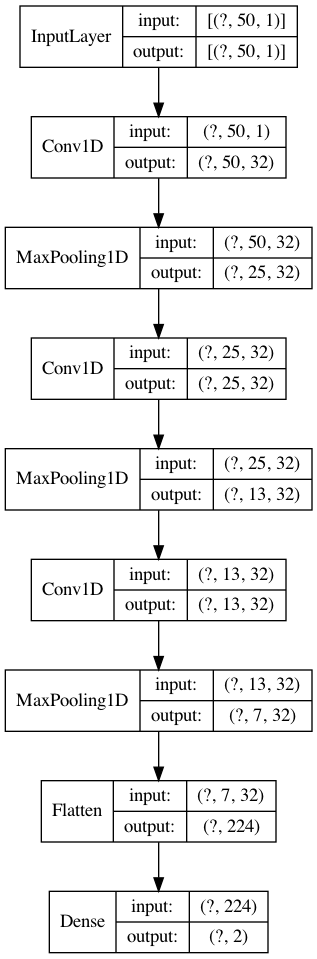

In [21]:
from keras.utils import plot_model
plot_model(position_model3, show_shapes=True, show_layer_names=False)

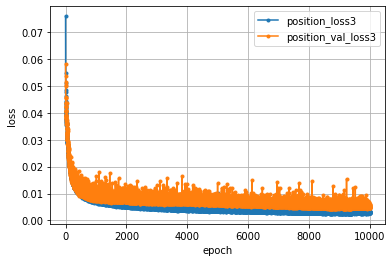

In [8]:
# 学習経過の可視化(大きさ)
position_loss3     = position_history3.history['loss']
position_val_loss3 = position_history3.history['val_loss']

nb_epoch3 = len(position_loss3)
plt.plot(range(nb_epoch3), position_loss3,     marker='.', label='position_loss3')
plt.plot(range(nb_epoch3), position_val_loss3, marker='.', label='position_val_loss3')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
position_predict3 = position_model3.predict(position_x_test)
position_ok = 0
for i in range(len(position_predict3)):
    if ((position_predict3[i][0]-position_y_test[i][0])**2+(position_predict3[i][1]-position_y_test[i][1])**2) < 0.25**2:
        position_ok = position_ok + 1
print(position_ok/len(position_predict3))

0.9669462259496794


In [10]:
position_predict3 = position_model3.predict(position_x_test)
position_ok = 0
for i in range(len(position_predict3)):
    if ((position_predict3[i][0]-position_y_test[i][0])**2+(position_predict3[i][1]-position_y_test[i][1])**2) < 0.2**2:
        position_ok = position_ok + 1
print(position_ok/len(position_predict3))

0.9506660088801184


In [11]:
position_predict3 = position_model3.predict(position_x_test)
position_ok = 0
for i in range(len(position_predict3)):
    if ((position_predict3[i][0]-position_y_test[i][0])**2+(position_predict3[i][1]-position_y_test[i][1])**2) < 0.1**2:
        position_ok = position_ok + 1
print(position_ok/len(position_predict3))

0.7784903798717316
